In [ ]:
!python -m spacy download en_core_web_md

In [ ]:
!pip install nltk

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
from dateutil import parser
import missingno as msno
import re
from scipy.stats import mode
import spacy
import tqdm
import pickle
from bs4 import BeautifulSoup
from spacy.matcher import Matcher
import networkx as nx
import nltk
from nltk import TreebankWordTokenizer,WordPunctTokenizer
from nltk.tokenize import word_tokenize,PunktSentenceTokenizer

In [2]:
pd.set_option("display.max_column",500)
pd.set_option("display.max_rows",500)
sns.set(style="darkgrid")
sns.set_context("talk")

In [3]:
#load data
data=pd.read_csv(r"E:\Python\Msc-AI-Projects\loan.csv",low_memory=False)

In [4]:
#Function to create meta data of the data
def create_Meta(data):
    meta_data={'dtypes':data.dtypes,
              'missing_values':round(data.isna().sum()*100/data.shape[0],3),
              'count':[data[i].count() for i in data.columns.values],
              'Number_Uniques':[data[i].nunique() for i in data.columns.values]}
    return pd.DataFrame(meta_data)

In [5]:
Meta_Data=create_Meta(data)

In [ ]:
#Display meta data of our data
Meta_Data.to_clipboard()

In [6]:
#Sorting Meta Data on the basis of missing value percentage in descending order
Meta_Data=Meta_Data.sort_values(by='missing_values',ascending=False)

In [7]:
#Slicing Meta Data on basis of missing value percentage which shall be greater than 30%
Meta_Data[Meta_Data['missing_values']>30]

dtypes  missing_values  count  Number_Uniques
verification_status_joint       float64         100.000      0               0
annual_inc_joint                float64         100.000      0               0
mo_sin_old_rev_tl_op            float64         100.000      0               0
mo_sin_old_il_acct              float64         100.000      0               0
bc_util                         float64         100.000      0               0
bc_open_to_buy                  float64         100.000      0               0
avg_cur_bal                     float64         100.000      0               0
acc_open_past_24mths            float64         100.000      0               0
inq_last_12m                    float64         100.000      0               0
total_cu_tl                     float64         100.000      0               0
inq_fi                          float64         100.000      0               0
total_rev_hi_lim                float64         100.000      0               0
all_util                        float64         100.000      0               0
max_bal_bc                      float64         100.000      0               0
open_rv_24m                     float64         100.000      0               0
open_rv_12m                     float64         100.000      0               0
il_util                         float64         100.000      0               0
total_bal_il                    float64         100.000      0               0
mths_since_rcnt_il              float64         100.000      0               0
open_il_24m                     float64         100.000      0               0
open_il_12m                     float64         100.000      0               0
open_il_6m                      float64         100.000      0               0
open_acc_6m                     float64         100.000      0               0
tot_cur_bal                     float64         100.000      0               0
tot_coll_amt                    float64         100.000      0               0
mo_sin_rcnt_rev_tl_op           float64         100.000      0               0
mo_sin_rcnt_tl                  float64         100.000      0               0
mort_acc                        float64         100.000      0               0
num_rev_tl_bal_gt_0             float64         100.000      0               0
total_bc_limit                  float64         100.000      0               0
total_bal_ex_mort               float64         100.000      0               0
tot_hi_cred_lim                 float64         100.000      0               0
percent_bc_gt_75                float64         100.000      0               0
pct_tl_nvr_dlq                  float64         100.000      0               0
num_tl_op_past_12m              float64         100.000      0               0
num_tl_90g_dpd_24m              float64         100.000      0               0
num_tl_30dpd                    float64         100.000      0               0
num_tl_120dpd_2m                float64         100.000      0               0
num_sats                        float64         100.000      0               0
num_rev_accts                   float64         100.000      0               0
mths_since_recent_bc            float64         100.000      0               0
num_op_rev_tl                   float64         100.000      0               0
num_il_tl                       float64         100.000      0               0
num_bc_tl                       float64         100.000      0               0
num_bc_sats                     float64         100.000      0               0
num_actv_rev_tl                 float64         100.000      0               0
num_actv_bc_tl                  float64         100.000      0               0
num_accts_ever_120_pd           float64         100.000      0               0
mths_since_recent_revol_delinq  float64         100.000      0               0
mths_since_recent_inq           float64         100.000      0               0
mths

#### What we need to identify ?


- Does a borrower defaults if funded amount is greater than the average funding amount

- Does a borrower defaults if interest rates are higher than average interest rate

- Do borrowers defaults who have high installments.

- Do emp_length of a borrower affect borrower to default?

- Do type of home ownership have any affect on borrower to default.

- Do high dti determines if a borrower will default or not ?

### Missing Value Treatment

In [8]:
#We have noticed that there are many columns which have more than 90 percent missing values
# There are columns which have 30% and 64% missing values also . 
#We will drop columns having missing values more than 50% and for rest we will explore and then take a call
missing_value_columns=Meta_Data[Meta_Data['missing_values']>50].index

In [9]:
#Dropped missing value columns
ft_data=data.drop(missing_value_columns,axis=1)

In [10]:
#Shape after and before dropping missing value columns
#We notice that 50% approx columns have been dropped
ft_data.shape,data.shape

((39717, 54), (39717, 111))

In [11]:
def find_pattern(x):
    r=r"[0-9]"
    start,end=re.search(r,x).span()
    x=x[start:end+1]
    return x

In [12]:
indx=ft_data[ft_data["emp_length"].notnull()]['emp_length'].index.values.tolist()
ft_data['emp_length'].loc[indx,]=ft_data['emp_length'].loc[indx,].map(find_pattern)

In [13]:
#data Splitting text
def data_split(a,x,y):
    b=a.split(x)[y]
    return b




In [14]:
#Splitting term and interest rate based on space and %
ft_data['term']=ft_data.term.apply(data_split,args=(" ",1))
ft_data["int_rate"]=ft_data.int_rate.apply(data_split,args=("%",0))

In [15]:

# ft_data['emp_length'].loc[indx,]=ft_data['emp_length'].loc[indx,].apply(data_split,args=("+",0))
indx=ft_data[ft_data["revol_util"].notnull()]['revol_util'].index.values.tolist()
ft_data['revol_util'].loc[indx,]=ft_data['revol_util'].loc[indx,].apply(data_split,args=("%",0))

In [16]:
#Checking if missing data is not at Random
#Creating dichotomous column for missing variable,1->missing,0->not missing
ft_data['desc_isMissing']=np.where(ft_data['desc'].isna(),1,0)
ft_data['emp_title_isMissing']=np.where(ft_data['emp_title'].isna(),1,0)
ft_data['emp_length_isMissing']=np.where(ft_data['emp_length'].isna(),1,0)

In [17]:
ft_data.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

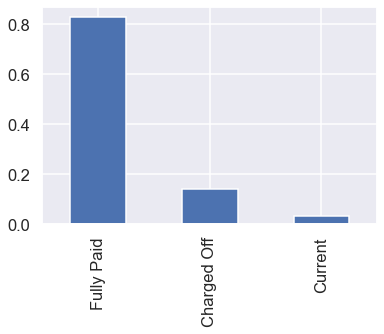

In [18]:
#We find that 80% of description of loan provided by borrower is missing for those who have fully paid 
ft_data[ft_data.desc_isMissing==1]['loan_status'].value_counts(normalize=True).plot(kind='bar')
plt.show()

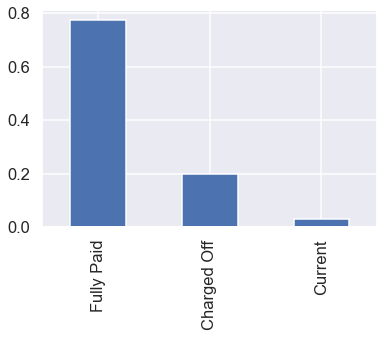

In [19]:
#We find that 80% of job title provided by borrower is missing for those who have fully paid
ft_data[ft_data.emp_title_isMissing==1]['loan_status'].value_counts(normalize=True).plot(kind='bar')
plt.show()

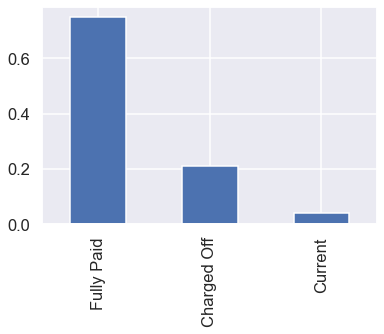

In [20]:
#We find that 70% of job tenure provided by borrower is missing for those who have fully paid
ft_data[ft_data.emp_length_isMissing==1]['loan_status'].value_counts(normalize=True).plot(kind='bar')
plt.show()

It has been seen that majority of the missing data are of those who have fully paid, that is those who are likely to fully pay the loan amount. Hence we can say that the missing data is not at random. There is a clear pattern which we can see

In [21]:
descMissing_data=ft_data[ft_data.desc_isMissing==1]

In [22]:
descMissing_data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv term int_rate  \
2   1077175    1313524       2400         2400           2400.0   36    15.96   
5   1075269    1311441       5000         5000           5000.0   36     7.90   
11  1069908    1305008      12000        12000          12000.0   36    12.69   
14  1069057    1303503      10000        10000          10000.0   36    10.65   
15  1069759    1304871       1000         1000           1000.0   36    16.29   

    installment grade sub_grade                 emp_title emp_length  \
2         84.33     C        C5                       NaN         10   
5        156.46     A        A4      Veolia Transportaton         3    
11       402.54     B        B5                      UCLA         10   
14       325.74     B        B2                     SFMTA         3    
15        35.31     D        D1  Internal revenue Service         1    

   home_ownership  annual_inc verification_status issue_d  loan_status  \
2            RENT     12252.0        Not Verified  Dec-11   Fully Paid   
5            RENT     36000.0     Source Verified  Dec-11   Fully Paid   
11            OWN     75000.0     Source Verified  Dec-11   Fully Paid   
14           RENT    100000.0     Source Verified  Dec-11  Charged Off   
15           RENT     28000.0        Not Verified  Dec-11   Fully Paid   

   pymnt_plan                                                url desc  \
2           n  https://lendingclub.com/browse/loanDetail.acti...  NaN   
5           n  https://lendingclub.com/browse/loanDetail.acti...  NaN   
11          n  https://lendingclub.com/browse/loanDetail.acti...  NaN   
14          n  https://lendingclub.com/browse/loanDetail.acti...  NaN   
15          n  https://lendingclub.com/browse/loanDetail.acti...  NaN   

               purpose                                  title zip_code  \
2       small_business                   real estate business    606xx   
5              wedding  My wedding loan I promise to pay back    852xx   
11  debt_consolidation                          Consolidation    913xx   
14               other                             Other Loan    951xx   
15  debt_consolidation                Debt Consolidation Loan    641xx   

   addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  \
2          IL   8.72            0           Nov-01               2         2   
5          AZ  11.20            0           Nov-04               3         9   
11         CA  10.78            0           Oct-89               0        12   
14         CA   7.06            0           May-91               2        14   
15         MO  20.31            0           Sep-07               1        11   

    pub_rec  revol_bal revol_util  total_acc initial_list_status  out_prncp  \
2         0       2956      98.50         10                   f        0.0   
5         0       7963      28.30         12                   f        0.0   
11        0      23336      67.10         34                   f        0.0   
14        0      11997      55.50         29                   f        0.0   
15        0       6524      81.50         23                   f        0.0   

    out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  \
2             0.0   3005.666844          3005.67          2400.00   
5             0.0   5632.210000          5632.21          5000.00   
11            0.0  13947.989160         13947.99         12000.00   
14            0.0   7471.990000          7471.99          5433.47   
15            0.0   1270.716942          1270.72          1000.00   

    total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
2          605.67                 0.0         0.0                   0.0000   
5          632.21                 0.0         0.0                   0.0000   
11        1947.99                 0.0         0.0                   0.0000   
14        1393.42                 0.0       645.1                   6.3145   

In [23]:
print(descMissing_data.loan_amnt.mean(),ft_data[ft_data.desc_isMissing==0]['loan_amnt'].mean(),ft_data['loan_amnt'].mean())

10585.99884080371 11525.55644769765 11219.443814991062


In [24]:
print(descMissing_data.funded_amnt.mean(),ft_data[ft_data.desc_isMissing==0]['funded_amnt'].mean(),ft_data['funded_amnt'].mean())

10373.154945904173 11225.368786645255 10947.713195860715


In [25]:
descMissing_data.term.value_counts()

36    9248
60    3692
Name: term, dtype: int64

In [26]:
ft_data[ft_data.desc_isMissing==0]['term'].value_counts()

36    19848
60     6929
Name: term, dtype: int64

We see that distribution of term on the basis of description missing and not missing are similar that is loan applicants prefference for 3 years is twice more than of 5 years

In [27]:
#Printing average interest rate of data where description is missing , not missing and whole data
ft_data.int_rate=ft_data.int_rate.astype('float64')
descMissing_data.int_rate=descMissing_data.int_rate.astype('float64')
print(descMissing_data.int_rate.mean(),ft_data[ft_data.desc_isMissing==0].int_rate.mean(),ft_data.int_rate.mean())

11.995565687789716 12.033553049259668 12.02117657426169


In [28]:
#Printing average employee length of data where description is missing , not missing and whole data
ft_data.emp_length=ft_data.emp_length.astype('float64')
descMissing_data.emp_length=descMissing_data.emp_length.astype('float64')
print(descMissing_data.emp_length.mean(),ft_data[ft_data.desc_isMissing==0].emp_length.mean(),ft_data.emp_length.mean())

5.37983193277311 4.95452633189276 5.092050100926453


In [29]:
#Printing average revolving utilization of data where description is missing , not missing and whole data
ft_data.revol_util=ft_data.revol_util.astype('float64')
descMissing_data.revol_util=descMissing_data.revol_util.astype('float64')
print(descMissing_data.revol_util.mean(),ft_data[ft_data.desc_isMissing==0].revol_util.mean(),ft_data.revol_util.mean())

49.29169606932862 48.610070298770054 48.83215241888721


No clear pattern in interest rate, revol util and employee length seen for missing description and non missing data 

In [30]:
#Try Finding Employee Length based on Title and imputing the missings
title_wise_empLen=ft_data.groupby('emp_title',as_index=False,dropna=True)['emp_length'].median()

In [31]:
emp_title_NA_Length=ft_data[(~ft_data.emp_title.isna())&(ft_data.emp_length.isna())]['emp_title'].values.tolist()

In [32]:
a=pd.DataFrame()
for i in emp_title_NA_Length:
    a=pd.concat([a,title_wise_empLen[title_wise_empLen.emp_title==i]],axis=0)

In [33]:
emp_title=a[~a.emp_length.isna()].emp_title.tolist()

In [34]:
indexes=[]
for i in emp_title:
    ind=ft_data[(ft_data.emp_title==i)&(ft_data.emp_length.isna())]['emp_length'].index.values[0]
    indexes.append(ind)

In [35]:
missing_emp_length_data=ft_data.loc[indexes,:]
emp_lnt=a[~a.emp_length.isna()].emp_length.tolist()    
missing_emp_length_data.loc[:,'emp_length']=emp_lnt


In [36]:
ft_data=pd.concat([ft_data.drop(indexes,axis=0),missing_emp_length_data],axis=0)

In [37]:
ft_data.reset_index(drop=True,inplace=True)

In [38]:
indexes=ft_data[(ft_data.emp_length.isna())].index.values.tolist()

In [39]:
#Dropping rows where emp_length is NA
ft_data.drop(indexes,axis=0,inplace=True)

In [40]:
ft_data.isna().sum()*100/ft_data.shape[0]

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      3.725455
emp_length                     0.000000
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.339016
purpose                        0.000000
title                          0.025871
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [41]:
#Grouping employee title most frequent based on employee experience
#Treating Missing Values of Employee title
empTitle_by_Length=ft_data.groupby("emp_length",as_index=False).agg({"emp_title":mode})
for i in range(len(empTitle_by_Length)):
    empTitle_by_Length.emp_title[i]=empTitle_by_Length.emp_title[i].mode[0]

In [42]:
empTitle_by_Length

emp_length          emp_title
0          1.0    Bank of America
1          2.0    Bank of America
2          3.0  Kaiser Permanente
3          4.0      Self Employed
4          5.0            US Army
5          6.0            US Army
6          7.0            US Army
7          8.0            US Army
8          9.0    Bank of America
9          9.5          Honeywell
10        10.0            US Army

In [43]:
indexes=ft_data[ft_data.emp_title.isna()].index.values.tolist()
empTitle_NAdata=ft_data.loc[indexes,:]
empTitle_NAdata[(empTitle_NAdata.emp_length==1.0)&(empTitle_NAdata.emp_title.isna())]["emp_title"].replace(np.nan,"Bank of America",inplace=True)

In [44]:
empTitle_NAdata.emp_length.value_counts().sum()

1440

In [45]:
#Imputation of missing values in employee title based on employee length
a=pd.DataFrame()
for i in empTitle_NAdata.emp_length.unique().tolist():
    dummy=empTitle_NAdata[(empTitle_NAdata.emp_length==i)&(empTitle_NAdata.emp_title.isna())]
    dummy.emp_title.replace(np.nan,empTitle_by_Length[empTitle_by_Length.emp_length==i].emp_title.values[0],inplace=True)
    a=pd.concat([dummy,a],axis=0)
    
ft_data=pd.concat([ft_data.drop(indexes,axis=0),a],axis=0)

In [46]:
ft_data.isna().sum()*100/ft_data.shape[0]

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      0.000000
emp_length                     0.000000
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.339016
purpose                        0.000000
title                          0.025871
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [47]:
#Identifying patterns and treating null values in pub_rec_bankcruptcies
ft_data['pub_rec_bankruptcies'].value_counts(dropna=False)

0.0    36386
1.0     1563
NaN      697
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [48]:
ft_data.groupby('pub_rec_bankruptcies',dropna=False).agg({'loan_status':np.count_nonzero})

loan_status
pub_rec_bankruptcies             
0.0                         36386
1.0                          1563
2.0                             7
NaN                           697

In [49]:
#We notice the 697 missing public record of bankcruptcies are not the ones which are either charged off or who have fully paid..
#They belong to Current loan applicants
#Either this NaN can be another category itself or they belong to one specific category
ft_data[ft_data['pub_rec_bankruptcies'].isna()].groupby("loan_status",dropna=False)["pub_rec_bankruptcies"].count()

loan_status
Charged Off    0
Fully Paid     0
Name: pub_rec_bankruptcies, dtype: int64

In [50]:
#Understanding the behavior of bunkcruptcies on basis of average loan amount
#We see that those who have frequently shown bankcruptcies are the ones who have applied for high loan amounts. 
#The missing 697 are the ones which have applied for least loan amount
ft_data.groupby('pub_rec_bankruptcies',dropna=False).agg({'loan_amnt':'mean'})

loan_amnt
pub_rec_bankruptcies              
0.0                   11367.429094
1.0                   10094.369802
2.0                   12800.000000
NaN                    9956.420373

In [51]:
#Understanding the behavior of bunkcruptcies on basis of average funded amount
#There is difference in loan applied amount and funded amount
#We see that those who do not have bankcruptcies or who have maximum record of bankcruptcies that is 2 have the highest amount funded. 
#The missing 697 are the ones which have got lesser funded amount
ft_data.groupby('pub_rec_bankruptcies',dropna=False).agg({'funded_amnt':'mean'})

funded_amnt
pub_rec_bankruptcies              
0.0                   11090.209146
1.0                    9815.962892
2.0                   12453.571429
NaN                    9829.878049

In [52]:
#Understanding the behavior of bunkcruptcies on basis of average loan amount and loan status
#We see for all the number of bankcruptcies, people who have fully paid are the ones who have applied for the least amount and those who are current have the highest loan amount.
#For NAN category those whose loan is being charged off has the highest loan amount 
ft_data.groupby(['pub_rec_bankruptcies','loan_status'],dropna=False).agg({'loan_amnt':'mean'})

loan_amnt
pub_rec_bankruptcies loan_status              
0.0                  Charged Off  12274.934290
                     Current      17307.260338
                     Fully Paid   11011.605379
1.0                  Charged Off  11677.388060
                     Current      13053.030303
                     Fully Paid    9568.891213
2.0                  Charged Off  12500.000000
                     Current      25000.000000
                     Fully Paid    4866.666667
NaN                  Charged Off  12590.042373
                     Fully Paid    9419.689119

In [53]:
#Understanding the behavior of bunkcruptcies on basis of average loan amount and loan status
#We see for all the number of bankcruptcies, people who have fully paid are in majority numbers and the current applicants are the least
#Of NaNs i.e 697 applicants 83% are already paid off and only 17% have been charged of
ft_data.groupby(['pub_rec_bankruptcies','loan_status'],dropna=False).agg({'loan_amnt':'count'})

loan_amnt
pub_rec_bankruptcies loan_status           
0.0                  Charged Off       4946
                     Current           1064
                     Fully Paid       30376
1.0                  Charged Off        335
                     Current             33
                     Fully Paid        1195
2.0                  Charged Off          2
                     Current              2
                     Fully Paid           3
NaN                  Charged Off        118
                     Fully Paid         579

In [54]:
#Understanding the behavior of bunkcruptcies on basis of average interest rate
#We see that as the number of bankruptcies increases, it increases when the average interest rate rises. 
#The missing 697 have the least interest rate @11% approximately
ft_data.groupby('pub_rec_bankruptcies',dropna=False).agg({'int_rate':'mean'})

int_rate
pub_rec_bankruptcies           
0.0                   12.014279
1.0                   13.539264
2.0                   15.971429
NaN                   10.640230

In [55]:
#Understanding the behavior of bunkcruptcies on basis of average loan amount and installment amount
#We see for all the number of bankcruptcies, people who have public record of bankcruptcies as two, pays highest isntallment
#For NAN category the installment is lesser comparatively
ft_data.groupby(['pub_rec_bankruptcies'],dropna=False).agg({'installment':'mean'})

installment
pub_rec_bankruptcies             
0.0                    328.144650
1.0                    295.598298
2.0                    373.270000
NaN                    322.301119

In [56]:
#We see for zero and NaN category of the public record of bankcruptcies, majority of the applicants have home ownership as Rent and then Mortgage
#Those who displays bankcruptcies have higher frequencies of martgage as home ownership
ft_data.groupby(["pub_rec_bankruptcies","home_ownership"],dropna=False).agg({"emp_title":"count"})

emp_title
pub_rec_bankruptcies home_ownership           
0.0                  MORTGAGE            16136
                     OTHER                  95
                     OWN                  2683
                     RENT                17472
1.0                  MORTGAGE              822
                     OTHER                   3
                     OWN                    99
                     RENT                  639
2.0                  MORTGAGE                6
                     RENT                    1
NaN                  MORTGAGE              252
                     NONE                    3
                     OWN                    62
                     RENT                  380

In [57]:
#Since the patterns seen above we see lot of similarities in NaN category and bankcruotcies class 0 , which is suggestive of that applicants who are having public_bankcrupticies as NaN have zero bankcruptcies
#Hence We can impute NaNs with 0
ft_data.pub_rec_bankruptcies.fillna(0.0,inplace=True)

In [58]:
ft_data.isna().sum()*100/ft_data.shape[0]

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      0.000000
emp_length                     0.000000
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.339016
purpose                        0.000000
title                          0.025871
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [59]:
#Identifying pattern and trating revol_util - Though revolving line utilization rate is the relationship between balances and the credit limit
revol_util_na_df=ft_data[ft_data.revol_util.isna()]
revol_util_df=ft_data[~ft_data.revol_util.isna()]

In [60]:
#We can see that revol_util is NaN because revol_bal is 0, hence we should replace the NaN values of revol_util with 0 
revol_util_na_df.loc[:,['revol_util','revol_bal']]

revol_util  revol_bal
3565          NaN          0
4943          NaN          0
12039         NaN          0
12144         NaN          0
13888         NaN          0
17982         NaN          0
21599         NaN          0
24657         NaN          0
24732         NaN          0
25254         NaN          0
25969         NaN          0
26640         NaN          0
26715         NaN          0
26804         NaN          0
28161         NaN          0
28676         NaN          0
28929         NaN          0
28977         NaN          0
29227         NaN          0
29239         NaN          0
31851         NaN          0
31928         NaN          0
32704         NaN          0
33067         NaN          0
33479         NaN          0
33523         NaN          0
34257         NaN          0
34838         NaN          0
35840         NaN          0
36198         NaN          0
36462         NaN          0
36848         NaN          0
37031         NaN          0
37257         NaN          0
37529         NaN      49238
37698         NaN          0
37746         NaN          0
37767         NaN          0
37900         NaN          0
38190         NaN          0
38446         NaN          0
38513         NaN          0
38888         NaN          0
38906         NaN          0
38938         NaN          0
38959         NaN          0
18181         NaN          0

In [61]:
#Replacing NaN values
ft_data.revol_util.fillna(0.0,inplace=True)

In [62]:
#Finding % of missing values
ft_data.isna().sum()*100/ft_data.shape[0]

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      0.000000
emp_length                     0.000000
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.339016
purpose                        0.000000
title                          0.025871
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [63]:
#Finding value counts of application_type
ft_data.application_type.value_counts()

INDIVIDUAL    38653
Name: application_type, dtype: int64

In [64]:
#Removing columns since they have only single unique value 
#It does not give any information
cols=["collections_12_mths_ex_med","chargeoff_within_12_mths","tax_liens","pymnt_plan","application_type","acc_now_delinq","initial_list_status","delinq_amnt",
"policy_code"]
ft_data.drop(cols,axis=1,inplace=True)


In [65]:
#Finding % of missing values
ft_data.isna().sum()*100/ft_data.shape[0]

id                          0.000000
member_id                   0.000000
loan_amnt                   0.000000
funded_amnt                 0.000000
funded_amnt_inv             0.000000
term                        0.000000
int_rate                    0.000000
installment                 0.000000
grade                       0.000000
sub_grade                   0.000000
emp_title                   0.000000
emp_length                  0.000000
home_ownership              0.000000
annual_inc                  0.000000
verification_status         0.000000
issue_d                     0.000000
loan_status                 0.000000
url                         0.000000
desc                       32.339016
purpose                     0.000000
title                       0.025871
zip_code                    0.000000
addr_state                  0.000000
dti                         0.000000
delinq_2yrs                 0.000000
earliest_cr_line            0.000000
inq_last_6mths              0.000000
o

In [66]:
#Subsetting title and desc column where title is missing 
empty_title_df=ft_data[(ft_data.title.isna())].loc[:,['desc','title']]

In [67]:
#Loading Spacy en_core_web_md model
nlp=spacy.load("en_core_web_md")

In [68]:
#Creating function to strip down html tags
def strip_html_tags(text):
    soup = BeautifulSoup(str(text), "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

In [69]:
#Removing html tags from description column
empty_title_df['desc']=empty_title_df['desc'].map(strip_html_tags)

In [70]:
#creating Function to extract topic from description column
def topic_extraction(text):
    span=[]
    nlp=spacy.load("en_core_web_md")
    doc=nlp(str(text))
    pattern=[[{"DEP":"compound","OP":"+"},{"DEP":"nsubj","OP":"?"},{"DEP":"amod","OP":"?"}],[{"DEP":"advcl","OP":"+"},{"DEP":"prt","OP":"?"},{"DEP":"det","OP":"?"},{"DEP":"dobj","OP":"?"}]]
#     pattern1=[]
    matcher=Matcher(nlp.vocab,validate=True)
    matcher.add("match_1",pattern)
    matches=matcher(doc)
    span.append([doc[i[1]:i[2]] for i in tqdm.tqdm(matches)])
    return span
    
    
    

    

In [71]:
#Extracting topics
empty_title_df['Topics']=empty_title_df.desc.map(topic_extraction)

100%|████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]
0it [00:00, ?it/s]
100%|████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]


In [72]:
#Imputing title , topics generated using description column
ft_data.title.loc[25181]="travel"
ft_data.title.loc[27468]="debt"
ft_data.title.loc[28460]="education"
ft_data.title.loc[28976]="credit card"
ft_data.title.loc[31564]="credit card"

In [73]:
#Removing the rows where both description and title were NaN
empty_title_rows=ft_data[ft_data.title.isna()].index.tolist()
ft_data.drop(empty_title_rows,axis=0,inplace=True)

In [74]:
#Finding % Missing Values
ft_data.isna().sum()*100/ft_data.shape[0]

id                          0.000000
member_id                   0.000000
loan_amnt                   0.000000
funded_amnt                 0.000000
funded_amnt_inv             0.000000
term                        0.000000
int_rate                    0.000000
installment                 0.000000
grade                       0.000000
sub_grade                   0.000000
emp_title                   0.000000
emp_length                  0.000000
home_ownership              0.000000
annual_inc                  0.000000
verification_status         0.000000
issue_d                     0.000000
loan_status                 0.000000
url                         0.000000
desc                       32.330263
purpose                     0.000000
title                       0.000000
zip_code                    0.000000
addr_state                  0.000000
dti                         0.000000
delinq_2yrs                 0.000000
earliest_cr_line            0.000000
inq_last_6mths              0.000000
o

not removing the rows of last_pymnt_d & last_credit_pull_d since its very less % of data and the columns at this point doesnt seems to be potential contributing column

In [75]:
ft_data.reset_index(drop=True,inplace=True)

### Outlier Detection


In [76]:
#Continuous variable list
num_cols=['loan_amnt','open_acc', 'funded_amnt', 'funded_amnt_inv','int_rate', 'installment','annual_inc','dti','revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt','total_pymnt_inv', 'total_rec_prncp', 'total_rec_int','total_rec_late_fee', 'recoveries', 'collection_recovery_fee','last_pymnt_amnt']

In [77]:
#subsetting numerical values
num_data=ft_data[num_cols]

In [78]:
num_data.describe()

loan_amnt      open_acc   funded_amnt  funded_amnt_inv  \
count  38648.000000  38648.000000  38648.000000     38648.000000   
mean   11291.652867      9.317067  11017.053923     10455.561463   
std     7462.740770      4.395101   7193.533942      7139.953312   
min      500.000000      2.000000    500.000000         0.000000   
25%     5500.000000      6.000000   5500.000000      5000.000000   
50%    10000.000000      9.000000   9950.000000      9000.000000   
75%    15000.000000     12.000000  15000.000000     14425.000000   
max    35000.000000     44.000000  35000.000000     35000.000000   

           int_rate   installment    annual_inc           dti      revol_bal  \
count  38648.000000  38648.000000  3.864800e+04  38648.000000   38648.000000   
mean      12.051832    326.754662  6.960308e+04     13.325358   13456.841674   
std        3.716812    209.151280  6.425029e+04      6.667679   15914.102323   
min        5.420000     15.690000  4.000000e+03      0.000000       0.000000   
25%        9.320000    168.430000  4.135440e+04      8.200000    3745.000000   
50%       11.860000    282.760000  6.000000e+04     13.415000    8937.000000   
75%       14.590000    434.400000  8.319600e+04     18.590000   17149.250000   
max       24.590000   1305.190000  6.000000e+06     29.990000  149588.000000   

         revol_util     total_acc     out_prncp  out_prncp_inv   total_pymnt  \
count  38648.000000  38648.000000  38648.000000   38648.000000  38648.000000   
mean      48.937988     22.120860     51.301510      51.057698  12243.000404   
std       28.340303     11.393296    376.889498     375.514011   9056.859621   
min        0.000000      2.000000      0.000000       0.000000      0.000000   
25%       25.500000     14.000000      0.000000       0.000000   5623.622683   
50%       49.500000     20.000000      0.000000       0.000000  10023.245370   
75%       72.500000     29.000000      0.000000       0.000000  16645.148002   
max       99.900000     90.000000   6311.470000    6307.370000  58563.679930   

       total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
count     38648.000000     38648.000000   38648.000000        38648.000000   
mean      11644.454707      9864.213780    2281.718273            1.371861   
std        8962.042164      7076.391703    2615.558692            7.331535   
min           0.000000         0.000000       0.000000            0.000000   
25%        5175.977500      4750.000000     671.640000            0.000000   
50%        9378.350000      8000.000000    1367.380000            0.000000   
75%       15914.040000     13874.190000    2858.092500            0.000000   
max       58563.680000     35000.020000   23563.680000          180.200000   

         recoveries  collection_recovery_fee  last_pymnt_amnt  
count  38648.000000             38648.000000     38648.000000  
mean      95.696574                12.449888      2701.932977  
std      694.456346               149.817596      4467.402914  
min        0.000000                 0.000000         0.000000  
25%        0.000000                 0.000000       221.997500  
50%        0.000000                 0.000000       554.930000  
75%        0.000000                 0.000000      3337.532500  
max    29623.350000              7002.190000     36115.200000

In [79]:
#Define Scaler
def MinMaxScaler(df:pd.DataFrame,col):
    Min=df[col].min()
    Max=df[col].max()
    def minmaxscale(x):
        if Min>0:
            z=(x-Min)/(Max-Min)
            return z
        else:
            z=(x-Min)/(Max-Min)
            return z
    return df[col].map(minmaxscale)
        

In [80]:
#Scaling continuous variables in order to bring each column in same unit, i.e unit free
scaled_data=pd.DataFrame()
for i in num_cols:
    scaled_data[i]=MinMaxScaler(num_data,i)

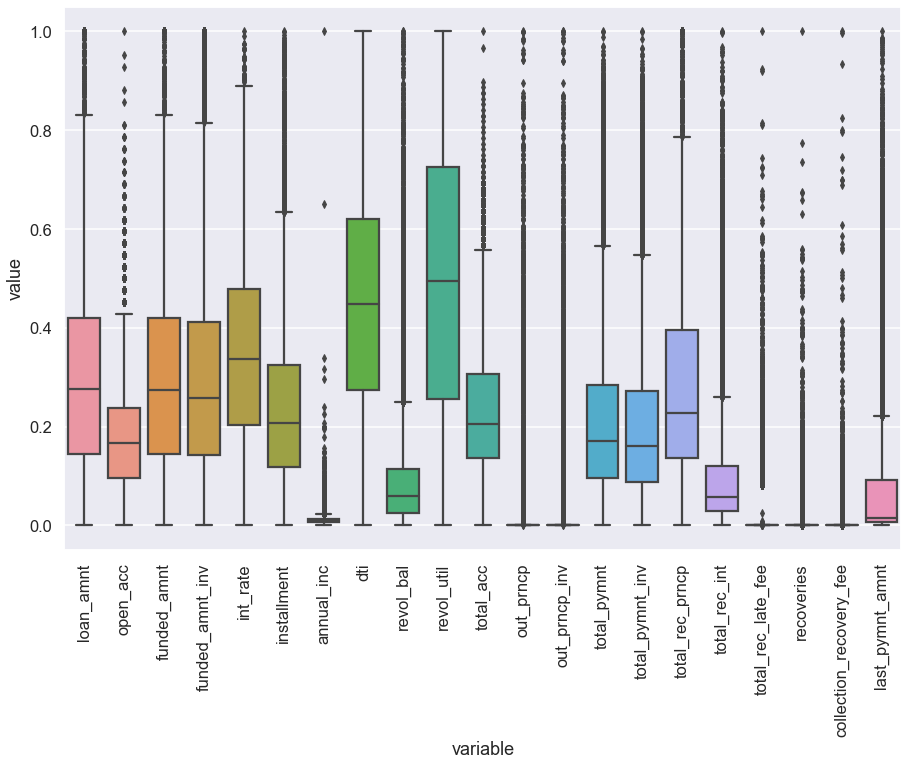

In [81]:
#Box plot to identify outliers
plt.figure(figsize=(15,10))
sns.boxplot(x="variable", y="value", data=pd.melt(scaled_data))
plt.xticks(rotation=90)
plt.show()

In [82]:
#we see that loan_amount,funded_amnt and inv_funded_amnt have similar trend in outliers and distribution - it is suggestive of interdependency 
# We see that all the above shown variables have outliers
#lets identify the pattern before we classify them as outliers
#Creating Outlier_Detector 


def outlier_treatment(df:pd.DataFrame,col:str):
    def IQR_outlier_detector(df:pd.DataFrame,col:str):
        global upper_bound
        global lower_bound
        third_quartile=df[col].quantile(.75)
        first_quartile=df[col].quantile(.25)
        IQR=third_quartile-first_quartile
        upper_bound=third_quartile + (1.5*IQR)
        lower_bound=first_quartile - (1.5*IQR)
        
        return (upper_bound,lower_bound)
    def stdv_outlier_detector(df:pd.DataFrame,col:str):
        global ub
        global lb
        stdev=df[col].std()
        mean=df[col].mean()
        ub=mean+stdev
        lb=mean-stdev
        return (ub,lb)
    ub,lb=stdv_outlier_detector(df,col)
    perc=df[(df[col]>=lb)&(df[col]<=ub)].shape[0]/df.shape[0]
    if perc>=.68:
        ub,lb= stdv_outlier_detector(df,col)
        return df[col].clip(lower=lb,upper=ub)
    else:
        ub,lb= IQR_outlier_detector(df,col)
        return df[col].clip(lower=lb,upper=ub)
        
        


In [83]:
#Treating Outliers
for i in scaled_data.columns:
    ft_data[i]=outlier_treatment(ft_data,i)

In [84]:
#Treating Outliers
for i in scaled_data.columns:
    scaled_data[i]=outlier_treatment(scaled_data,i)

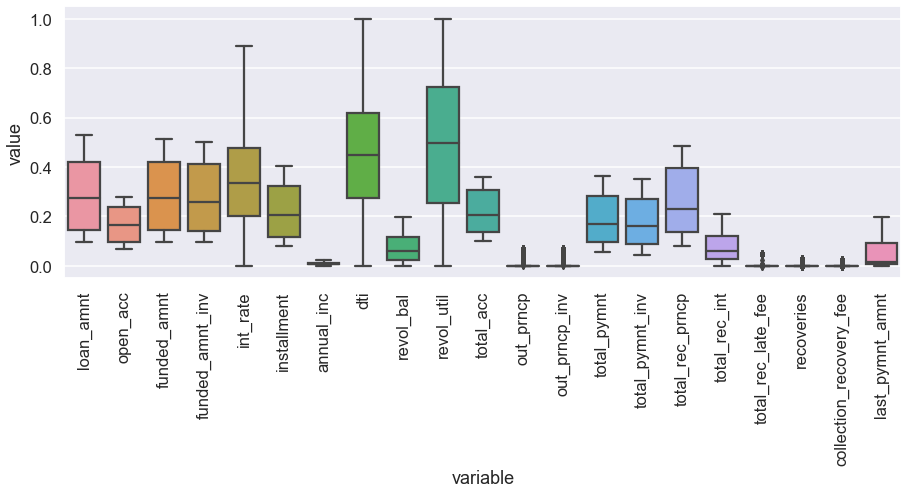

In [85]:
#Data Post outlier treatment
plt.figure(figsize=(15,5))
sns.boxplot(x="variable", y="value", data=pd.melt(scaled_data))
plt.xticks(rotation=90)
plt.show()

### Derived Variables

In [86]:
#Dropping row index where there are null values
index=ft_data[ft_data.last_credit_pull_d.isna()].index.values.tolist()
ft_data.drop(index,axis=0,inplace=True)

In [87]:
#Dropping row index where there are null values
index=ft_data[ft_data.last_pymnt_d.isna()].index.values.tolist()
ft_data.drop(index,axis=0,inplace=True)

In [88]:
#Splitting Function
def split_year(x):
    if x!=np.nan:
        x=x.split("-")[-1]
        x=int(x)
        return x
    return x


In [89]:
#Split the year
ft_data.issue_d=ft_data.issue_d.map(split_year)

In [90]:
#Creating Derived variables by Split the year
ft_data['last_credit_pull_yr']=ft_data.last_credit_pull_d.map(split_year)
ft_data['last_pymnt_yr']=ft_data.last_pymnt_d.map(split_year)

In [91]:
ft_data['application_to_funded_diff']=ft_data['loan_amnt']-ft_data['funded_amnt']
ft_data['total_inst']=ft_data['term'].astype(float)*ft_data['installment']
ft_data['balance']=ft_data['total_inst']-ft_data['total_pymnt']
ft_data['installment_to_income']=round(ft_data['total_inst']*100/(ft_data['annual_inc']*ft_data['term'].astype(float)/12),2)

ft_data['LC_pull_to_pymnt_Tenure']=ft_data['last_credit_pull_yr']-ft_data['last_pymnt_yr']
ft_data['LC_pull_to_issue_Tenure']=ft_data['last_credit_pull_yr']-ft_data['issue_d']

In [92]:
ft_data['last_pymnt_to_issue_Tenure']=ft_data['last_pymnt_yr']-ft_data['issue_d']

In [93]:
ft_data['funded_amt_range']=pd.qcut(ft_data['funded_amnt'],q=4).astype('object').astype(str)
ft_data['int_rate_range']=pd.cut(ft_data['int_rate'],5).astype('object').astype(str)
ft_data['annual_inc_range']=pd.cut(ft_data['annual_inc'],5).astype('object').astype(str)

### EDA

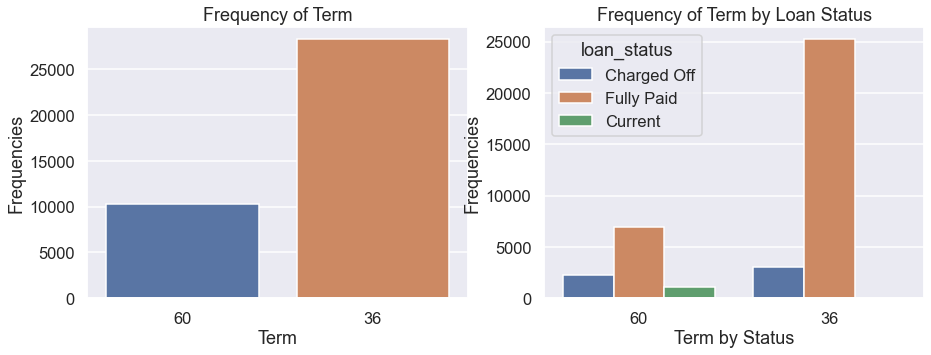

In [94]:
#Term Distribution 
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Frequency of Term")
sns.countplot(x='term',data=ft_data)
plt.xlabel("Term")
plt.ylabel("Frequencies")
plt.subplot(1,2,2)
plt.title("Frequency of Term by Loan Status")
sns.countplot(x='term',data=ft_data,hue='loan_status')
plt.xlabel("Term by Status")
plt.ylabel("Frequencies")
plt.show()

- We have seen most borrowers prefer 36 months duration , i.e short duration

- Most charged off borrowers are from 36 months duration.


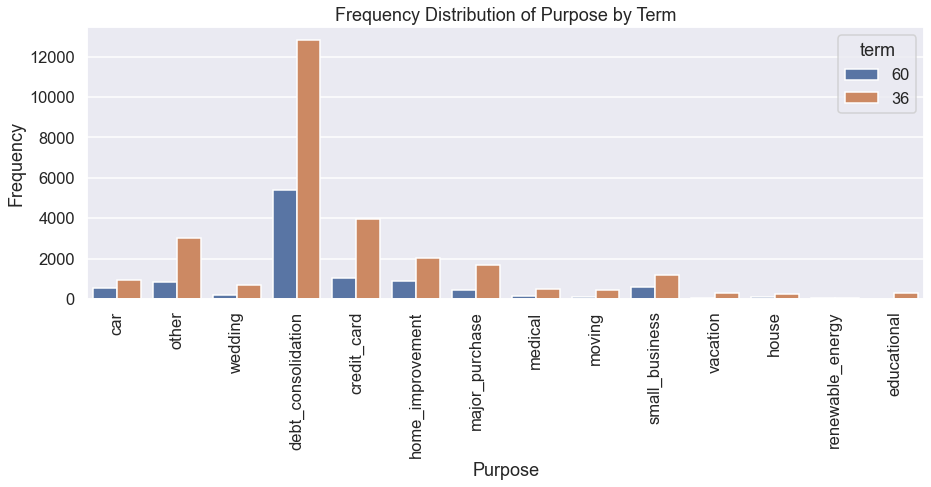

In [95]:
#Term Distribution based on purpose - Majority of borrowers who prefer 60 months duration have purpose of debt consolidation
plt.figure(figsize=(15,5))
plt.title("Frequency Distribution of Purpose by Term")
sns.countplot(x='purpose',data=ft_data,hue='term')
plt.xlabel("Purpose")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

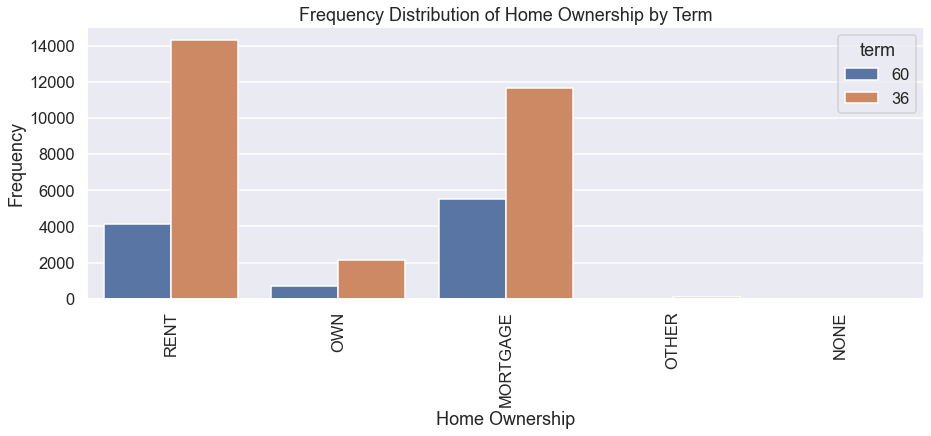

In [96]:
#Term Distribution based on ownership - Majorly for Rent and Mortgage, long duration loan were taken
plt.figure(figsize=(15,5))
plt.title("Frequency Distribution of Home Ownership by Term")
sns.countplot(x='home_ownership',data=ft_data,hue='term')
plt.xlabel("Home Ownership")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

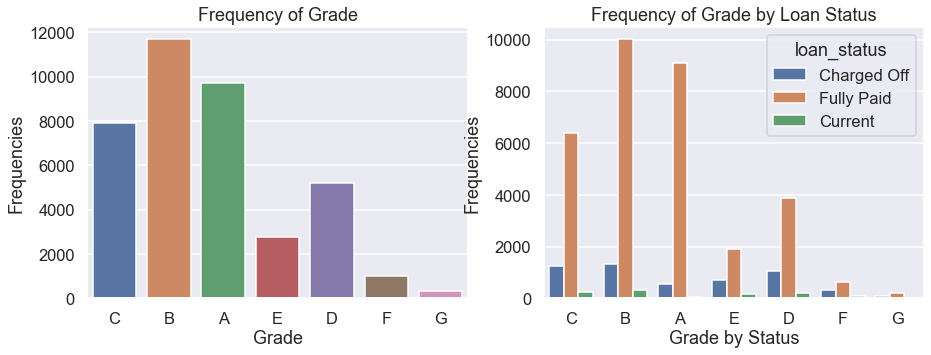

In [97]:
#Grade Distribution - Most of the customers belong to Grade B and A.
#Most of the borrowers who were charged off belongs to grade B,C & D
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Frequency of Grade")
sns.countplot(x='grade',data=ft_data)
plt.xlabel("Grade")
plt.ylabel("Frequencies")
plt.subplot(1,2,2)
plt.title("Frequency of Grade by Loan Status")
sns.countplot(x='grade',data=ft_data,hue='loan_status')
plt.xlabel("Grade by Status")
plt.ylabel("Frequencies")
plt.show()

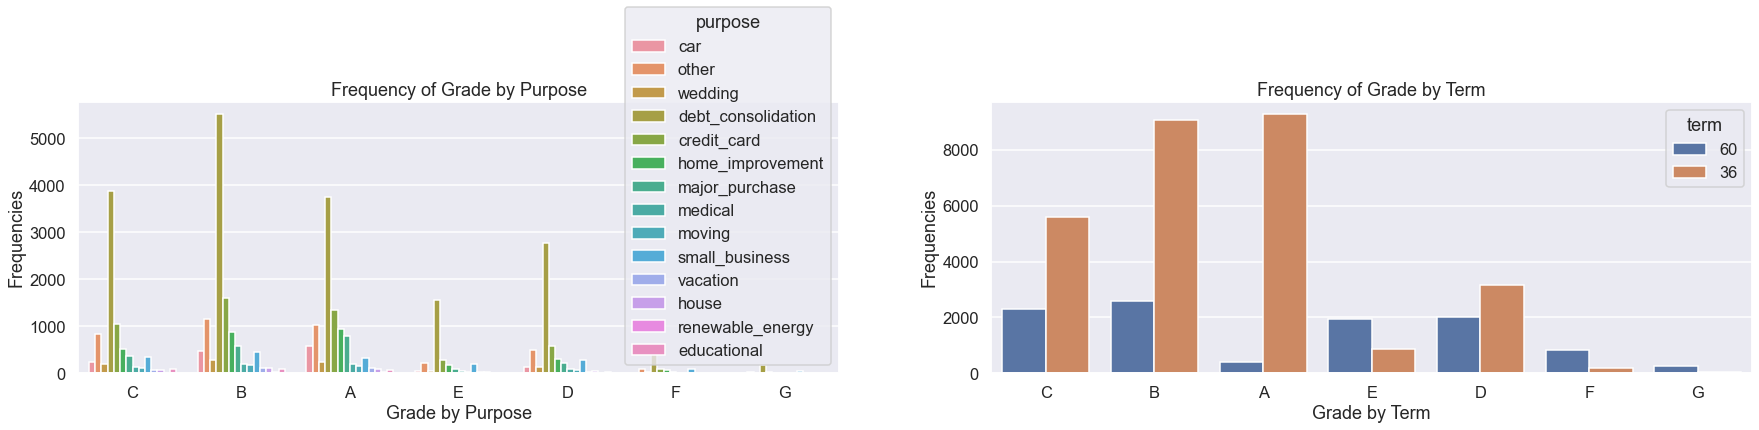

In [98]:
#Grade by purpose and term - Of all the grades , there is higher frequencies for debt consoldiation and credit card.
#Grade E & F have higher frequencies for longer duration , i.e 60 months than shorter duration , i.e 36 months
plt.figure(figsize=(30,5))
plt.subplot(1,2,1)
plt.title("Frequency of Grade by Purpose")
sns.countplot(x='grade',data=ft_data,hue='purpose')
plt.xlabel("Grade by Purpose")
plt.ylabel("Frequencies")
plt.subplot(1,2,2)
plt.title("Frequency of Grade by Term")
sns.countplot(x='grade',data=ft_data,hue='term')
plt.xlabel("Grade by Term")
plt.ylabel("Frequencies")
plt.show()

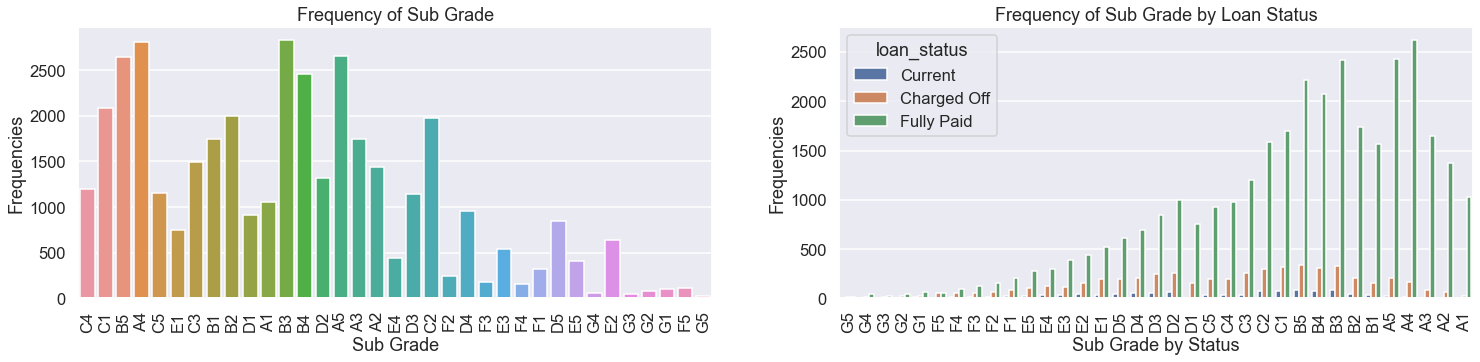

In [99]:
#Sub Grade Distribution - Most of the people belong to A4,A5,B3,B5
#Majority of Charged of Borrowers belongs to C1,B5,B3 & B4

plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
plt.title("Frequency of Sub Grade")
sns.countplot(x='sub_grade',data=ft_data)
plt.xlabel("Sub Grade")
plt.ylabel("Frequencies")
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title("Frequency of Sub Grade by Loan Status")
sns.countplot(x='sub_grade',data=ft_data.sort_values(by='sub_grade',ascending=False),hue='loan_status')
plt.xlabel("Sub Grade by Status")
plt.ylabel("Frequencies")
plt.xticks(rotation=90)
plt.show()

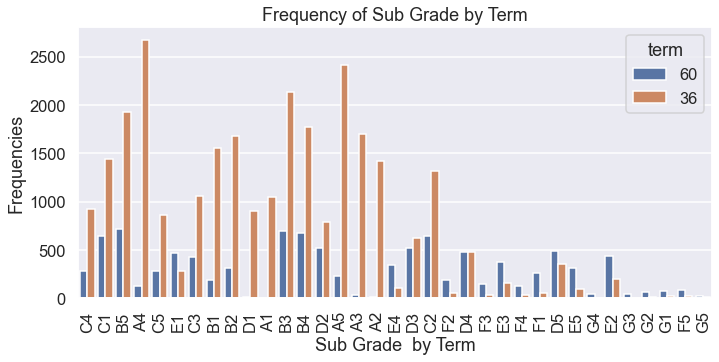

In [100]:
#Sub Grade Distribution By term - Majority of long term loan borrower lies in B3,B4,C2
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
plt.title("Frequency of Sub Grade by Term")
sns.countplot(x='sub_grade',data=ft_data,hue='term')
plt.xlabel("Sub Grade  by Term")
plt.ylabel("Frequencies")
plt.xticks(rotation=90)

plt.show()

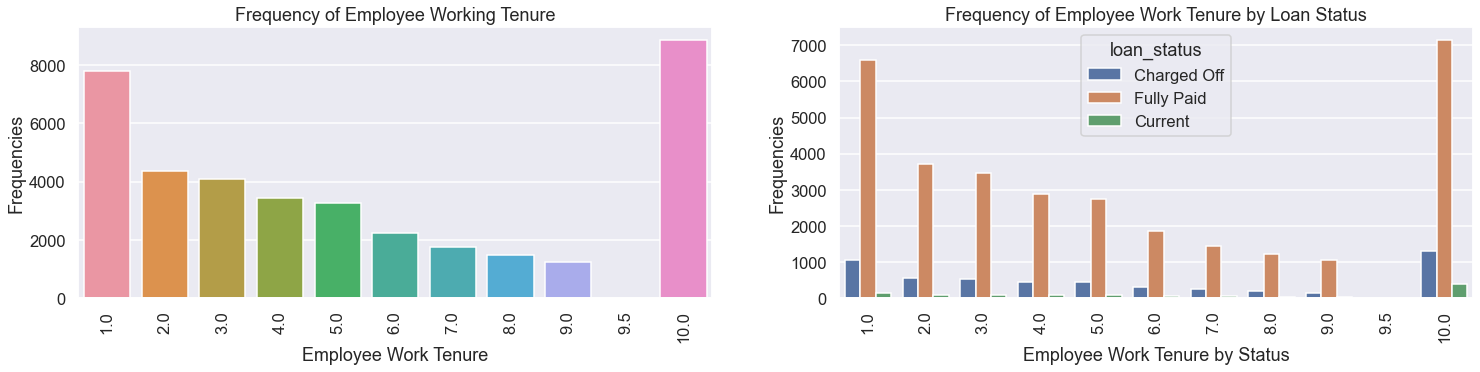

In [101]:
#Employee work tenure Distribution - 
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
plt.title("Frequency of Employee Working Tenure")
sns.countplot(x='emp_length',data=ft_data)
plt.xlabel("Employee Work Tenure")
plt.ylabel("Frequencies")
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title("Frequency of Employee Work Tenure by Loan Status")
sns.countplot(x='emp_length',data=ft_data,hue='loan_status')
plt.xlabel("Employee Work Tenure by Status")
plt.ylabel("Frequencies")
plt.xticks(rotation=90)
plt.show()

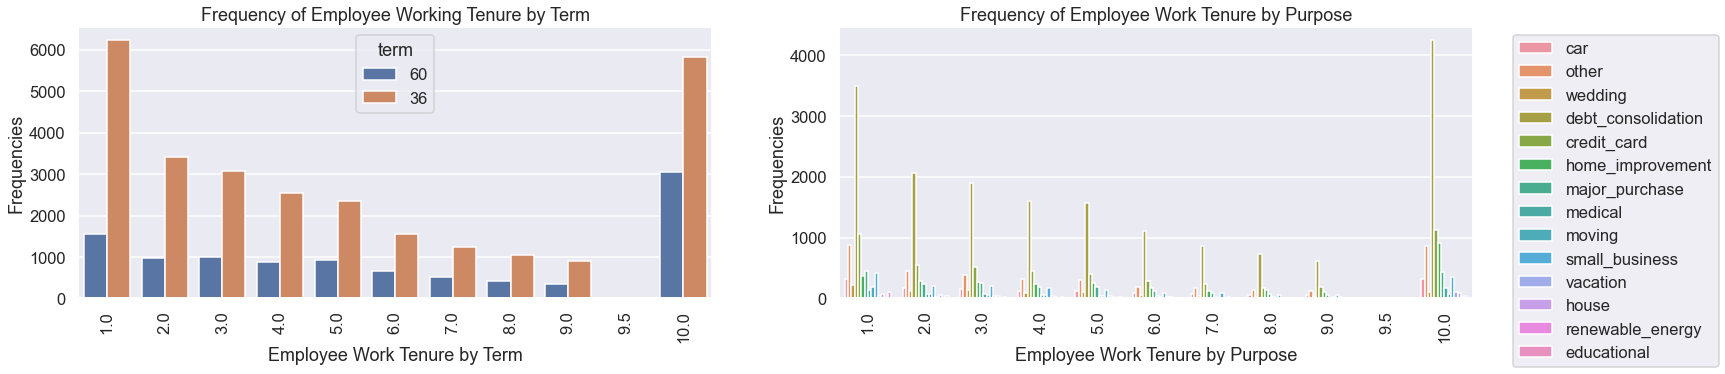

In [102]:
#Employee work tenure Distribution based on term and purpose
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
plt.title("Frequency of Employee Working Tenure by Term")
sns.countplot(x='emp_length',data=ft_data,hue='term')
plt.xlabel("Employee Work Tenure by Term")
plt.ylabel("Frequencies")
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title("Frequency of Employee Work Tenure by Purpose")
sns.countplot(x='emp_length',data=ft_data,hue='purpose')
plt.xlabel("Employee Work Tenure by Purpose")
plt.ylabel("Frequencies")
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
plt.xticks(rotation=90)
plt.show()

We see maximum working tenure of a borrower is of 10+ years. Borrowers of the same have been charged off the most!

Maximum 36 months and 60 months loans were taken by borrowers who had 10+ years experience

Majority of borrowers with 10+ years of experience , their purpose of loan was debt consolidatio

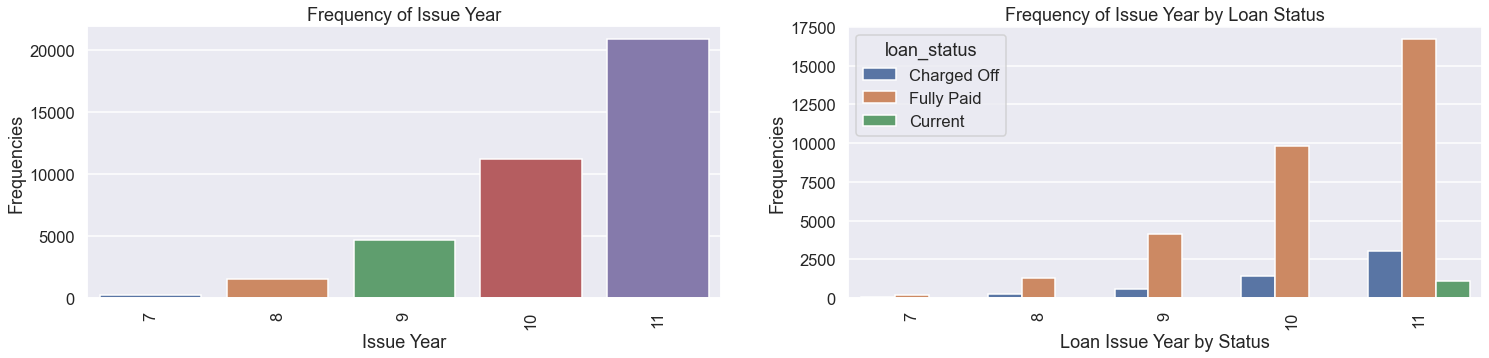

In [103]:
#Issue Year Distribution of Issue Year
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
plt.title("Frequency of Issue Year")
sns.countplot(x='issue_d',data=ft_data)
plt.xlabel("Issue Year")
plt.ylabel("Frequencies")
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title("Frequency of Issue Year by Loan Status")
sns.countplot(x='issue_d',data=ft_data,hue='loan_status')
plt.xlabel("Loan Issue Year by Status")
plt.ylabel("Frequencies")
plt.xticks(rotation=90)
plt.show()

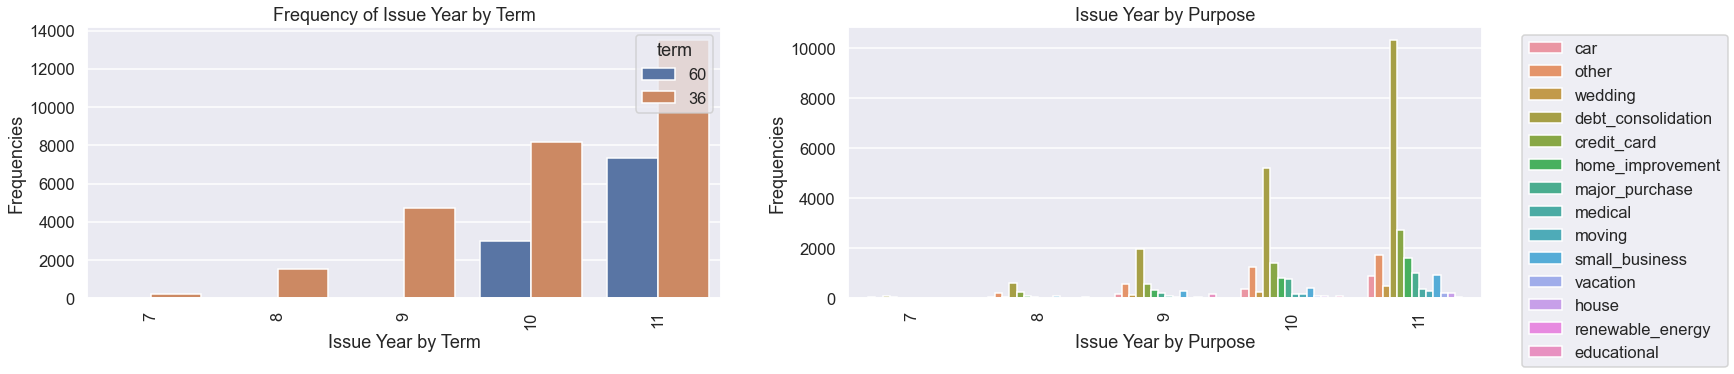

In [104]:
#Issue Year Distribution of Issue Year by Term and purpose
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
plt.title("Frequency of Issue Year by Term")
sns.countplot(x='issue_d',data=ft_data,hue='term')
plt.xlabel("Issue Year by Term")
plt.ylabel("Frequencies")
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title("Issue Year by Purpose")
sns.countplot(x='issue_d',data=ft_data,hue='purpose')
plt.xlabel("Issue Year by Purpose")
plt.ylabel("Frequencies")
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
plt.xticks(rotation=90)
plt.show()

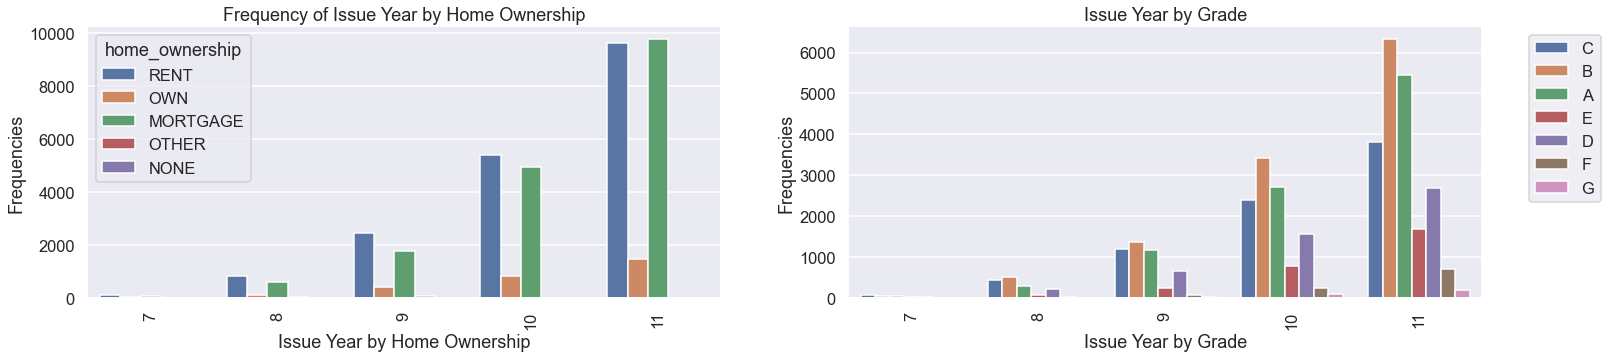

In [105]:
#Issue Year Distribution of Issue Year by home ownership and grade
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
plt.title("Frequency of Issue Year by Home Ownership")
sns.countplot(x='issue_d',data=ft_data,hue='home_ownership')
plt.xlabel("Issue Year by Home Ownership")
plt.ylabel("Frequencies")
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title("Issue Year by Grade")
sns.countplot(x='issue_d',data=ft_data,hue='grade')
plt.xlabel("Issue Year by Grade")
plt.ylabel("Frequencies")
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.xticks(rotation=90)
plt.show()

Most of the loans were issued in 2010 and 2011. Majority of charged off loans are in 2011 and 2010

60 months loans were only given in 2011 and 2010.

In 2011 and 2010 majority of loans were given for debt consolidation and credit card

In 2011 and 2010 majority of home ownership was either rented or mortgaged. And majority of them were having grade as B or A

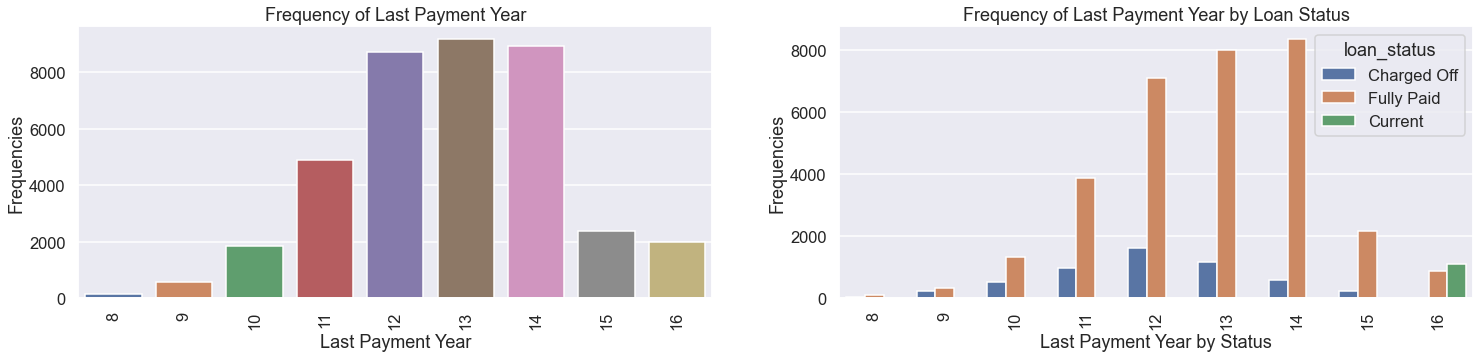

In [106]:
#Issue Year Distribution of Last Payment Year
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
plt.title("Frequency of Last Payment Year")
sns.countplot(x='last_pymnt_yr',data=ft_data)
plt.xlabel("Last Payment Year")
plt.ylabel("Frequencies")
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title("Frequency of Last Payment Year by Loan Status")
sns.countplot(x='last_pymnt_yr',data=ft_data,hue='loan_status')
plt.xlabel("Last Payment Year by Status")
plt.ylabel("Frequencies")
plt.xticks(rotation=90)
plt.show()

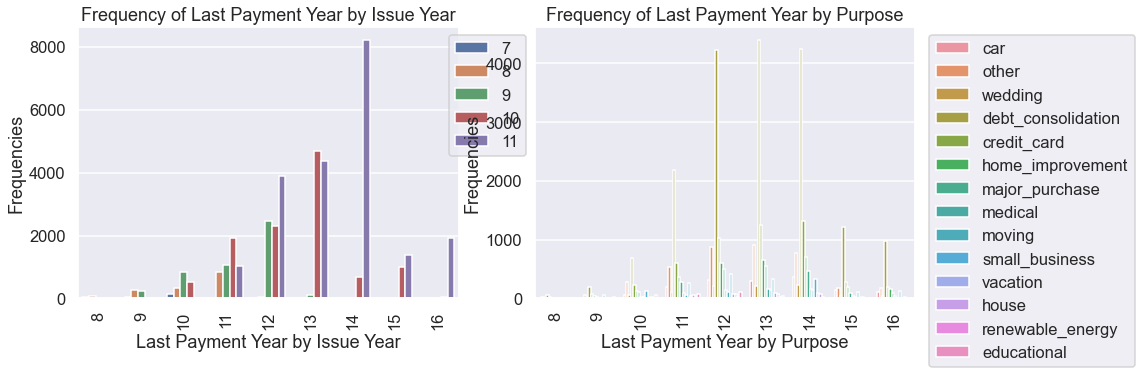

In [107]:
#Issue Year Distribution of Last Payment Year by issue year and purpose
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Frequency of Last Payment Year by Issue Year")
sns.countplot(x='last_pymnt_yr',data=ft_data,hue='issue_d')
plt.xlabel("Last Payment Year by Issue Year")
plt.ylabel("Frequencies")
plt.xticks(rotation=90)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.subplot(1,2,2)
plt.title("Frequency of Last Payment Year by Purpose")
sns.countplot(x='last_pymnt_yr',data=ft_data,hue='purpose')
plt.xlabel("Last Payment Year by Purpose")
plt.ylabel("Frequencies")
plt.xticks(rotation=90)
plt.legend(loc='upper right', bbox_to_anchor=(1.6, 1))
plt.show()

Majority of charged off borrowers are those who had made last payment in years between 2010 to 2014

Majority of borrowers who had made last payment in years between 2010 to 2014, got loan issued in 2010,2011 and 2009. Majority of last payments were made in lieu of debt consolidation and credit card

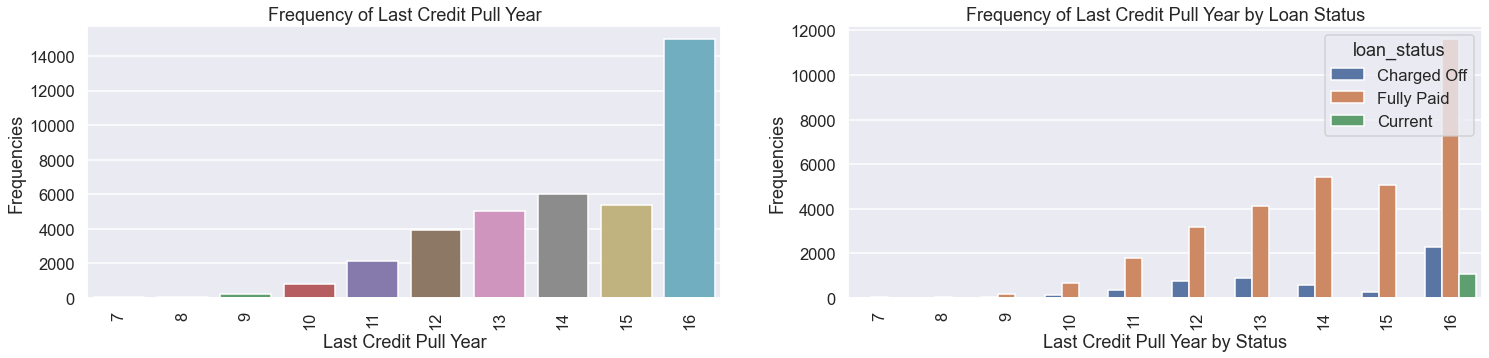

In [108]:
#Issue Year Distribution of Last Credit Pull Year  - In years 2016,2013,2012 of last credit pull year there were maximum charged off borrowers
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
plt.title("Frequency of Last Credit Pull Year")
sns.countplot(x='last_credit_pull_yr',data=ft_data)
plt.xlabel("Last Credit Pull Year")
plt.ylabel("Frequencies")
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title("Frequency of Last Credit Pull Year by Loan Status")
sns.countplot(x='last_credit_pull_yr',data=ft_data,hue='loan_status')
plt.xlabel("Last Credit Pull Year by Status")
plt.ylabel("Frequencies")
plt.xticks(rotation=90)
plt.show()

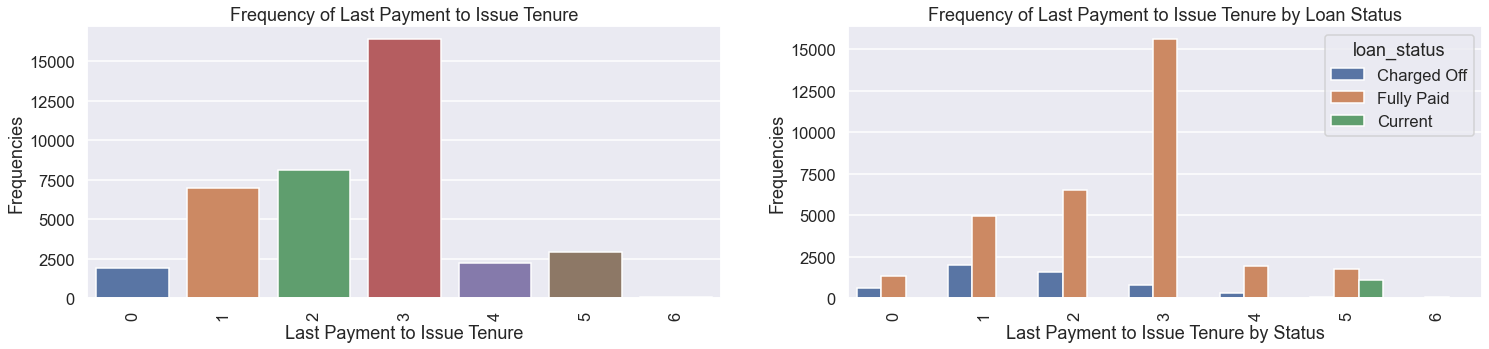

In [109]:
#Issue Year Distribution of Last Payment to Tenure - There were maximum charged off borrowers seen for the tenure from the last payment to issue of 1 and 2 year(s)
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
plt.title("Frequency of Last Payment to Issue Tenure")
sns.countplot(x='last_pymnt_to_issue_Tenure',data=ft_data)
plt.xlabel("Last Payment to Issue Tenure")
plt.ylabel("Frequencies")
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title("Frequency of Last Payment to Issue Tenure by Loan Status")
sns.countplot(x='last_pymnt_to_issue_Tenure',data=ft_data,hue='loan_status')
plt.xlabel("Last Payment to Issue Tenure by Status")
plt.ylabel("Frequencies")
plt.xticks(rotation=90)
plt.show()

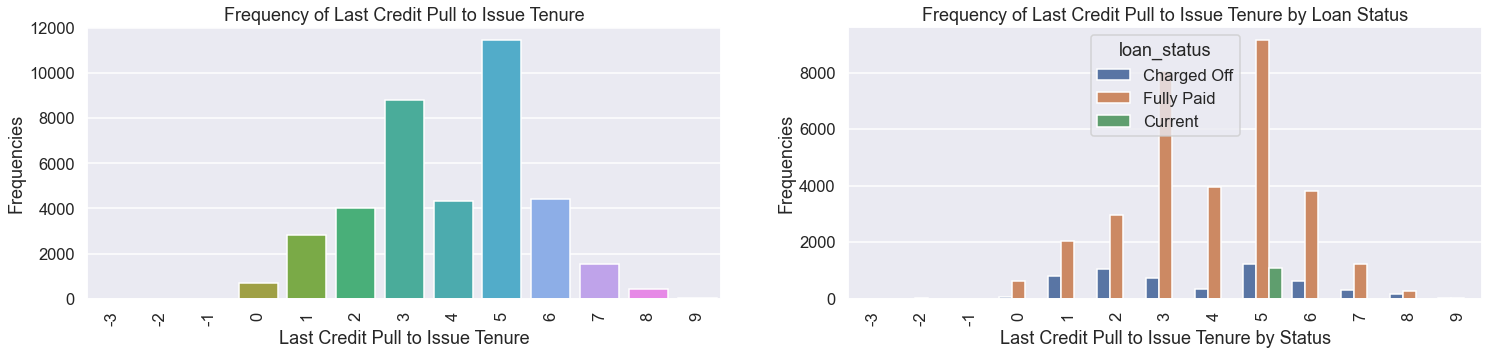

In [110]:
#Issue Year Distribution of Last Credit Pull to issue Tenure - For 1,2,3,5 & 6 years of last credit pull to issue tenure we see majority of charged off borrowers
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
plt.title("Frequency of Last Credit Pull to Issue Tenure")
sns.countplot(x='LC_pull_to_issue_Tenure',data=ft_data)
plt.xlabel("Last Credit Pull to Issue Tenure")
plt.ylabel("Frequencies")
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title("Frequency of Last Credit Pull to Issue Tenure by Loan Status")
sns.countplot(x='LC_pull_to_issue_Tenure',data=ft_data,hue='loan_status')
plt.xlabel("Last Credit Pull to Issue Tenure by Status")
plt.ylabel("Frequencies")
plt.xticks(rotation=90)
plt.show()

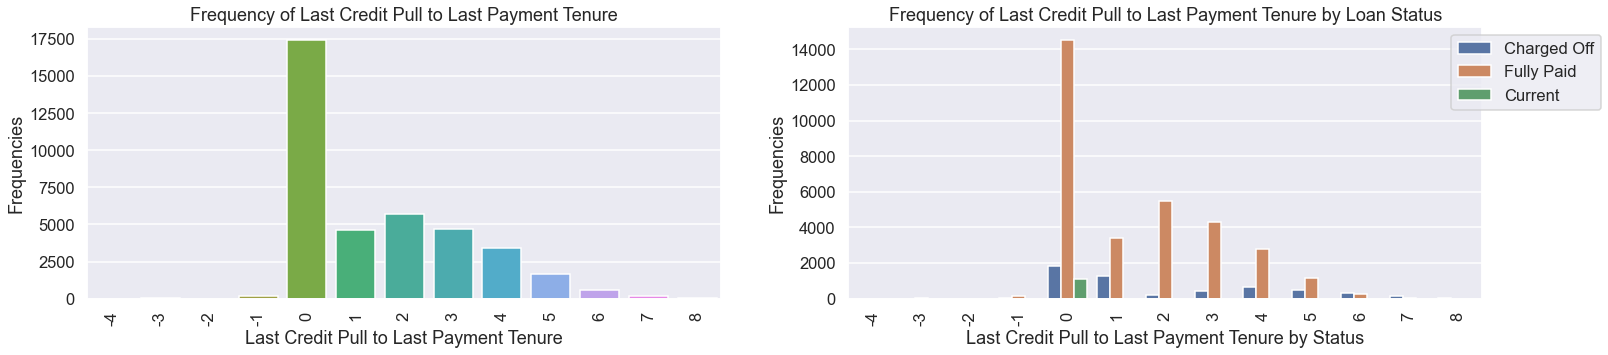

In [111]:
#Issue Year Distribution of Last Payment to Last Payment Tenure
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
plt.title("Frequency of Last Credit Pull to Last Payment Tenure")
sns.countplot(x='LC_pull_to_pymnt_Tenure',data=ft_data)
plt.xlabel("Last Credit Pull to Last Payment Tenure")
plt.ylabel("Frequencies")
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title("Frequency of Last Credit Pull to Last Payment Tenure by Loan Status")
sns.countplot(x='LC_pull_to_pymnt_Tenure',data=ft_data,hue='loan_status')
plt.xlabel("Last Credit Pull to Last Payment Tenure by Status")
plt.ylabel("Frequencies")
plt.xticks(rotation=90)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

Most of the last credit pull to last payment tenure is of 0 years, i.e LC pulled the credit mostly in no gap from the last payment.

Major borrowers charged off during tenure of 0 & 1 years

In [112]:
def IQR(x):
    return x.quantile(.75)-x.quantile(.25)
def ninetynine_Perc(x):
    return x.quantile(.99)
def Range(x):
    return x.max()-x.min()

count    38580.000000
mean     10486.127662
std       5325.567257
min       3828.912097
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      18754.393637
Name: loan_amnt, dtype: float64


IQR of Loan Amount 9500.0


            loan_amnt                                                   \
             describe                                                    
                count          mean          std          min      25%   
loan_status                                                              
Charged Off    5334.0  11126.863500  5529.345126  3828.912097   6000.0   
Current        1099.0  14370.470815  4908.875506  3828.912097  12000.0   
Fully Paid    32147.0  10247.020495  5244.139910  3828.912097   5400.0   

                                                                \
                                                           IQR   
                 50%           75%           max     loan_amnt   
loan_status                                  

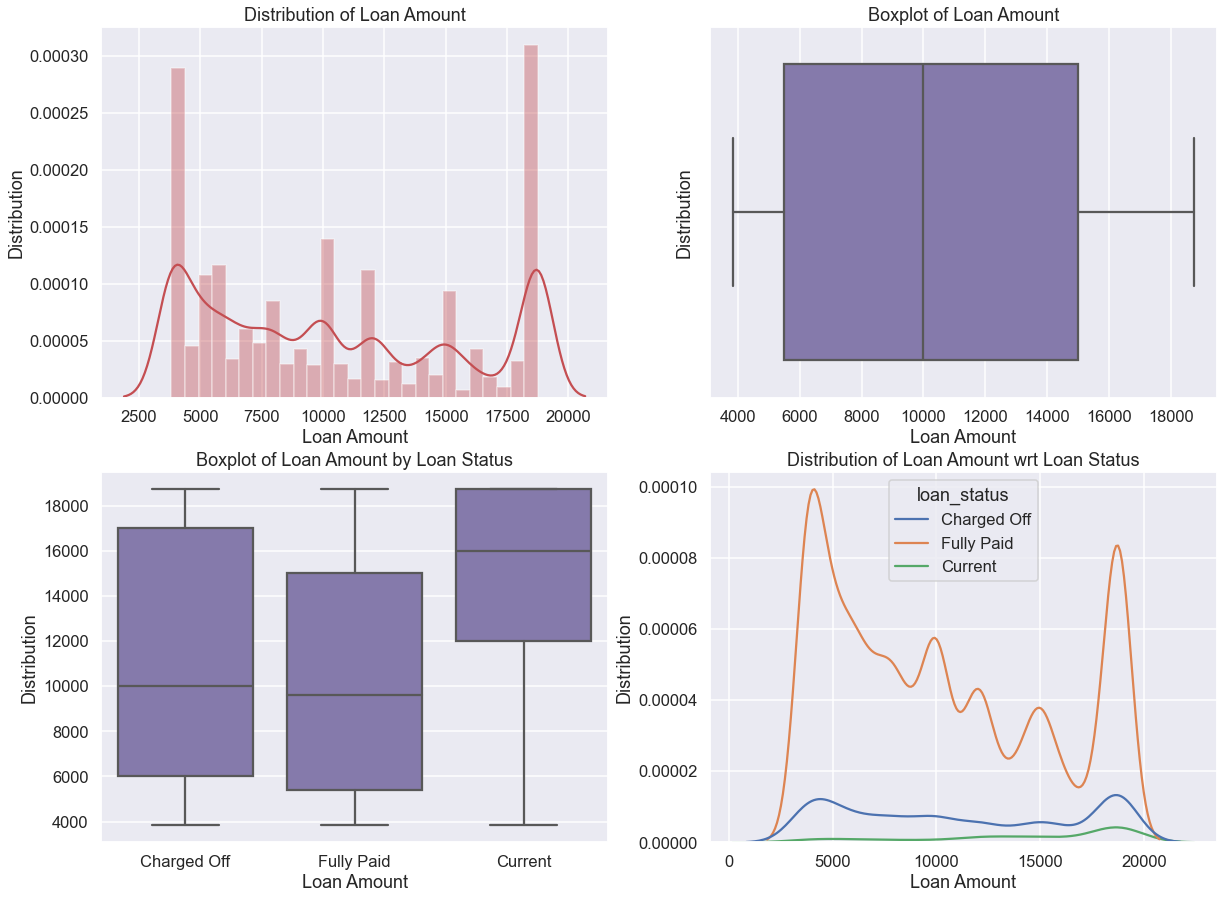

In [113]:
#Distribution of Loan Amount
print(ft_data['loan_amnt'].describe())
print('\n')
print("IQR of Loan Amount {0}".format(IQR(ft_data['loan_amnt'])))
print('\n')
print(ft_data.groupby('loan_status').agg({'loan_amnt':['describe',IQR,ninetynine_Perc,Range,'skew']}))

plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.title("Distribution of Loan Amount")
sns.distplot(ft_data['loan_amnt'],hist=True,kde=True,color='r')
plt.xlabel("Loan Amount")
plt.ylabel("Distribution")
plt.subplot(2,2,2)
plt.title("Boxplot of Loan Amount")
sns.boxplot(x='loan_amnt',data=ft_data,color='m')
plt.xlabel("Loan Amount")
plt.ylabel("Distribution")
plt.subplot(2,2,3)
plt.title("Boxplot of Loan Amount by Loan Status")
sns.boxplot(y='loan_amnt',x='loan_status',data=ft_data,color='m')
plt.xlabel("Loan Amount")
plt.ylabel("Distribution")
plt.subplot(2,2,4)
plt.title("Distribution of Loan Amount wrt Loan Status")
sns.kdeplot(ft_data['loan_amnt'],hue=ft_data['loan_status'])
plt.xlabel('Loan Amount')
plt.ylabel("Distribution")
plt.show()

- Loan amount on the whole is not that skewed as mean and median are mostly similar

- 75% customers apply for loan amount within the range of 9500

- On the basis of loan status we find :

    - For charged off and fully paid loan amount is right/positive skewed
    - 75% of applicants in charged off apply for loan amount in the range of 11000 , which is higher than the range of fully paid. Which states that there is high variation in the charged off applicant group for loan amount
    - When we see the distribution plot of loan amount for each loan status type we find that loan amount curve for applicants who have fully paid have narrow peaks and there are around 5 peaks, which is suggestive of that there is not much variation in the loan amount but there are atleast 5 clusters of applicants within the data of Fully Paid. Whereas the distribution plot of charged off loan amount, it is very broad and shorter in height, which means there are lot of variance. and there are two peaks which is suggestive of atleast two clusters 
    
- We see that third quartile of loan amount for charged off borrowers is more than fully paid. Which states chance of defaulting is more , but there are 50% borrowers who could have avoided to default but they could not.



count    38580.000000
mean        12.046858
std          3.712004
min          5.420000
25%          9.320000
50%         11.860000
75%         14.590000
max         22.495000
Name: int_rate, dtype: float64


IQR of Interest Rate 5.27


            int_rate                                                           \
            describe                                                            
               count       mean       std   min     25%    50%    75%     max   
loan_status                                                                     
Charged Off   5334.0  13.875161  3.633787  5.42  11.385  13.61  16.45  22.495   
Current       1099.0  15.085901  3.556831  6.00  11.990  14.65  17.99  22.495   
Fully Paid   32147.0  11.639601  3.588511  5.42   8.590  11.49  13.99  22.495   

                                                         
                 IQR ninetynine_Perc    Range      skew  
            int_rate        int_rate int_rate  int_rate  
loan_status          

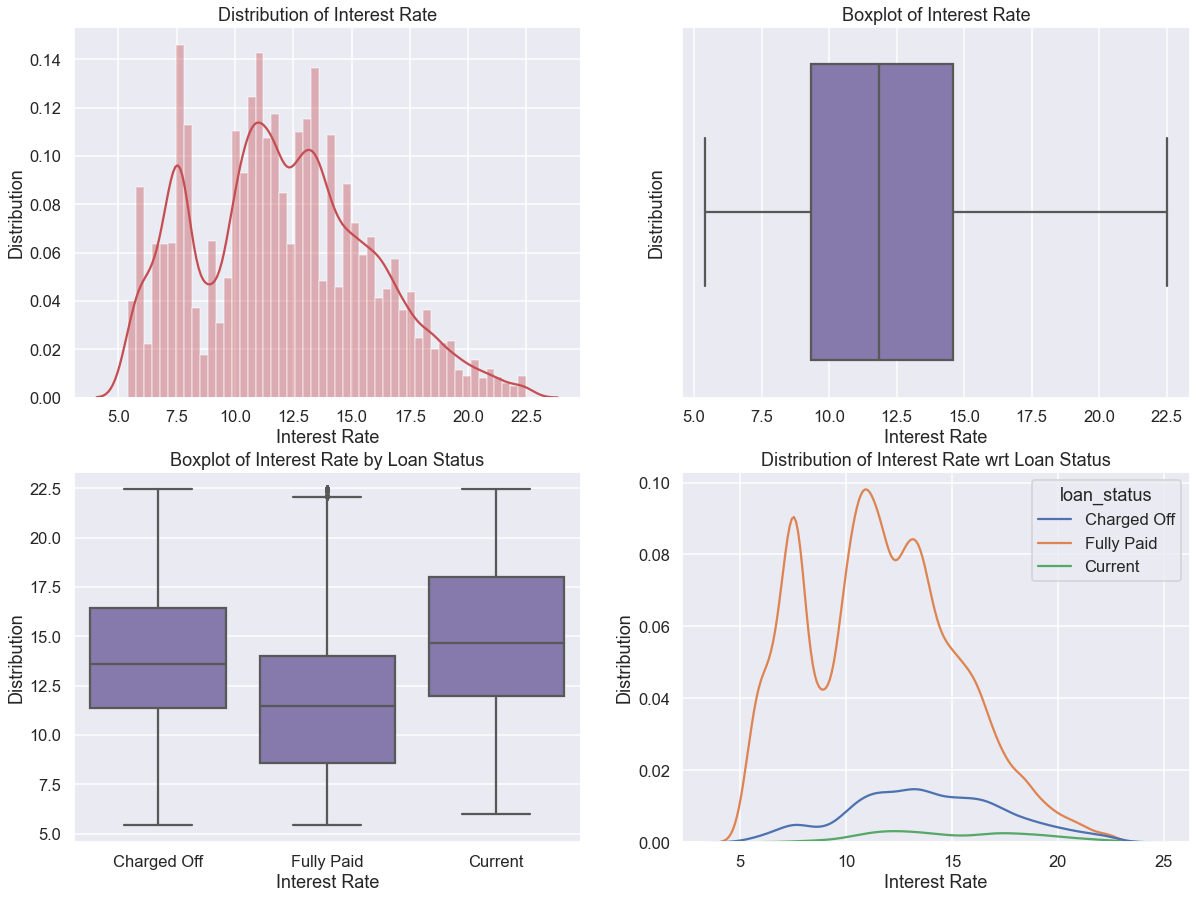

In [114]:
#Distribution of Interest rate
print(ft_data['int_rate'].describe())
print('\n')
print("IQR of Interest Rate {0}".format(IQR(ft_data['int_rate'])))
print('\n')
print(ft_data.groupby('loan_status').agg({'int_rate':['describe',IQR,ninetynine_Perc,Range,'skew']}))

plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.title("Distribution of Interest Rate")
sns.distplot(ft_data['int_rate'],hist=True,kde=True,color='r')
plt.xlabel("Interest Rate")
plt.ylabel("Distribution")
plt.subplot(2,2,2)
plt.title("Boxplot of Interest Rate")
sns.boxplot(x='int_rate',data=ft_data,color='m')
plt.xlabel("Interest Rate")
plt.ylabel("Distribution")
plt.subplot(2,2,3)
plt.title("Boxplot of Interest Rate by Loan Status")
sns.boxplot(y='int_rate',x='loan_status',data=ft_data,color='m')
plt.xlabel("Interest Rate")
plt.ylabel("Distribution")
plt.subplot(2,2,4)
plt.title("Distribution of Interest Rate wrt Loan Status")
sns.kdeplot(ft_data['int_rate'],hue=ft_data['loan_status'])
plt.xlabel('Interest Rate')
plt.ylabel("Distribution")
plt.show()

- When we see the distribution of interest rate we see it is positive skewed, that is you will find the applicants having high high interest rates will be driving the factor towards them. Variation on the whole is 5.27

- There is high variation in interest rate of those who have fully paid their debt, since IQR for them is 5.4, which means 75% of applicants in fully paid group lie in the range of 5.4 as interest rate. But within the bracket, the interest rates are lesser as when we compare to the interest rate in the same bracket

- To the very contrast the 99% of people in charged off category lies under interest rate of 22.1 but 99% of fully paid clients lies under interest rate of 20.5. Which is suggestive of the top 25% of applicants who are being charged off had availed loan in inflated interest rate that is very high interest rate

- We see that there is high variance in distribution plot for interest rate with charged off category, for fully paid we see there is less variation and there are minimum of 2 internal clusters 

count    38580.000000
mean       305.010096
std        147.712756
min        117.603382
25%        168.450000
50%        283.045000
75%        434.572500
max        535.905942
Name: installment, dtype: float64


IQR of installment 266.1225


            installment                                                      \
               describe                                                       
                  count        mean         std         min     25%     50%   
loan_status                                                                   
Charged Off      5334.0  314.886417  150.845277  117.603382  172.34  298.67   
Current          1099.0  366.309727  143.675703  117.603382  260.85  370.22   
Fully Paid      32147.0  301.275733  146.788432  117.603382  166.50  277.69   

                                                                           \
                                          IQR ninetynine_Perc       Range   
                  75%         max installment     

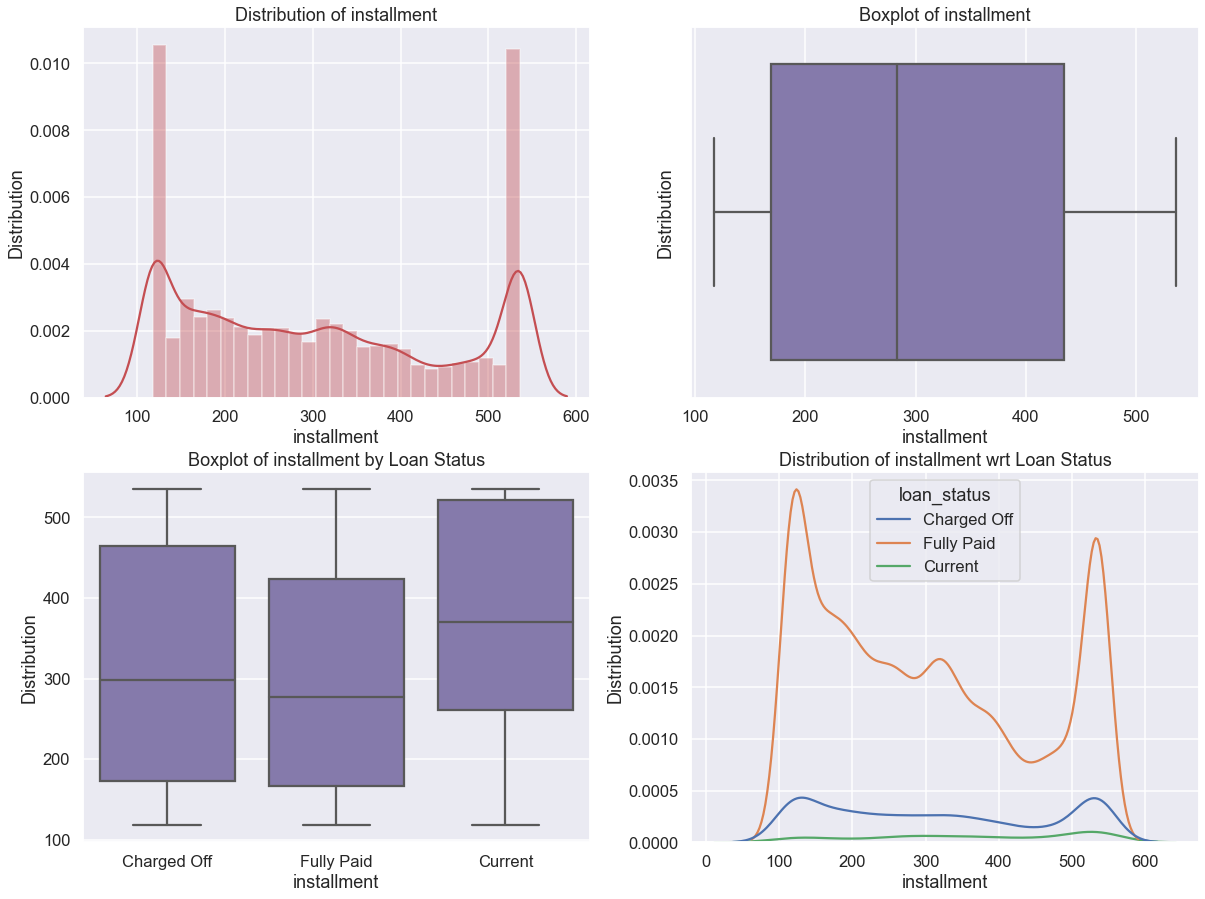

In [115]:
#Distribution of Installments
print(ft_data['installment'].describe())
print('\n')
print("IQR of installment {0}".format(IQR(ft_data['installment'])))
print('\n')
print(ft_data.groupby('loan_status').agg({'installment':['describe',IQR,ninetynine_Perc,Range,'skew']}))

plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.title("Distribution of installment")
sns.distplot(ft_data['installment'],hist=True,kde=True,color='r')
plt.xlabel("installment")
plt.ylabel("Distribution")
plt.subplot(2,2,2)
plt.title("Boxplot of installment")
sns.boxplot(x='installment',data=ft_data,color='m')
plt.xlabel("installment")
plt.ylabel("Distribution")
plt.subplot(2,2,3)
plt.title("Boxplot of installment by Loan Status")
sns.boxplot(y='installment',x='loan_status',data=ft_data,color='m')
plt.xlabel("installment")
plt.ylabel("Distribution")
plt.subplot(2,2,4)
plt.title("Distribution of installment wrt Loan Status")
sns.kdeplot(ft_data['installment'],hue=ft_data['loan_status'])
plt.xlabel('installment')
plt.ylabel("Distribution")
plt.show()

- We see data is bit right skewed

- On an average applicant pays installment of 282

- Variation in installemnt is 265.9, which means it captures 50% of the borrowers installments

- Borrowers of charged off category have high variation in their installment. Which states that borrowers tend to pay more installment amount than others. Reason for high installment value is higher interest rate also .


count     38580.000000
mean      65231.563256
std       31229.236104
min        5352.782969
25%       41496.000000
50%       60000.000000
75%       83200.000000
max      133853.372279
Name: annual_inc, dtype: float64


IQR of Annual Income 41704.0


            annual_inc                                                     \
              describe                                                      
                 count          mean           std           min      25%   
loan_status                                                                 
Charged Off     5334.0  60256.535702  29835.158792   5352.782969  38400.0   
Current         1099.0  71875.947643  31113.253795  10020.000000  48000.0   
Fully Paid     32147.0  65829.896492  31364.332300   5352.782969  42000.0   

                                                                         \
                                                    IQR ninetynine_Perc   
                 50%      75%            max annual_inc     

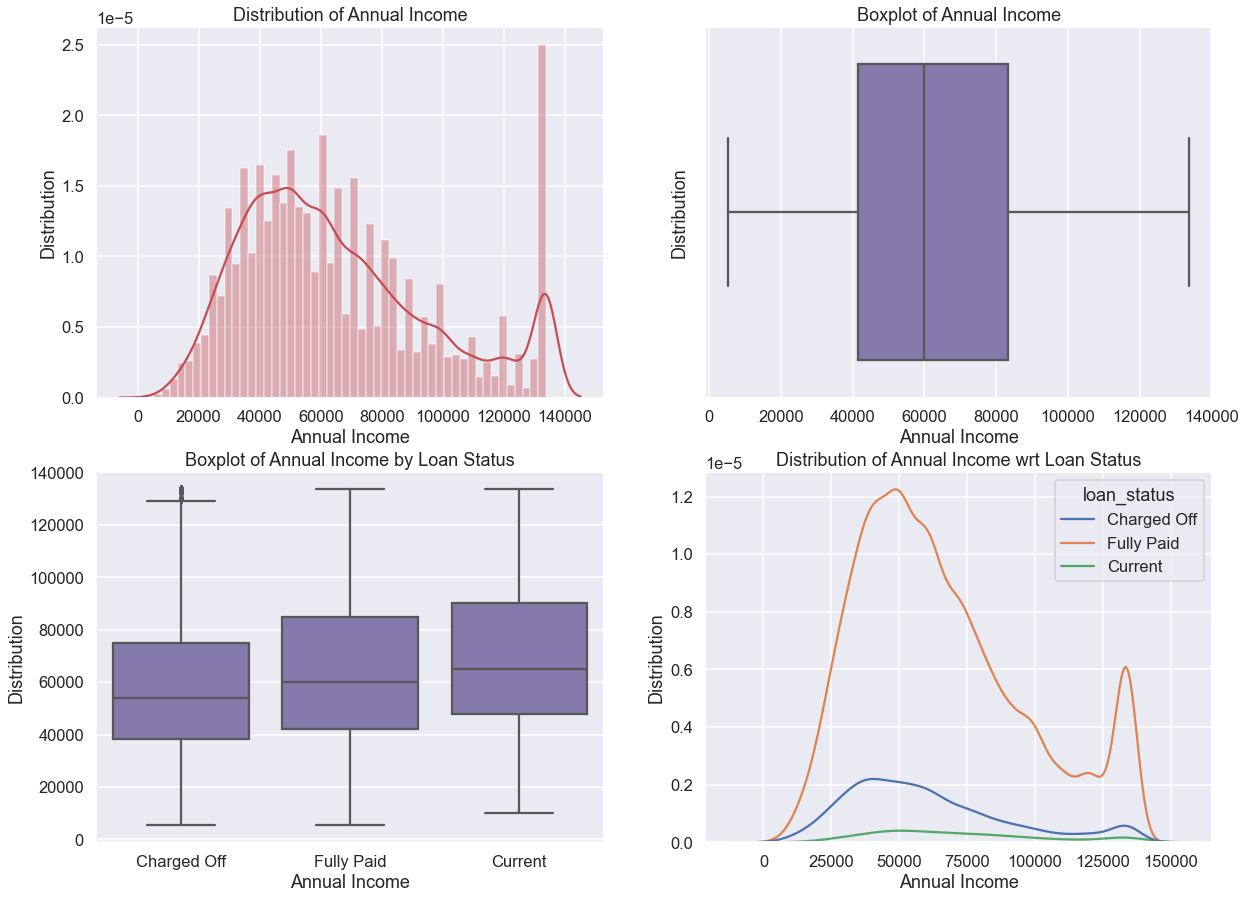

In [116]:
#Distribution of Annual Income
print(ft_data['annual_inc'].describe())
print('\n')
print("IQR of Annual Income {0}".format(IQR(ft_data['annual_inc'])))
print('\n')
print(ft_data.groupby('loan_status').agg({'annual_inc':['describe',IQR,ninetynine_Perc,Range,'skew']}))

plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.title("Distribution of Annual Income")
sns.distplot(ft_data['annual_inc'],hist=True,kde=True,color='r')
plt.xlabel("Annual Income")
plt.ylabel("Distribution")
plt.subplot(2,2,2)
plt.title("Boxplot of Annual Income")
sns.boxplot(x='annual_inc',data=ft_data,color='m')
plt.xlabel("Annual Income")
plt.ylabel("Distribution")
plt.subplot(2,2,3)
plt.title("Boxplot of Annual Income by Loan Status")
sns.boxplot(y='annual_inc',x='loan_status',data=ft_data,color='m')
plt.xlabel("Annual Income")
plt.ylabel("Distribution")
plt.subplot(2,2,4)
plt.title("Distribution of Annual Income wrt Loan Status")
sns.kdeplot(ft_data['annual_inc'],hue=ft_data['loan_status'])
plt.xlabel('Annual Income')
plt.ylabel("Distribution")
plt.show()

Data seems to be right skewed

Average annual income of borrower is 60000

Variation in annual income is 41841.6

We see that that there is increase in Q1,Q2 and Q3 in fully paid borrower than borrowers who are being charged off. It is suggestive of that borrowers who have higher annual income tend not to default . 

We can see the Third Quantile and First Quantile decreases from fully paid to charged off, it means that the borrowers which are charged off they do not belong to sound income group. Such people income distribution is low , either they are not well experienced or they do not have good jobs.

There is high variation in annual income of charged off customers , which states that borrowers belong to varied income group, though there are people who have sound income , but still they could not managed to clear out the debt. 



count    38580.000000
mean        13.328253
std          6.666626
min          0.000000
25%          8.210000
50%         13.420000
75%         18.600000
max         29.990000
Name: dti, dtype: float64


IQR of Debt to Income 10.39


                 dti                                                         \
            describe                                                          
               count       mean       std  min     25%    50%    75%    max   
loan_status                                                                   
Charged Off   5334.0  14.006862  6.563049  0.0  9.1225  14.32  19.27  29.85   
Current       1099.0  14.734732  6.741299  0.0  9.7050  15.03  20.11  29.95   
Fully Paid   32147.0  13.167572  6.668579  0.0  8.0200  13.21  18.40  29.99   

                                                       
                 IQR ninetynine_Perc  Range      skew  
                 dti             dti    dti       dti  
loan_status                                 

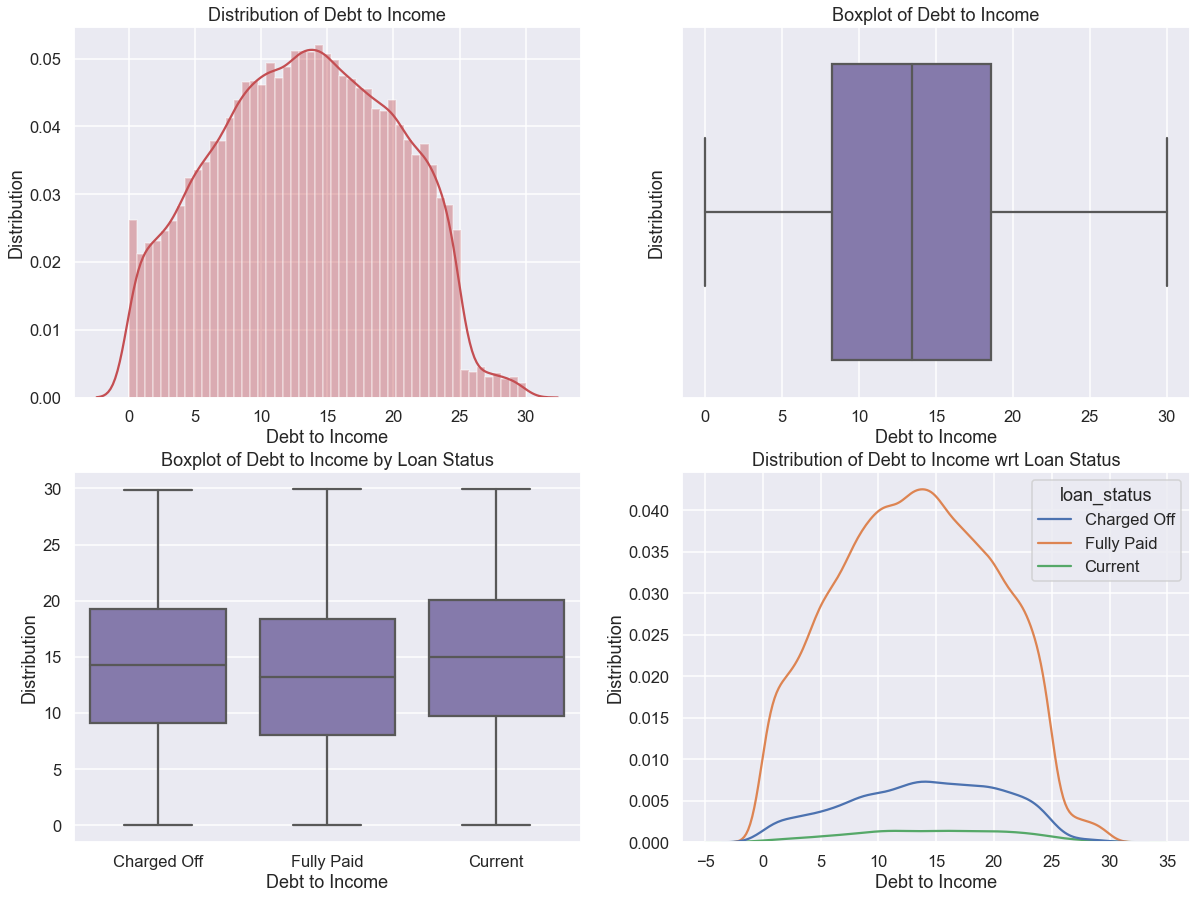

In [117]:
#Distribution of DTI
print(ft_data['dti'].describe())
print('\n')
print("IQR of Debt to Income {0}".format(IQR(ft_data['dti'])))
print('\n')
print(ft_data.groupby('loan_status').agg({'dti':['describe',IQR,ninetynine_Perc,Range,'skew']}))

plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.title("Distribution of Debt to Income")
sns.distplot(ft_data['dti'],hist=True,kde=True,color='r')
plt.xlabel("Debt to Income")
plt.ylabel("Distribution")
plt.subplot(2,2,2)
plt.title("Boxplot of Debt to Income")
sns.boxplot(x='dti',data=ft_data,color='m')
plt.xlabel("Debt to Income")
plt.ylabel("Distribution")
plt.subplot(2,2,3)
plt.title("Boxplot of Debt to Income by Loan Status")
sns.boxplot(y='dti',x='loan_status',data=ft_data,color='m')
plt.xlabel("Debt to Income")
plt.ylabel("Distribution")
plt.subplot(2,2,4)
plt.title("Distribution of Debt to Income wrt Loan Status")
sns.kdeplot(ft_data['dti'],hue=ft_data['loan_status'])
plt.xlabel('Debt to Income')
plt.ylabel("Distribution")
plt.show()

- Average contribution of dti of the applicant is on higher side for Charged Off category as compared to Fully paid, 

- which means those who are not likely to default are the ones who demonstrates a good balance between debt and income, 

- which means the those who have been charged off has too much debt for the amount of income earned each month. 

- Q3 and Q1 are decreasing for applicants belonging to Fully Paid category , 

- which means they have lesser debt as compared to income hence they can have more savings and can pay their debt 

- We can see that there is high variation in dti of fully paid slightly

count    38580.000000
mean         8.977584
std          3.113504
min          4.921966
25%          6.000000
50%          9.000000
75%         12.000000
max         13.712168
Name: open_acc, dtype: float64


IQR of Open Account 6.0


            open_acc                                                           \
            describe                                                            
               count      mean       std       min  25%  50%   75%        max   
loan_status                                                                     
Charged Off   5334.0  8.930003  3.135250  4.921966  6.0  9.0  12.0  13.712168   
Current       1099.0  9.478124  3.021026  4.921966  7.0  9.0  12.0  13.712168   
Fully Paid   32147.0  8.968367  3.111642  4.921966  6.0  9.0  12.0  13.712168   

                                                          
                 IQR ninetynine_Perc     Range      skew  
            open_acc        open_acc  open_acc  open_acc  
loan_status         

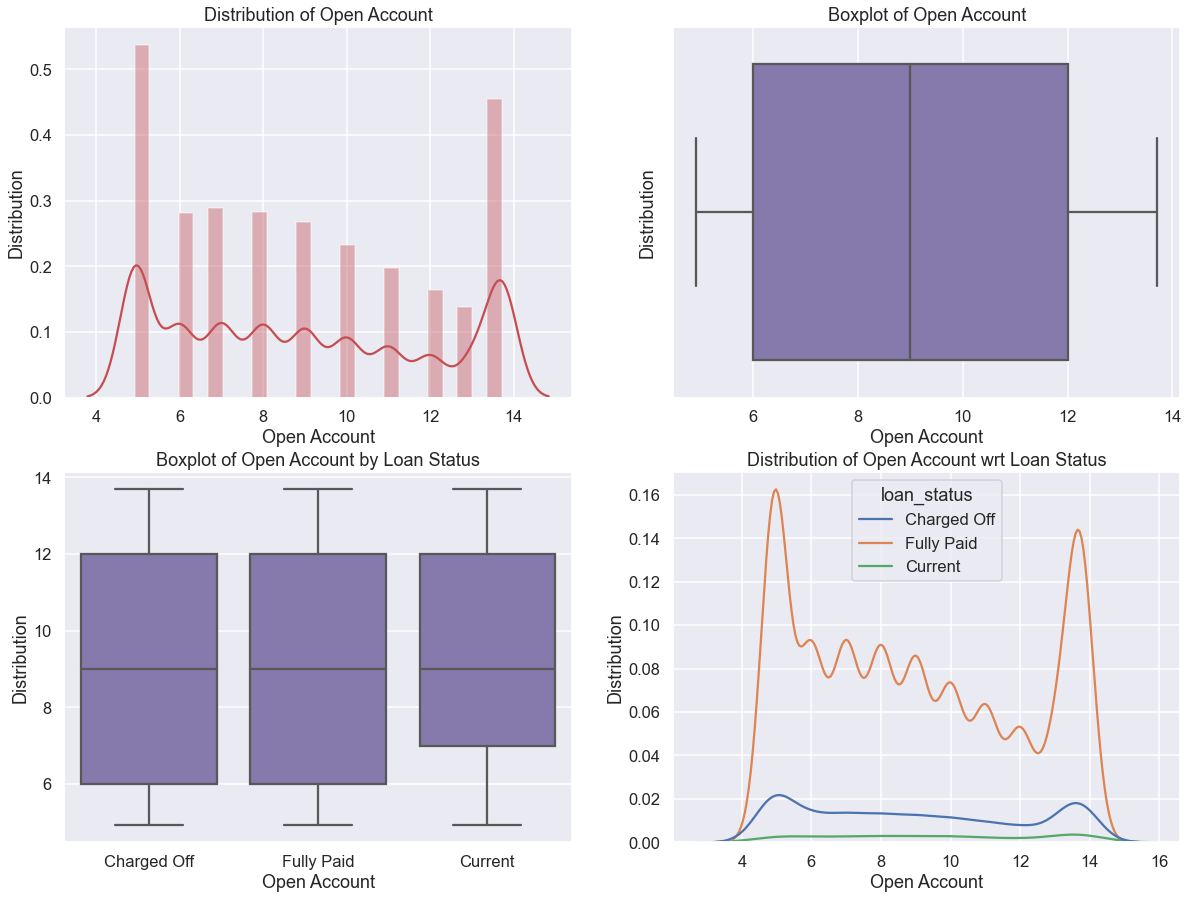

In [118]:
#Distribution of Open Account
print(ft_data['open_acc'].describe())
print('\n')
print("IQR of Open Account {0}".format(IQR(ft_data['open_acc'])))
print('\n')
print(ft_data.groupby('loan_status').agg({'open_acc':['describe',IQR,ninetynine_Perc,Range,'skew']}))

plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.title("Distribution of Open Account")
sns.distplot(ft_data['open_acc'],hist=True,kde=True,color='r')
plt.xlabel("Open Account")
plt.ylabel("Distribution")
plt.subplot(2,2,2)
plt.title("Boxplot of Open Account")
sns.boxplot(x='open_acc',data=ft_data,color='m')
plt.xlabel("Open Account")
plt.ylabel("Distribution")
plt.subplot(2,2,3)
plt.title("Boxplot of Open Account by Loan Status")
sns.boxplot(y='open_acc',x='loan_status',data=ft_data,color='m')
plt.xlabel("Open Account")
plt.ylabel("Distribution")
plt.subplot(2,2,4)
plt.title("Distribution of Open Account wrt Loan Status")
sns.kdeplot(ft_data['open_acc'],hue=ft_data['loan_status'])
plt.xlabel('Open Account')
plt.ylabel("Distribution")
plt.show()


Data is positive skewed

There is not much difference in the average of open account with respect to different loan statuses , hence it is not possible to state with surety that open account has any affect on loan status or no

count    38580.000000
mean     11374.240928
std       9202.730016
min          0.000000
25%       3751.750000
50%       8945.000000
75%      17164.500000
max      29370.943996
Name: revol_bal, dtype: float64


IQR of Revolving Balance 13412.75


            revol_bal                                                    \
             describe                                                     
                count          mean          std  min      25%      50%   
loan_status                                                               
Charged Off    5334.0  11756.195533  9249.509438  0.0  4092.25   9421.0   
Current        1099.0  14147.886806  9431.587498  0.0  6103.50  12837.0   
Fully Paid    32147.0  11216.043190  9170.299740  0.0  3636.00   8768.0   

                                                                             \
                                          IQR ninetynine_Perc         Range   
                  75%           max revol_bal       revol_bal     revo

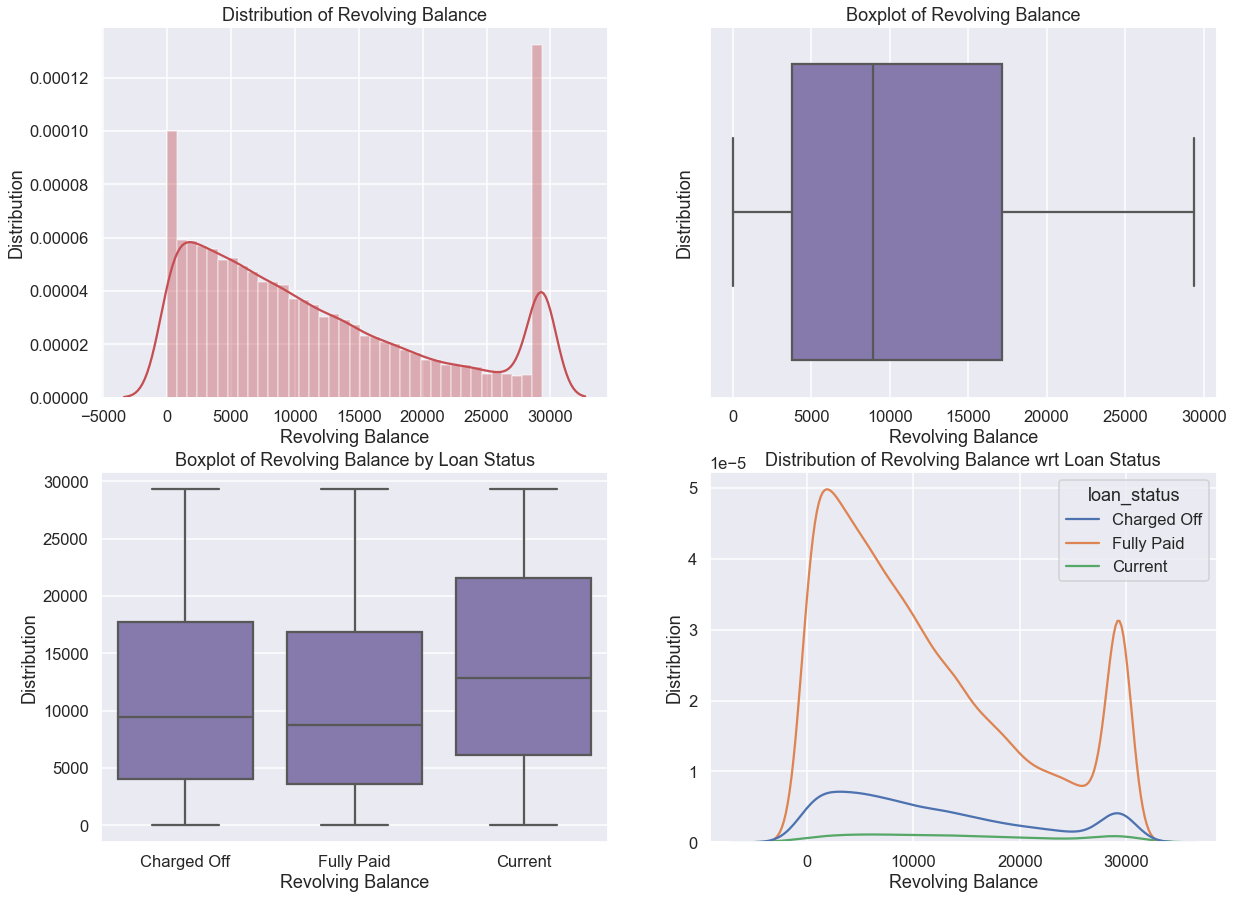

In [119]:
#Distribution of Revolving Balance
print(ft_data['revol_bal'].describe())
print('\n')
print("IQR of Revolving Balance {0}".format(IQR(ft_data['revol_bal'])))
print('\n')
print(ft_data.groupby('loan_status').agg({'revol_bal':['describe',IQR,ninetynine_Perc,Range,'skew']}))

plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.title("Distribution of Revolving Balance")
sns.distplot(ft_data['revol_bal'],hist=True,kde=True,color='r')
plt.xlabel("Revolving Balance")
plt.ylabel("Distribution")
plt.subplot(2,2,2)
plt.title("Boxplot of Revolving Balance")
sns.boxplot(x='revol_bal',data=ft_data,color='m')
plt.xlabel("Revolving Balance")
plt.ylabel("Distribution")
plt.subplot(2,2,3)
plt.title("Boxplot of Revolving Balance by Loan Status")
sns.boxplot(y='revol_bal',x='loan_status',data=ft_data,color='m')
plt.xlabel("Revolving Balance")
plt.ylabel("Distribution")
plt.subplot(2,2,4)
plt.title("Distribution of Revolving Balance wrt Loan Status")
sns.kdeplot(ft_data['revol_bal'],hue=ft_data['loan_status'])
plt.xlabel('Revolving Balance')
plt.ylabel("Distribution")
plt.show()

Data is right skewed

Average revolving balance - 8937

Variation in revolving balance - 13404

We can see highest variation in revolving balance of charged off borrowers , which means major portion of installments goes unpaid at the end of billing cycle. There are large number of people having high unpaid balance .

We see that Q3 of Charged Off borrowers is more than fully paid ,which states that chance of leaving the balance for next payment(revolving balance) is higher

count    38580.000000
mean        48.943368
std         28.336930
min          0.000000
25%         25.500000
50%         49.500000
75%         72.500000
max         99.900000
Name: revol_util, dtype: float64


IQR of Revolving Utilization 47.0


            revol_util                                                       \
              describe                                                        
                 count       mean        std  min     25%   50%   75%   max   
loan_status                                                                   
Charged Off     5334.0  55.708851  27.939304  0.0  34.625  58.7  79.1  99.9   
Current         1099.0  53.640227  26.696715  0.0  33.000  55.8  75.0  99.9   
Fully Paid     32147.0  47.660234  28.281292  0.0  24.100  47.8  70.9  99.9   

                                                              
                   IQR ninetynine_Perc      Range       skew  
            revol_util      revol_util revol_util revol_util  
loan_statu

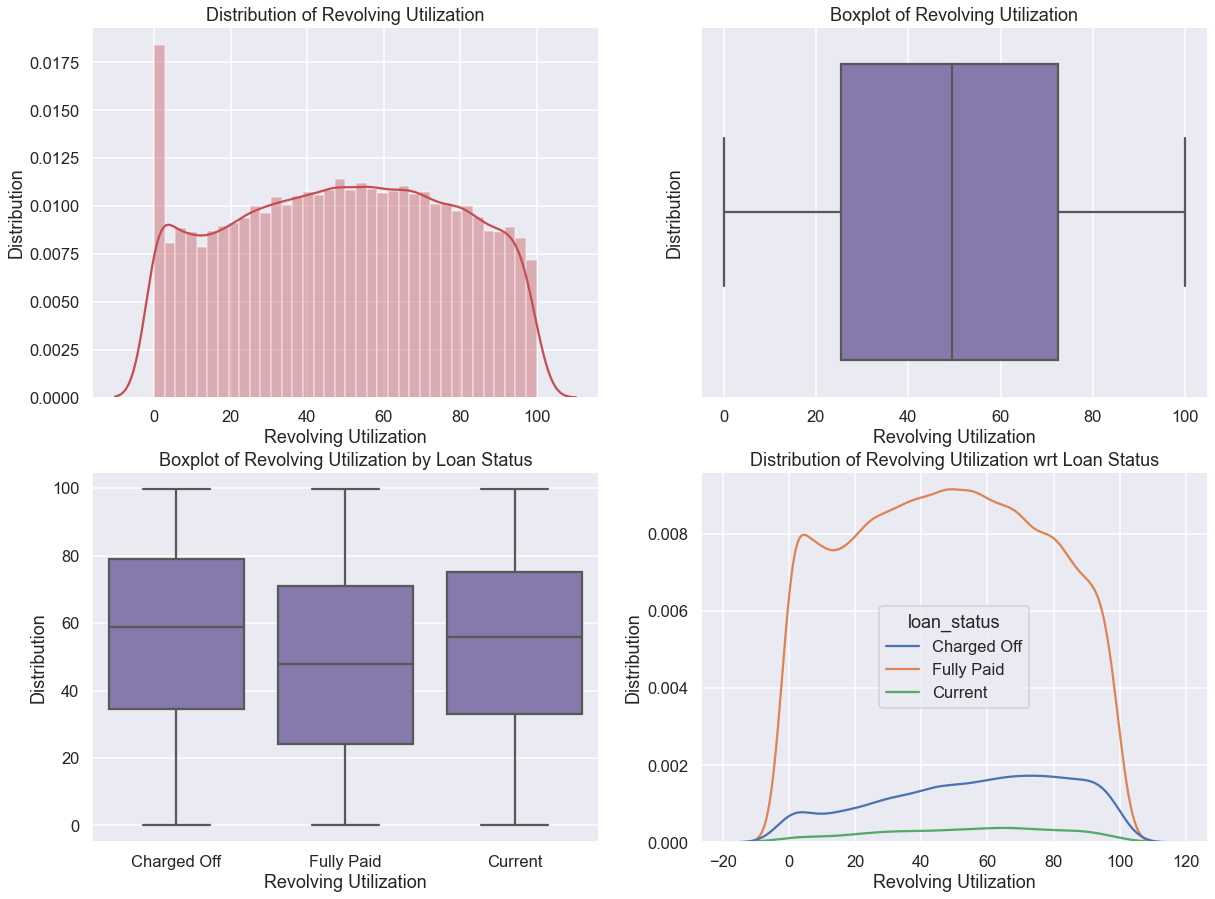

In [120]:
#Distribution of Revolving utilization
print(ft_data['revol_util'].describe())
print('\n')
print("IQR of Revolving Utilization {0}".format(IQR(ft_data['revol_util'])))
print('\n')
print(ft_data.groupby('loan_status').agg({'revol_util':['describe',IQR,ninetynine_Perc,Range,'skew']}))

plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.title("Distribution of Revolving Utilization")
sns.distplot(ft_data['revol_util'],hist=True,kde=True,color='r')
plt.xlabel("Revolving Utilization")
plt.ylabel("Distribution")
plt.subplot(2,2,2)
plt.title("Boxplot of Revolving Utilization")
sns.boxplot(x='revol_util',data=ft_data,color='m')
plt.xlabel("Revolving Utilization")
plt.ylabel("Distribution")
plt.subplot(2,2,3)
plt.title("Boxplot of Revolving Utilization by Loan Status")
sns.boxplot(y='revol_util',x='loan_status',data=ft_data,color='m')
plt.xlabel("Revolving Utilization")
plt.ylabel("Distribution")
plt.subplot(2,2,4)
plt.title("Distribution of Revolving Utilization wrt Loan Status")
sns.kdeplot(ft_data['revol_util'],hue=ft_data['loan_status'])
plt.xlabel('Revolving Utilization')
plt.ylabel("Distribution")
plt.show()

Data skewness is not present

Average credit utilization rate is 49.5, variation is 47

Borrowers who were charged off had higher revolving utilization , i.e credit utilization which is 58.6, which means there was less difference in their debt and credit limit.

Though there is high variation in revolving utilization for borrowers which were fully paid, but borrowers who were charged off comparitively had high revolving utilization rate.

count    38580.000000
mean        21.312545
std          8.200038
min         10.727564
25%         14.000000
50%         20.000000
75%         29.000000
max         33.514156
Name: total_acc, dtype: float64


IQR of Total Account 15.0


            total_acc                                                    \
             describe                                                     
                count       mean       std        min   25%   50%   75%   
loan_status                                                               
Charged Off    5334.0  20.914390  8.319033  10.727564  13.0  20.0  29.0   
Current        1099.0  22.495822  7.842342  10.727564  16.0  22.0  30.0   
Fully Paid    32147.0  21.338157  8.187788  10.727564  14.0  21.0  29.0   

                                                                       
                             IQR ninetynine_Perc      Range      skew  
                   max total_acc       total_acc  total_acc total_acc  
loan_status         

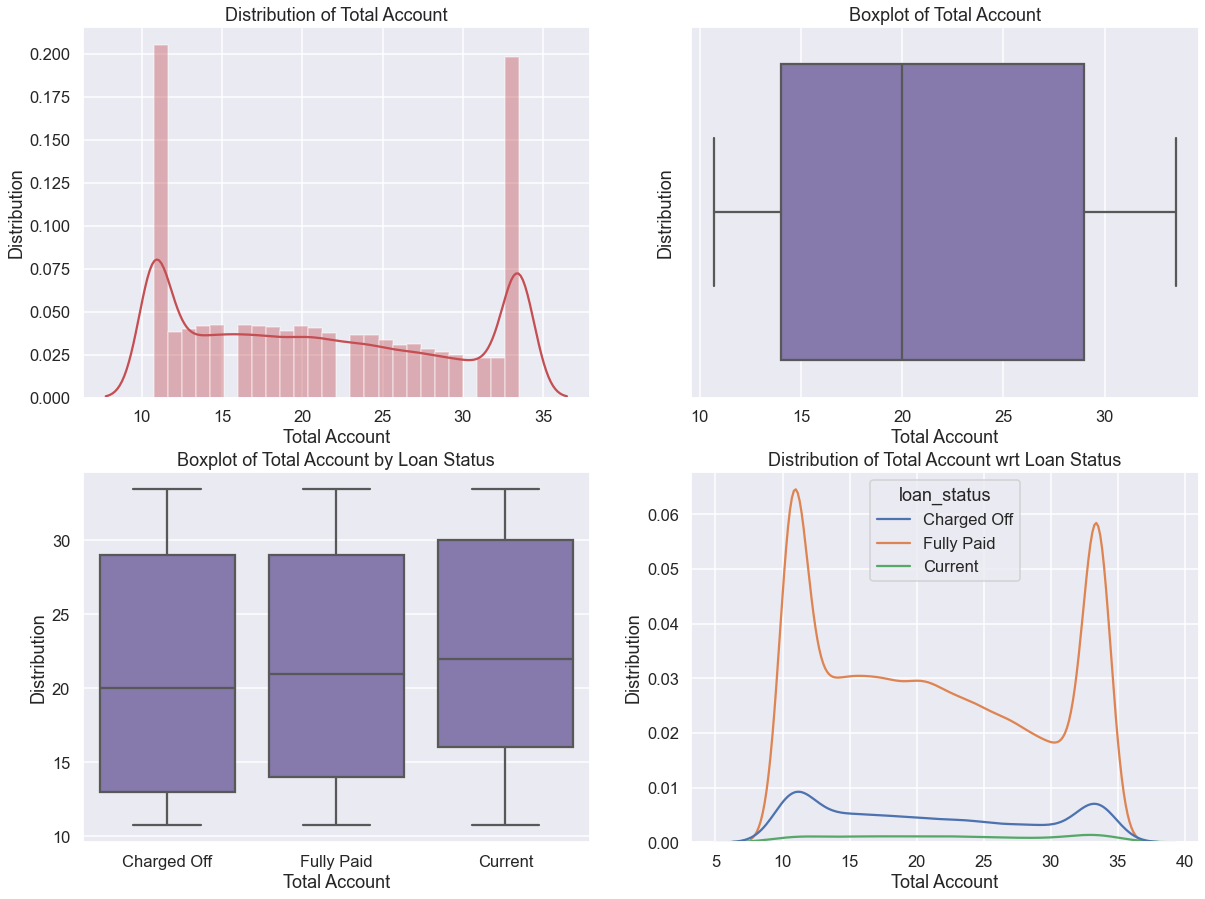

In [121]:
#Distribution of Total Account
print(ft_data['total_acc'].describe())
print('\n')
print("IQR of Total Account {0}".format(IQR(ft_data['total_acc'])))
print('\n')
print(ft_data.groupby('loan_status').agg({'total_acc':['describe',IQR,ninetynine_Perc,Range,'skew']}))

plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.title("Distribution of Total Account")
sns.distplot(ft_data['total_acc'],hist=True,kde=True,color='r')
plt.xlabel("Total Account")
plt.ylabel("Distribution")
plt.subplot(2,2,2)
plt.title("Boxplot of Total Account")
sns.boxplot(x='total_acc',data=ft_data,color='m')
plt.xlabel("Total Account")
plt.ylabel("Distribution")
plt.subplot(2,2,3)
plt.title("Boxplot of Total Account by Loan Status")
sns.boxplot(y='total_acc',x='loan_status',data=ft_data,color='m')
plt.xlabel("Total Account")
plt.ylabel("Distribution")
plt.subplot(2,2,4)
plt.title("Distribution of Total Account wrt Loan Status")
sns.kdeplot(ft_data['total_acc'],hue=ft_data['loan_status'])
plt.xlabel('Total Account')
plt.ylabel("Distribution")
plt.show()

Data is right skewed

Average total account is 20, variation is 15

Average of charged off and paid off  are almost similar , it can be because of randomness . Hence, can not say with surety about how total account affect loan status

There is not much large difference in variation also between the charged off category vs others .

count    38580.000000
mean        11.448152
std         68.187337
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        428.191008
Name: out_prncp, dtype: float64


IQR of Outstanding Principal 0.0


            out_prncp                                                        \
             describe                                                         
                count        mean        std    min         25%         50%   
loan_status                                                                   
Charged Off    5334.0    0.000000   0.000000   0.00    0.000000    0.000000   
Current        1099.0  401.883245  79.446008  10.26  428.191008  428.191008   
Fully Paid    32147.0    0.000000   0.000000   0.00    0.000000    0.000000   

                                                                           \
                                          IQR ninetynine_Perc       Range   
                    75%         max out_prncp  

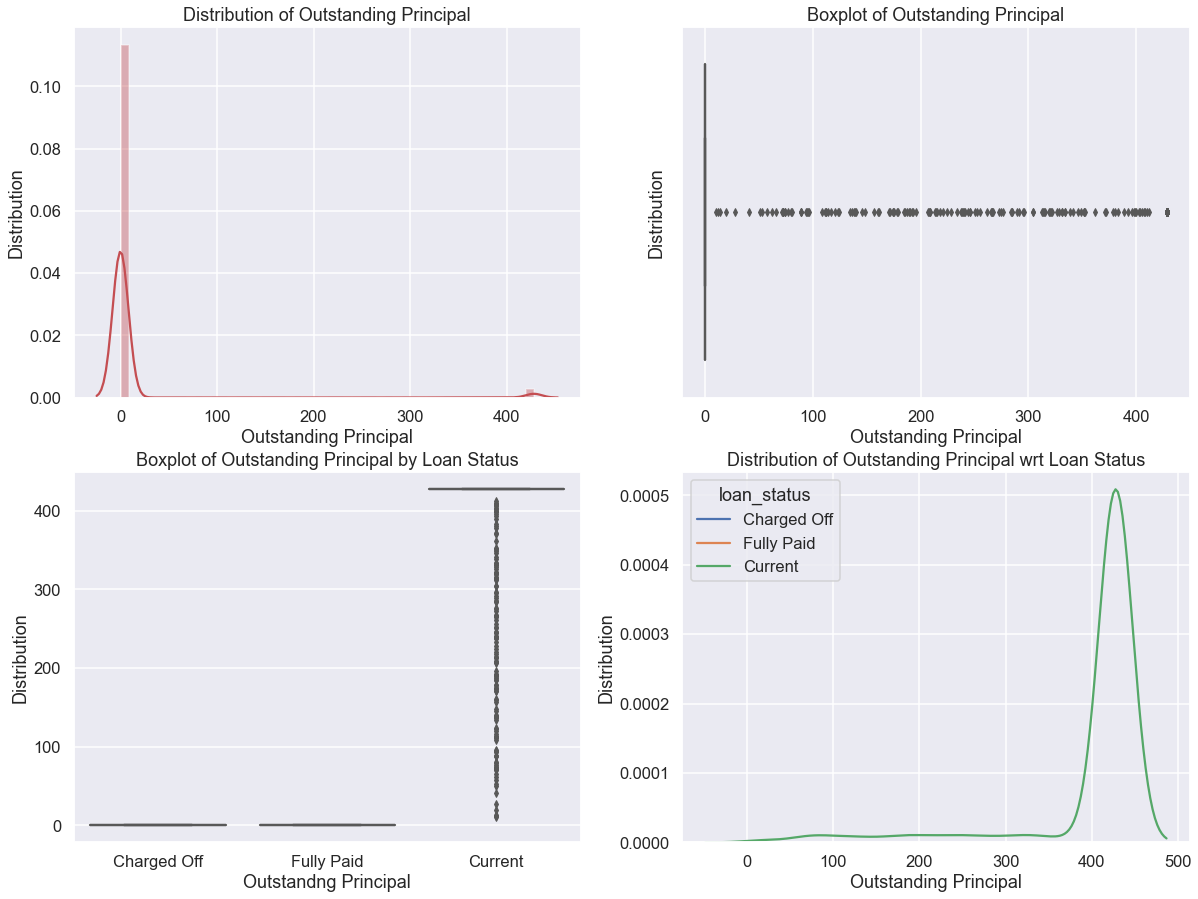

In [122]:
#Distribution of Outstaniding Principal
print(ft_data['out_prncp'].describe())
print('\n')
print("IQR of Outstanding Principal {0}".format(IQR(ft_data['out_prncp'])))
print('\n')
print(ft_data.groupby('loan_status').agg({'out_prncp':['describe',IQR,ninetynine_Perc,Range,'skew']}))

plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.title("Distribution of Outstanding Principal")
sns.distplot(ft_data['out_prncp'],hist=True,kde=True,color='r')
plt.xlabel("Outstanding Principal")
plt.ylabel("Distribution")
plt.subplot(2,2,2)
plt.title("Boxplot of Outstanding Principal")
sns.boxplot(x='out_prncp',data=ft_data,color='m')
plt.xlabel("Outstanding Principal")
plt.ylabel("Distribution")
plt.subplot(2,2,3)
plt.title("Boxplot of Outstanding Principal by Loan Status")
sns.boxplot(y='out_prncp',x='loan_status',data=ft_data,color='m')
plt.xlabel("Outstandng Principal")
plt.ylabel("Distribution")
plt.subplot(2,2,4)
plt.title("Distribution of Outstanding Principal wrt Loan Status")
sns.kdeplot(ft_data['out_prncp'],hue=ft_data['loan_status'])
plt.xlabel('Outstanding Principal')
plt.ylabel("Distribution")
plt.show()

The data is skewed

It backs up my earlier made inference that outstanding principal in data is for those borrowers who are current . There won't be any outstanding principal for fully paid or those who have got charged off.

count    38580.000000
mean       230.357559
std        864.375652
min          0.000000
25%          0.000000
50%          0.000000
75%          5.392117
max      14930.873656
Name: application_to_funded_diff, dtype: float64


IQR of Difference in Applied and Funded Amount 5.3921165890906195


            application_to_funded_diff                                         \
                              describe                                          
                                 count        mean         std  min  25%  50%   
loan_status                                                                     
Charged Off                     5334.0  272.774986  923.767775  0.0  0.0  0.0   
Current                         1099.0  339.701929  726.649328  0.0  0.0  0.0   
Fully Paid                     32147.0  219.581311  858.040879  0.0  0.0  0.0   

                                                                  \
                                                             IQR   
 

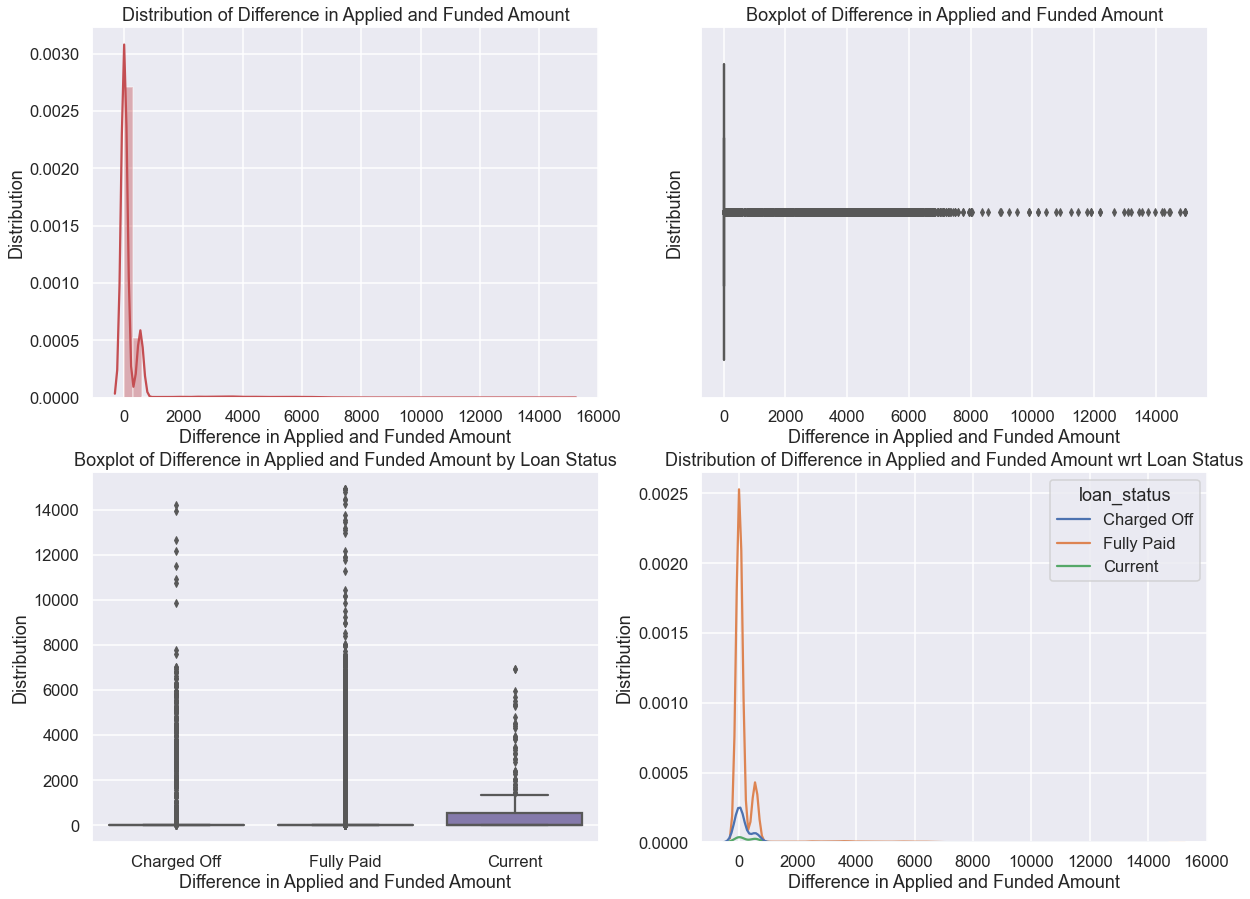

In [123]:
print(ft_data['application_to_funded_diff'].describe())
print('\n')
print("IQR of Difference in Applied and Funded Amount {0}".format(IQR(ft_data['application_to_funded_diff'])))
print('\n')
print(ft_data.groupby('loan_status').agg({'application_to_funded_diff':['describe',IQR,ninetynine_Perc,Range,'skew']}))

plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.title("Distribution of Difference in Applied and Funded Amount")
sns.distplot(ft_data['application_to_funded_diff'],hist=True,kde=True,color='r')
plt.xlabel("Difference in Applied and Funded Amount")
plt.ylabel("Distribution")
plt.subplot(2,2,2)
plt.title("Boxplot of Difference in Applied and Funded Amount")
sns.boxplot(x='application_to_funded_diff',data=ft_data,color='m')
plt.xlabel("Difference in Applied and Funded Amount")
plt.ylabel("Distribution")
plt.subplot(2,2,3)
plt.title("Boxplot of Difference in Applied and Funded Amount by Loan Status")
sns.boxplot(y='application_to_funded_diff',x='loan_status',data=ft_data,color='m')
plt.xlabel("Difference in Applied and Funded Amount")
plt.ylabel("Distribution")
plt.subplot(2,2,4)
plt.title("Distribution of Difference in Applied and Funded Amount wrt Loan Status")
sns.kdeplot(ft_data['application_to_funded_diff'],hue=ft_data['loan_status'])
plt.xlabel('Difference in Applied and Funded Amount')
plt.ylabel("Distribution")
plt.show()

We see that there is difference in amount significantly for current borrowers. But when we compare charged off and fully paid , we see there is huge variation in fully paid

count    38580.000000
mean     13139.030054
std       7683.247376
min       4233.721757
25%       6968.880000
50%      11490.120000
75%      18752.040000
max      32154.356521
Name: total_inst, dtype: float64


IQR of Difference in Total Installment 11783.159999999996


            total_inst                                                    \
              describe                                                     
                 count          mean          std          min       25%   
loan_status                                                                
Charged Off     5334.0  14896.637671  8664.645486  4233.721757   7157.88   
Current         1099.0  21978.583642  8620.542157  7056.202928  15651.00   
Fully Paid     32147.0  12545.203308  7232.963460  4233.721757   6705.54   

                                                                 \
                                                            IQR   
                  50%           75%           max    total_ins

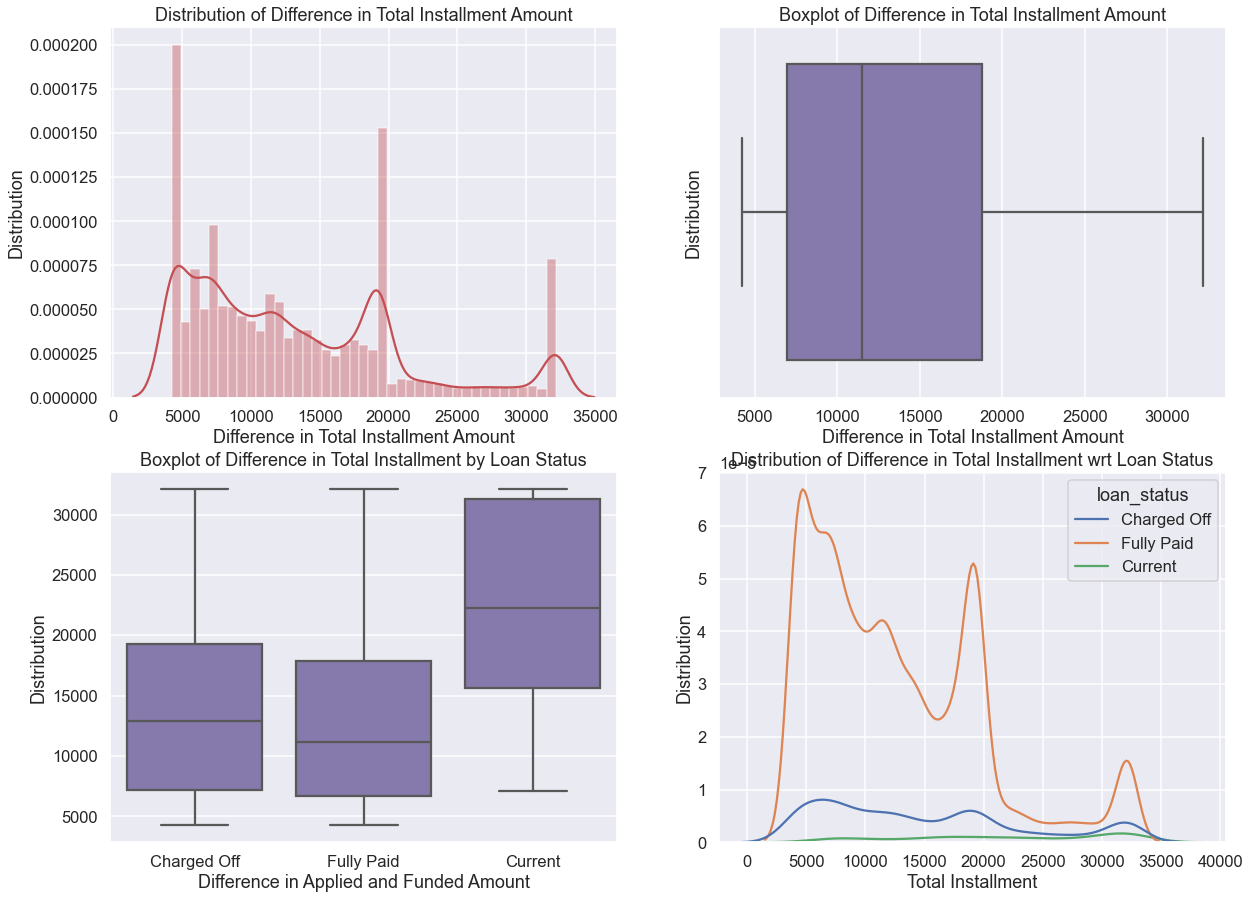

In [124]:
print(ft_data['total_inst'].describe())
print('\n')
print("IQR of Difference in Total Installment {0}".format(IQR(ft_data['total_inst'])))
print('\n')
print(ft_data.groupby('loan_status').agg({'total_inst':['describe',IQR,ninetynine_Perc,Range,'skew']}))

plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.title("Distribution of Difference in Total Installment Amount")
sns.distplot(ft_data['total_inst'],hist=True,kde=True,color='r')
plt.xlabel("Difference in Total Installment Amount")
plt.ylabel("Distribution")
plt.subplot(2,2,2)
plt.title("Boxplot of Difference in Total Installment Amount")
sns.boxplot(x='total_inst',data=ft_data,color='m')
plt.xlabel("Difference in Total Installment Amount")
plt.ylabel("Distribution")
plt.subplot(2,2,3)
plt.title("Boxplot of Difference in Total Installment by Loan Status")
sns.boxplot(y='total_inst',x='loan_status',data=ft_data,color='m')
plt.xlabel("Difference in Applied and Funded Amount")
plt.ylabel("Distribution")
plt.subplot(2,2,4)
plt.title("Distribution of Difference in Total Installment wrt Loan Status")
sns.kdeplot(ft_data['total_inst'],hue=ft_data['loan_status'])
plt.xlabel('Total Installment')
plt.ylabel("Distribution")
plt.show()

Ideally borrowers who belong to charged off class had to pay higher total amount as compared to others. Q3 and Q1 both are greater than fully paid , which means those who defaults are likely to pay higher loan amount inclusive of interest

count    38580.000000
mean      1946.278494
std       4214.051118
min      -2156.118260
25%          0.230000
50%        331.884524
75%       1507.332150
max      28968.215738
Name: balance, dtype: float64


IQR of Balance Amount 1507.102150000001


             balance                                                      \
            describe                                                       
               count         mean          std          min          25%   
loan_status                                                                
Charged Off   5334.0  7688.170743  6630.284829 -2007.246112  2549.649217   
Current       1099.0  4780.004184  4177.688218  -747.520000  1128.330000   
Fully Paid   32147.0   896.677667  2564.360846 -2156.118260     0.104557   

                                                                   \
                                                              IQR   
                     50%           75%           max      balance   
loan_statu

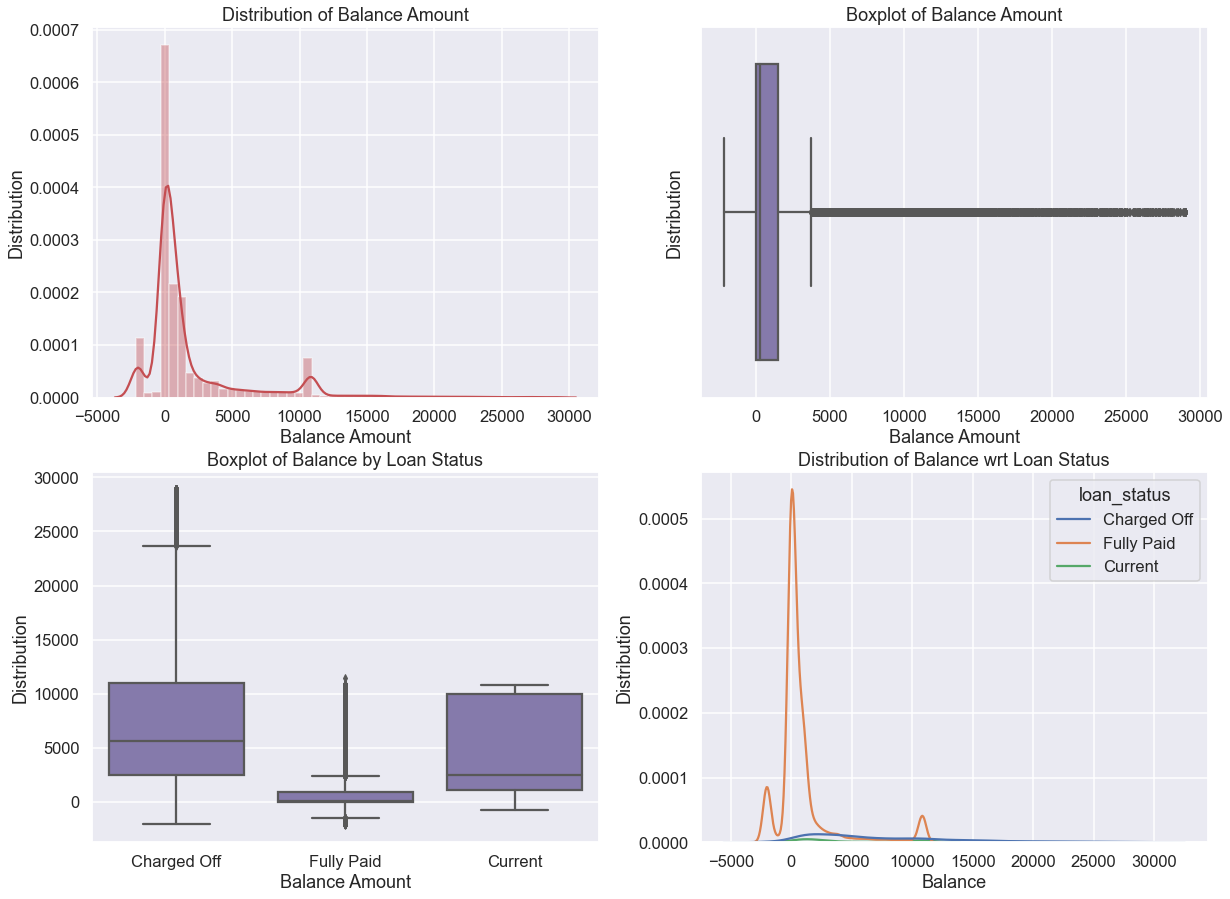

In [125]:
print(ft_data['balance'].describe())
print('\n')
print("IQR of Balance Amount {0}".format(IQR(ft_data['balance'])))
print('\n')
print(ft_data.groupby('loan_status').agg({'balance':['describe',IQR,ninetynine_Perc,Range,'skew']}))

plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.title("Distribution of Balance Amount")
sns.distplot(ft_data['balance'],hist=True,kde=True,color='r')
plt.xlabel("Balance Amount")
plt.ylabel("Distribution")
plt.subplot(2,2,2)
plt.title("Boxplot of Balance Amount")
sns.boxplot(x='balance',data=ft_data,color='m')
plt.xlabel("Balance Amount")
plt.ylabel("Distribution")
plt.subplot(2,2,3)
plt.title("Boxplot of Balance by Loan Status")
sns.boxplot(y='balance',x='loan_status',data=ft_data,color='m')
plt.xlabel("Balance Amount")
plt.ylabel("Distribution")
plt.subplot(2,2,4)
plt.title("Distribution of Balance wrt Loan Status")
sns.kdeplot(ft_data['balance'],hue=ft_data['loan_status'])
plt.xlabel('Balance')
plt.ylabel("Distribution")
plt.show()

We see that balance of charged off borrowers are greater which is obvious. But it is interesting to notice that balance of fully paid customers are also left but they are nominal. Probably the institution would have scrapped those minor balances

count    38580.000000
mean         6.435906
std          3.498744
min          1.050000
25%          3.860000
50%          5.670000
75%          8.340000
max         32.030000
Name: installment_to_income, dtype: float64


IQR of Installment to Income Ratio 4.48


            installment_to_income                                        \
                         describe                                         
                            count      mean       std   min   25%   50%   
loan_status                                                               
Charged Off                5334.0  7.174927  3.781000  1.05  4.39  6.45   
Current                    1099.0  6.844295  3.184388  1.05  4.55  6.37   
Fully Paid                32147.0  6.299322  3.443525  1.05  3.76  5.54   

                                                                       \
                                            IQR       ninetynine_Perc   
               75%    max installment_to_income installment_to_i

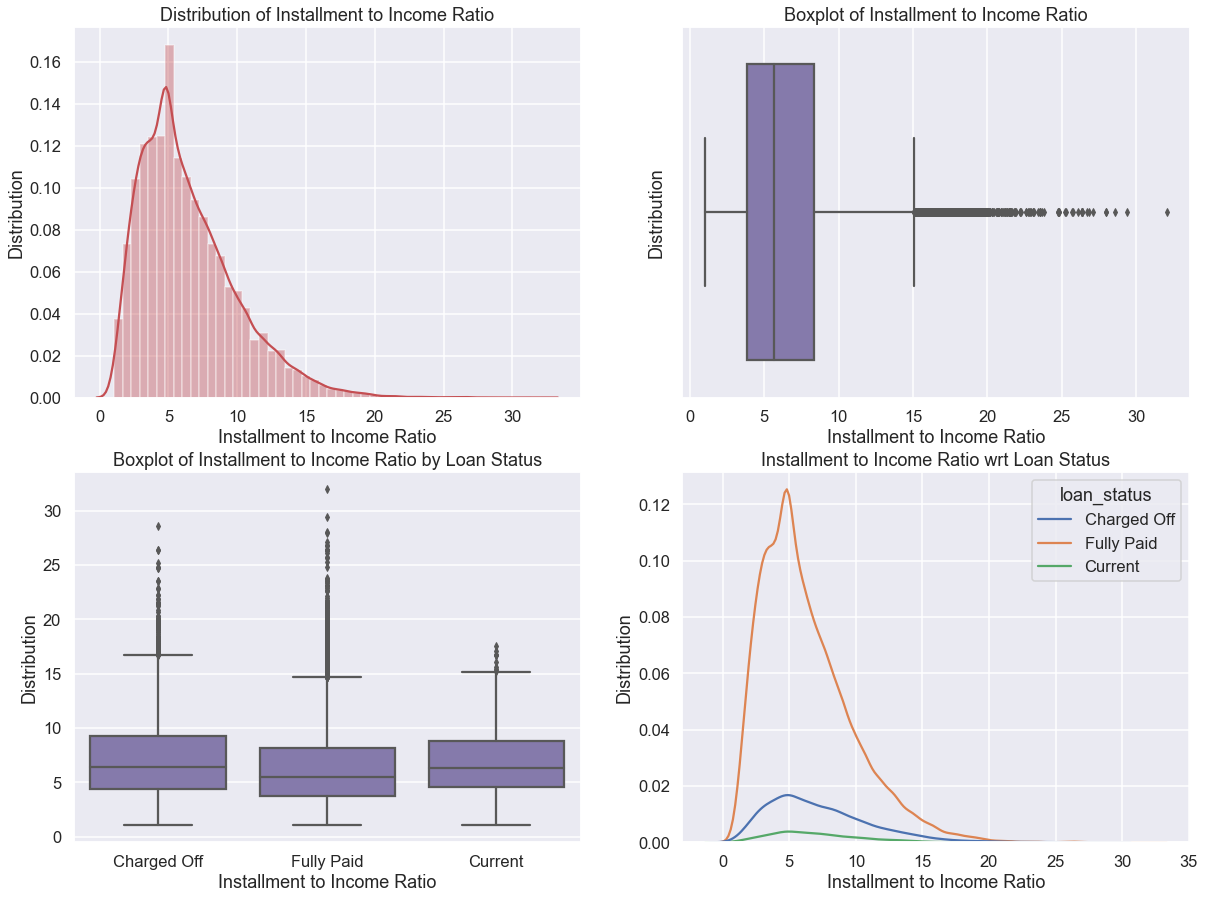

In [126]:
#Distribution of Installment to Income ratio
print(ft_data['installment_to_income'].describe())
print('\n')
print("IQR of Installment to Income Ratio {0}".format(IQR(ft_data['installment_to_income'])))
print('\n')
print(ft_data.groupby('loan_status').agg({'installment_to_income':['describe',IQR,ninetynine_Perc,Range,'skew']}))

plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.title("Distribution of Installment to Income Ratio")
sns.distplot(ft_data['installment_to_income'],hist=True,kde=True,color='r')
plt.xlabel("Installment to Income Ratio")
plt.ylabel("Distribution")
plt.subplot(2,2,2)
plt.title("Boxplot of Installment to Income Ratio")
sns.boxplot(x='installment_to_income',data=ft_data,color='m')
plt.xlabel("Installment to Income Ratio")
plt.ylabel("Distribution")
plt.subplot(2,2,3)
plt.title("Boxplot of Installment to Income Ratio by Loan Status")
sns.boxplot(y='installment_to_income',x='loan_status',data=ft_data,color='m')
plt.xlabel("Installment to Income Ratio")
plt.ylabel("Distribution")
plt.subplot(2,2,4)
plt.title("Installment to Income Ratio wrt Loan Status")
sns.kdeplot(ft_data['installment_to_income'],hue=ft_data['loan_status'])
plt.xlabel('Installment to Income Ratio')
plt.ylabel("Distribution")
plt.show()

Data is right skewed

Average Installment to Income Ratio is 5.8 with variation of 3.83

We can see in comparison to fully paid borrowers, borrowers who were charged off have higher installment to income ratio which means, out of total income, major expenditure is made on the paying the installment , i.e installment was the larger chunk of their income. Also they had higher variation, which states that installment to income ratio of such borrowers are more likely to vary. We see that the first quartile and the third quartile is greater than fully paid which means these borrowers have larger installment amount which consume major percentage of their income 

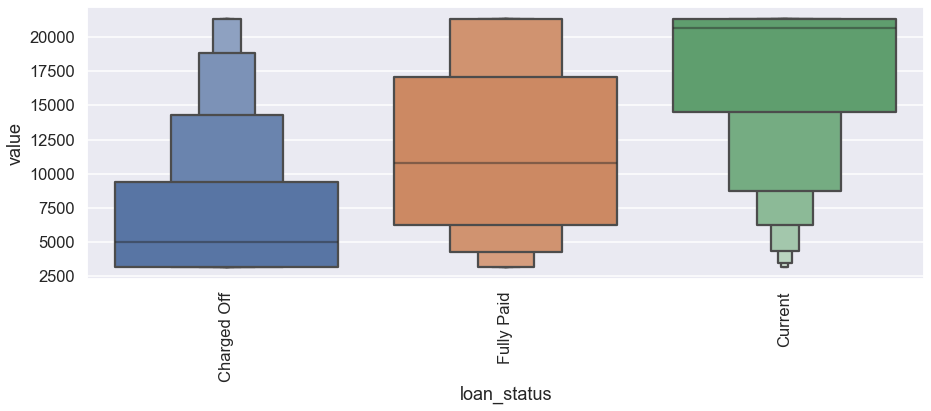

In [127]:
#Data Distribution - Total Payment 
#When we compare : Median total payment by applicants who have fully paid is higher than median total payment by the applicants which are being charged off
#Which supports that the applicants who belong to charged off have not made the complete payment. Minimum payment made by them and 25% of applicants have made the total payment of 3186 
#As we see from above these are the group of people who have applied for higher amount of loans but have not paid full payment
#If we notice the median of applicants who have fully paid is higher than the 75% of the total payment made by charged off applicants, 
#which is suggestive of : the distribution is different between the group, - Payment of fully paid customer will be on highers side significantly than the charged off customers
#The average payment made by the charged off customers is lesser than the payment made by the 25% of the customers who belong to fully paid group, which is
#Suggestive of that fully paid customers have availed loan significantly lesser than those who gets charged off
#This distribution will be similar to total payment inverse

plt.figure(figsize=(15,5))
sns.boxenplot(x="loan_status", y="value", data=pd.melt(ft_data,id_vars='loan_status',value_vars='total_pymnt'))
plt.xticks(rotation=90)
plt.show()


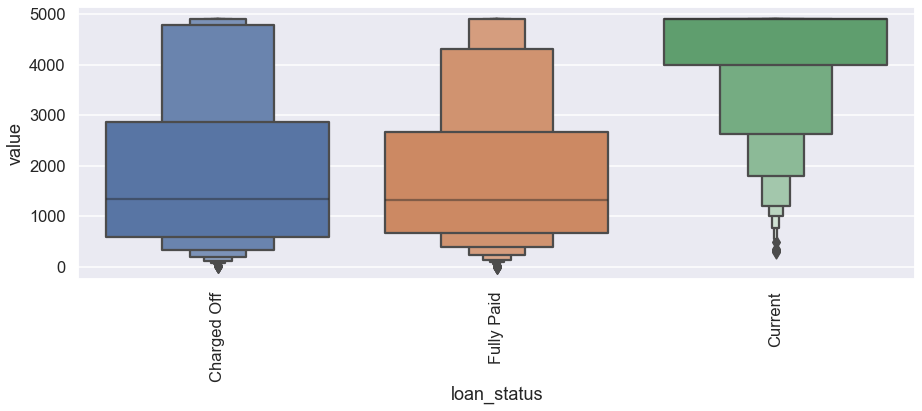

In [128]:
#Data Distribution - Total Received Interest 
#We can not see the significant difference in the distribution , it just tells that customer belonging to fully paid group tend to pay lesser interest , which is supported by fact that they take loan over lesser interest rate
plt.figure(figsize=(15,5))
sns.boxenplot(x="loan_status", y="value", data=pd.melt(ft_data,id_vars='loan_status',value_vars='total_rec_int'))
plt.xticks(rotation=90)
plt.show()


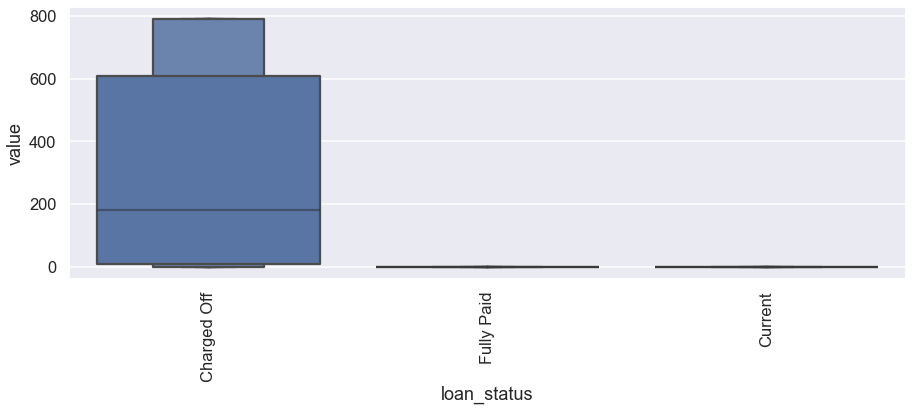

In [129]:
#Data Distribution - Recoveries 
#We can see the significant difference in the distribution , which states that recoveries are made of those who have been charged off
plt.figure(figsize=(15,5))
sns.boxenplot(x="loan_status", y="value", data=pd.melt(ft_data,id_vars='loan_status',value_vars='recoveries'))
plt.xticks(rotation=90)
plt.show()


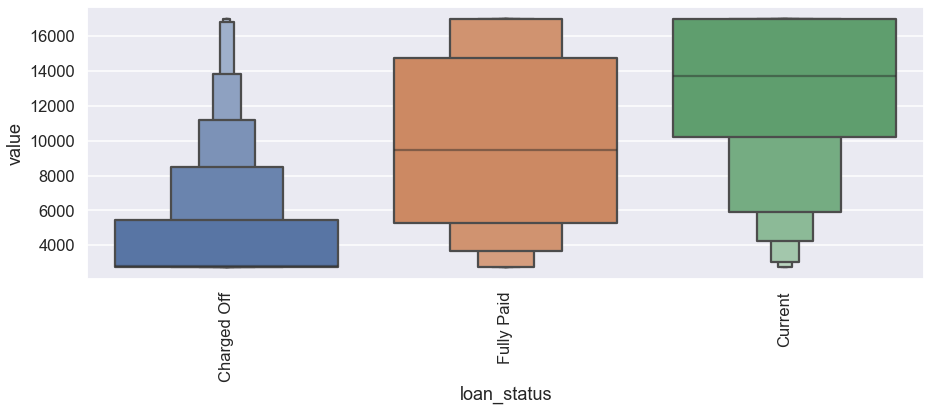

In [130]:
#Data Distribution - Total Principal Received 
#When we compare : Median total principal received by applicants who have fully paid is higher than median and 75% of the total principal received by the applicants which are being charged off
#Which is suggestive of the fact that the applicants who belong to charged off have not completely paid the principal amount of their loan. Minimum payment made by them and 25% of applicants have made the total payment of 2787 
#As we see from above these are the group of people who have applied for higher amount of loans but have not paid full payment, which means they have fall short on the principal amount , leaving the interest 
#If we notice the median of applicants who have fully paid is higher than the 75% of the total received principal by charged off applicants, 
#which is suggestive of : the distribution is different between the group, - principal paid by fully paid customer will be on highers side significantly than the charged off customers
#The average principal paid by the charged off customers is lesser than the principal paid by the 25% of the customers who belong to fully paid group, which is
#Suggestive of that fully paid customers have availed loan significantly lesser than those who gets charged off as they have paid principal amount 

plt.figure(figsize=(15,5))
sns.boxenplot(x="loan_status", y="value", data=pd.melt(ft_data,id_vars='loan_status',value_vars='total_rec_prncp'))
plt.xticks(rotation=90)
plt.show()


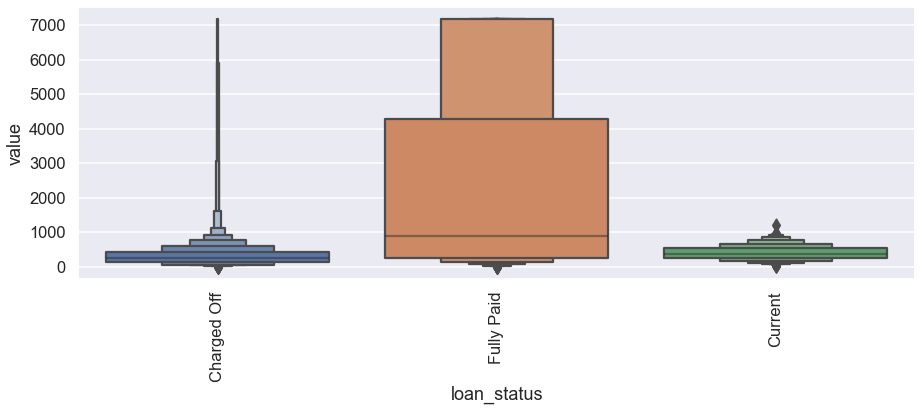

In [131]:
#Data Distribution - Last payment amount 
#When we compare : Median Last payment amount by applicants who have fully paid is higher than median and 75% of the Last Payment Amount by the applicants which are being charged off
#Which is suggestive of the fact that the applicants who belong to charged off pays very less amount in their last payment. 
#The variation in the last payment paid by those who belongs to charged off group is very less , they are very concentrated
#We can say those who pays more than 258 are less likely to default and above 411 probability of defaulting gets very very less.
plt.figure(figsize=(15,5))
sns.boxenplot(x="loan_status", y="value", data=pd.melt(ft_data,id_vars='loan_status',value_vars='last_pymnt_amnt'))
plt.xticks(rotation=90)
plt.show()


loan_status     Charged Off  Current  Fully Paid  Total  Charged Off Rate
home_ownership                                                           
OTHER                    18        0          80     98           18.3673
RENT                   2686      410       15344  18440           14.5662
OWN                     398       72        2370   2840           14.0141
MORTGAGE               2232      617       14350  17199           12.9775
NONE                      0        0           3      3            0.0000


loan_status  Charged Off     Current    Fully Paid        Total  \
count            5.00000    5.000000      5.000000      5.00000   
mean          1066.80000  219.800000   6429.400000   7716.00000   
std           1290.81726  279.469497   7750.777755   9303.64356   
min              0.00000    0.000000      3.000000      3.00000   
25%             18.00000    0.000000     80.000000     98.00000   
50%            398.00000   72.000000   2370.000000   2840.00000   
75%        

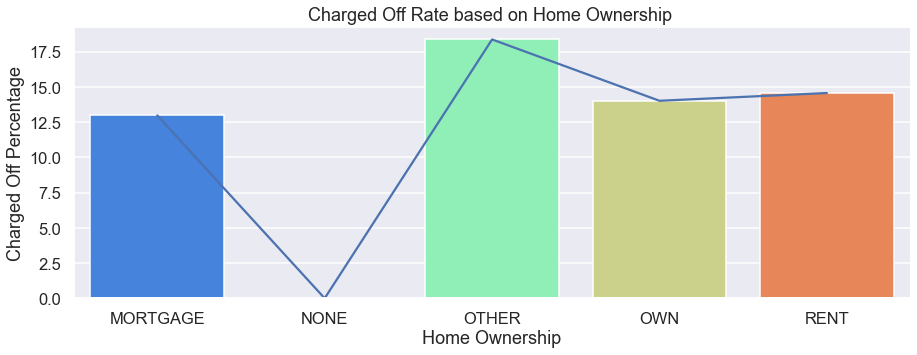

In [132]:
#Home ownership against charged off borrowers - Those who had charged off had maximum of Other category of Home Ownership
df = ft_data.pivot_table(values = 'funded_amnt',
                      index = 'home_ownership',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')
df['Charged Off Rate'] = 100*(round((df['Charged Off']/df['Total']), 6))
print(df.iloc[0:-1].sort_values(by = 'Charged Off Rate', ascending = False))
print('\n')
print(df.iloc[0:-1].describe())
print('\n')
X_data=df.iloc[0:-1].index
y_data=df.iloc[0:-1]['Charged Off Rate']
plt.figure(figsize=(15,5))
plt.title('Charged Off Rate based on Home Ownership ')
sns.lineplot(data=y_data,estimator=np.median,palette='maroon')
sns.barplot(x=X_data,y=y_data,estimator=np.median,palette='rainbow')
plt.xlabel("Home Ownership")
plt.ylabel("Charged Off Percentage")
plt.show()

loan_status         Charged Off  Current  Fully Paid  Total  Charged Off Rate
purpose                                                                      
small_business              454       73        1247   1774           25.5919
renewable_energy             17        1          76     94           18.0851
educational                  50        0         263    313           15.9744
house                        57       14         295    366           15.5738
other                       588      120        3118   3826           15.3685
moving                       84        7         468    559           15.0268
medical                     100       12         555    667           14.9925
debt_consolidation         2652      568       14997  18217           14.5578
vacation                     50        4         298    352           14.2045
home_improvement            327       94        2456   2877           11.3660
car                         155       49        1294   1498     

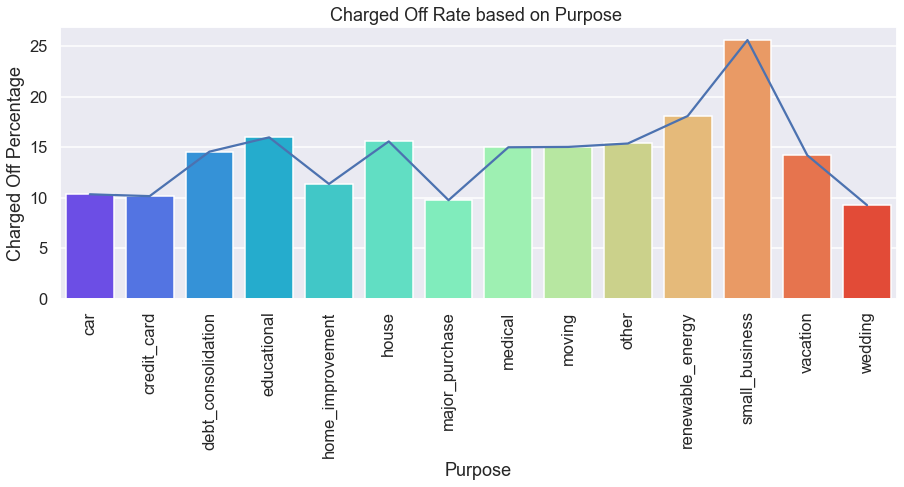

In [133]:
#Purpose against charged off borrowers
df = ft_data.pivot_table(values = 'funded_amnt',
                      index = 'purpose',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')
df['Charged Off Rate'] = 100*(round((df['Charged Off']/df['Total']), 6))
print(df.iloc[0:-1].sort_values(by = 'Charged Off Rate', ascending = False))
print('\n')
print(df.iloc[0:-1].describe())
print('\n')
X_data=df.iloc[0:-1].index
y_data=df.iloc[0:-1]['Charged Off Rate']
plt.figure(figsize=(15,5))
plt.title('Charged Off Rate based on Purpose ')
sns.lineplot(data=y_data,estimator=np.median,palette='maroon')
sns.barplot(x=X_data,y=y_data,estimator=np.median,palette='rainbow')
plt.xlabel("Purpose")
plt.ylabel("Charged Off Percentage")
plt.xticks(rotation=90)
plt.show()

Top 3 purpose from which we have seen major charged off :

Small Busines - 25.9%

Renewable Energy - 18.9%

Educational - 16.5%

loan_status  Charged Off  Current  Fully Paid  Total  Charged Off Rate
addr_state                                                            
NE                     3        0           2      5           60.0000
NV                   101       18         363    482           20.9544
AK                    15        2          61     78           19.2308
SD                    11        2          50     63           17.4603
FL                   479       82        2212   2773           17.2737
ID                     1        0           5      6           16.6667
HI                    28        8         134    170           16.4706
NM                    29        4         150    183           15.8470
MO                   104       15         540    659           15.7815
OR                    68       16         352    436           15.5963
UT                    39        5         208    252           15.4762
CA                  1057      143        5693   6893           15.3344
GA    

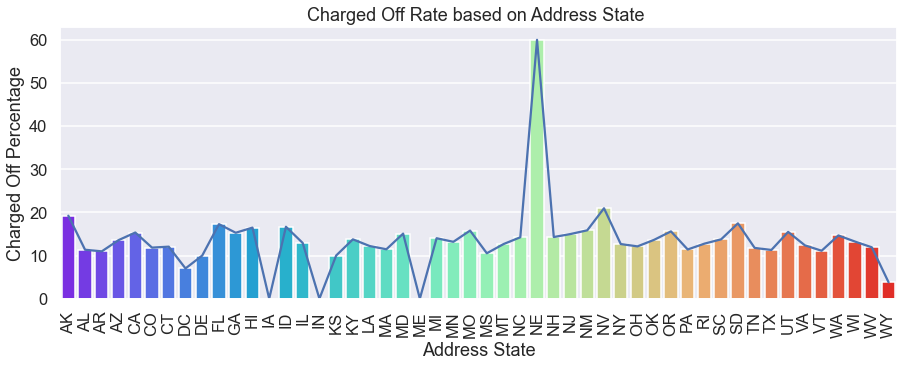

In [134]:
#Address State against charged off borrowers - Top charged off comes from Nebraska , atleast 60% 
df = ft_data.pivot_table(values = 'funded_amnt',
                      index = 'addr_state',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')
df['Charged Off Rate'] = 100*(round((df['Charged Off']/df['Total']), 6))
print(df.iloc[0:-1].sort_values(by = 'Charged Off Rate', ascending = False))
print('\n')
print(df.iloc[0:-1].describe())
print('\n')
X_data=df.iloc[0:-1].index
y_data=df.iloc[0:-1]['Charged Off Rate']
plt.figure(figsize=(15,5))
plt.title('Charged Off Rate based on Address State ')
sns.lineplot(data=y_data,estimator=np.median,palette='maroon')
sns.barplot(x=X_data,y=y_data,estimator=np.median,palette='rainbow')
plt.xlabel("Address State")
plt.ylabel("Charged Off Percentage")
plt.xticks(rotation=90)
plt.show()

loan_status  Charged Off  Current  Fully Paid  Total  Charged Off Rate
delinq_2yrs                                                           
8                      1        0           1      2           50.0000
7                      1        0           3      4           25.0000
4                     12        2          46     60           20.0000
2                    122       14         529    665           18.3459
1                    483       93        2646   3222           14.9907
5                      3        0          18     21           14.2857
3                     30        8         175    213           14.0845
0                   4681      982       28718  34381           13.6151
6                      1        0           9     10           10.0000
9                      0        0           1      1            0.0000
11                     0        0           1      1            0.0000


loan_status  Charged Off     Current    Fully Paid         Total  \
count  

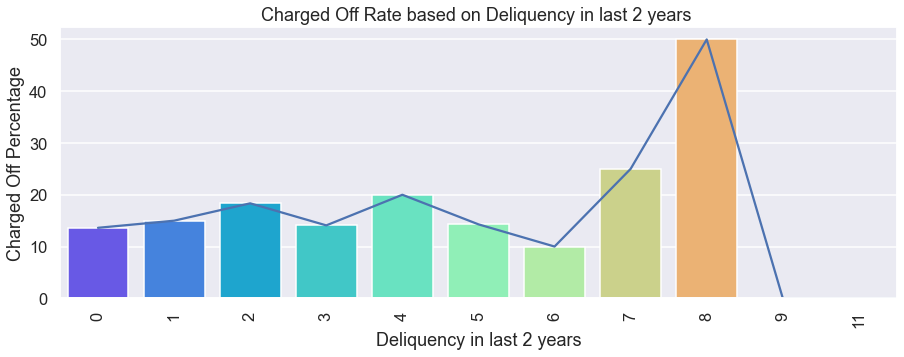

In [135]:
#Deliquency in last 2 years against charged off borrowers - Those who had 7-8 deliquecy in last two years are more likely to default
df = ft_data.pivot_table(values = 'funded_amnt',
                      index = 'delinq_2yrs',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')
df['Charged Off Rate'] = 100*(round((df['Charged Off']/df['Total']), 6))
print(df.iloc[0:-1].sort_values(by = 'Charged Off Rate', ascending = False))
print('\n')
print(df.iloc[0:-1].describe())
print('\n')
X_data=df.iloc[0:-1].index
y_data=df.iloc[0:-1]['Charged Off Rate']
plt.figure(figsize=(15,5))
plt.title('Charged Off Rate based on Deliquency in last 2 years ')
sns.lineplot(data=y_data,estimator=np.median,palette='maroon')
sns.barplot(x=X_data,y=y_data,estimator=np.median,palette='rainbow')
plt.xlabel("Deliquency in last 2 years")
plt.ylabel("Charged Off Percentage")
plt.xticks(rotation=90)
plt.show()

loan_status     Charged Off  Current  Fully Paid  Total  Charged Off Rate
inq_last_6mths                                                           
7                         9        1          23     33           27.2727
6                        15        1          45     61           24.5902
8                         3        1          11     15           20.0000
3                       582       62        2316   2960           19.6622
5                        27        2         115    144           18.7500
2                       893      158        4602   5653           15.7969
1                      1607      298        8764  10669           15.0623
4                        43       10         257    310           13.8710
0                      2155      566       16014  18735           11.5025


loan_status  Charged Off     Current    Fully Paid         Total  \
count           9.000000    9.000000      9.000000      9.000000   
mean          592.666667  122.111111   3571.8888

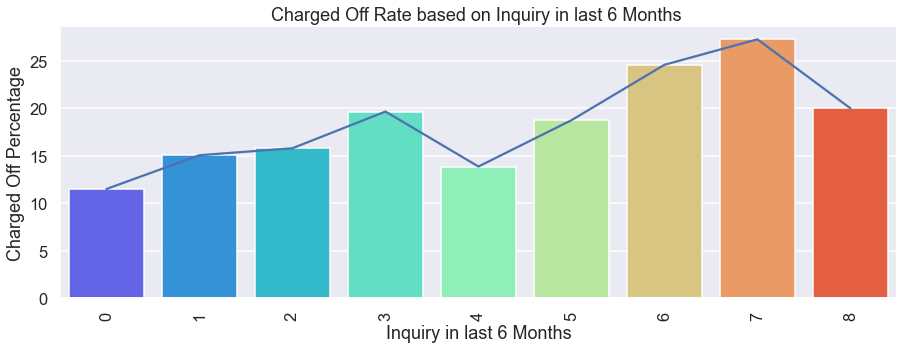

In [136]:
#Inquiry in Last 6 months against charged off borrowers - Those who had around 6 to 7 inquiries in last 6 months are more likely to default
df = ft_data.pivot_table(values = 'funded_amnt',
                      index = 'inq_last_6mths',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')
df['Charged Off Rate'] = 100*(round((df['Charged Off']/df['Total']), 6))
print(df.iloc[0:-1].sort_values(by = 'Charged Off Rate', ascending = False))
print('\n')
print(df.iloc[0:-1].describe())
print('\n')
X_data=df.iloc[0:-1].index
y_data=df.iloc[0:-1]['Charged Off Rate']
plt.figure(figsize=(15,5))
plt.title('Charged Off Rate based on Inquiry in last 6 Months ')
sns.lineplot(data=y_data,estimator=np.median,palette='maroon')
sns.barplot(x=X_data,y=y_data,estimator=np.median,palette='rainbow')
plt.xlabel("Inquiry in last 6 Months")
plt.ylabel("Charged Off Percentage")
plt.xticks(rotation=90)
plt.show()

loan_status  Charged Off  Current  Fully Paid  Total  Charged Off Rate
grade                                                                 
G                     98       17         198    313           31.3099
F                    311       71         646   1028           30.2529
E                    691      175        1920   2786           24.8026
D                   1073      216        3893   5182           20.7063
C                   1266      257        6381   7904           16.0172
B                   1343      328       10005  11676           11.5022
A                    552       35        9104   9691            5.6960


loan_status  Charged Off     Current    Fully Paid         Total  \
count           7.000000    7.000000      7.000000      7.000000   
mean          762.000000  157.000000   4592.428571   5511.428571   
std           479.884708  118.971985   3986.760793   4394.246839   
min            98.000000   17.000000    198.000000    313.000000   
25%           431.5

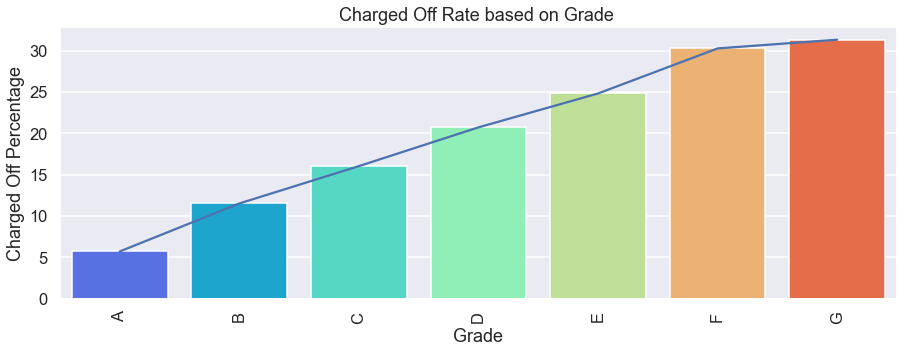

In [137]:
#Grade against charged off borrowers - As the grade increases the chances of charged off also increases
df =ft_data.pivot_table(values = 'funded_amnt',
                      index = 'grade',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')
df['Charged Off Rate'] = 100*(round((df['Charged Off']/df['Total']), 6))
print(df.iloc[0:-1].sort_values(by = 'Charged Off Rate', ascending = False))
print('\n')
print(df.iloc[0:-1].describe())
print('\n')
X_data=df.iloc[0:-1].index
y_data=df.iloc[0:-1]['Charged Off Rate']
plt.figure(figsize=(15,5))
plt.title('Charged Off Rate based on Grade ')
sns.lineplot(data=y_data,estimator=np.median,palette='maroon')
sns.barplot(x=X_data,y=y_data,estimator=np.median,palette='rainbow')
plt.xlabel("Grade")
plt.ylabel("Charged Off Percentage")
plt.xticks(rotation=90)
plt.show()

loan_status  Charged Off  Current  Fully Paid  Total  Charged Off Rate
sub_grade                                                             
F5                    53        5          57    115           46.0870
G3                    19        3          26     48           39.5833
G2                    28        1          49     78           35.8974
G5                    10        1          19     30           33.3333
F4                    52       16          95    163           31.9018
G1                    28       10          63    101           27.7228
F2                    67       16         160    243           27.5720
F3                    50       10         122    182           27.4725
E4                   123       30         295    448           27.4554
F1                    89       24         212    325           27.3846
E5                   106       29         275    410           25.8537
E1                   193       39         518    750           25.7333
E2    

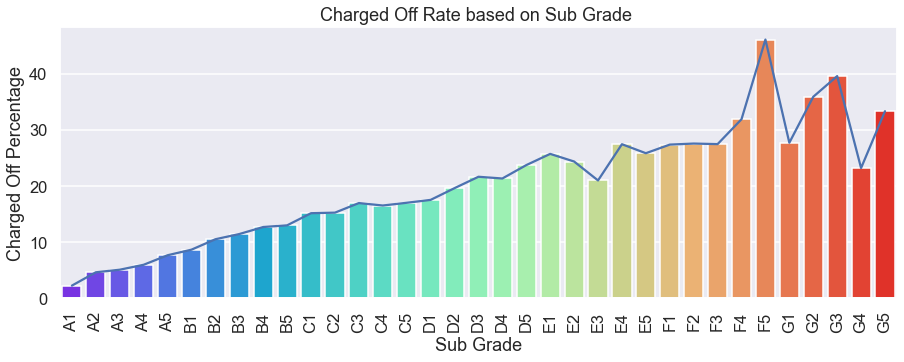

In [138]:
#Sub Grade against charged off borrowers - Major defaulters sub grades are : F5,G3,G5
df = ft_data.pivot_table(values = 'funded_amnt',
                      index = 'sub_grade',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')
df['Charged Off Rate'] = 100*(round((df['Charged Off']/df['Total']), 6))
print(df.iloc[0:-1].sort_values(by = 'Charged Off Rate', ascending = False))
print('\n')
print(df.iloc[0:-1].describe())
print('\n')
X_data=df.iloc[0:-1].index
y_data=df.iloc[0:-1]['Charged Off Rate']
plt.figure(figsize=(15,5))
plt.title('Charged Off Rate based on Sub Grade ')
sns.lineplot(data=y_data,estimator=np.median,palette='maroon')
sns.barplot(x=X_data,y=y_data,estimator=np.median,palette='rainbow')
plt.xlabel("Sub Grade")
plt.ylabel("Charged Off Percentage")
plt.xticks(rotation=90)
plt.show()

loan_status           Charged Off  Current  Fully Paid  Total  \
funded_amt_range                                                
(15000.0, 18210.588]         1499      558        6521   8578   
(3823.519, 5500.0]           1275      101        8413   9789   
(9962.5, 15000.0]            1386      321        9005  10712   
(5500.0, 9962.5]             1174      119        8208   9501   

loan_status           Charged Off Rate  
funded_amt_range                        
(15000.0, 18210.588]           17.4749  
(3823.519, 5500.0]             13.0248  
(9962.5, 15000.0]              12.9388  
(5500.0, 9962.5]               12.3566  


loan_status  Charged Off     Current   Fully Paid         Total  \
count           4.000000    4.000000     4.000000      4.000000   
mean         1333.500000  274.750000  8036.750000   9645.000000   
std           140.248589  213.554638  1065.504067    879.099918   
min          1174.000000  101.000000  6521.000000   8578.000000   
25%          1249.750000  

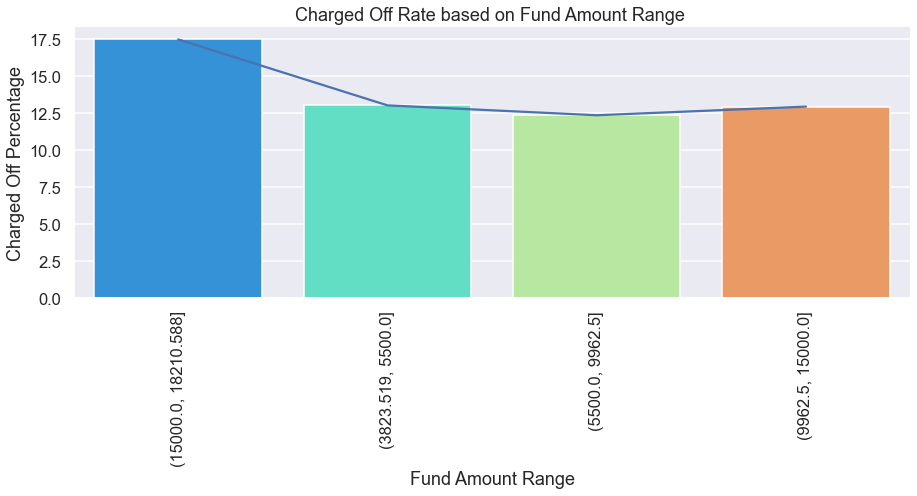

In [139]:
#Home ownership against charged off borrowers - Those who have received fund in range of 15000 to 18000+ have majorly defaulted
df = ft_data.pivot_table(values = 'funded_amnt',
                      index = 'funded_amt_range',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')
df['Charged Off Rate'] = 100*(round((df['Charged Off']/df['Total']), 6))
print(df.iloc[0:-1].sort_values(by = 'Charged Off Rate', ascending = False))
print('\n')
print(df.iloc[0:-1].describe())
print('\n')
X_data=df.iloc[0:-1].index
y_data=df.iloc[0:-1]['Charged Off Rate']
plt.figure(figsize=(15,5))
plt.title('Charged Off Rate based on Fund Amount Range ')
sns.lineplot(data=y_data,estimator=np.median,palette='maroon')
sns.barplot(x=X_data,y=y_data,estimator=np.median,palette='rainbow')
plt.xlabel("Fund Amount Range")
plt.ylabel("Charged Off Percentage")
plt.xticks(rotation=90)
plt.show()

loan_status      Charged Off  Current  Fully Paid  Total  Charged Off Rate
int_rate_range                                                            
(19.08, 22.495]          445      170         801   1416           31.4266
(15.665, 19.08]         1217      322        3646   5185           23.4716
(12.25, 15.665]         1815      320        9038  11173           16.2445
(8.835, 12.25]          1398      263       10525  12186           11.4722
(5.403, 8.835]           459       24        8137   8620            5.3248


loan_status  Charged Off    Current    Fully Paid         Total  \
count           5.000000    5.00000      5.000000      5.000000   
mean         1066.800000  219.80000   6429.400000   7716.000000   
std           601.687793  125.66702   4059.582281   4439.733269   
min           445.000000   24.00000    801.000000   1416.000000   
25%           459.000000  170.00000   3646.000000   5185.000000   
50%          1217.000000  263.00000   8137.000000   8620.000000   
75% 

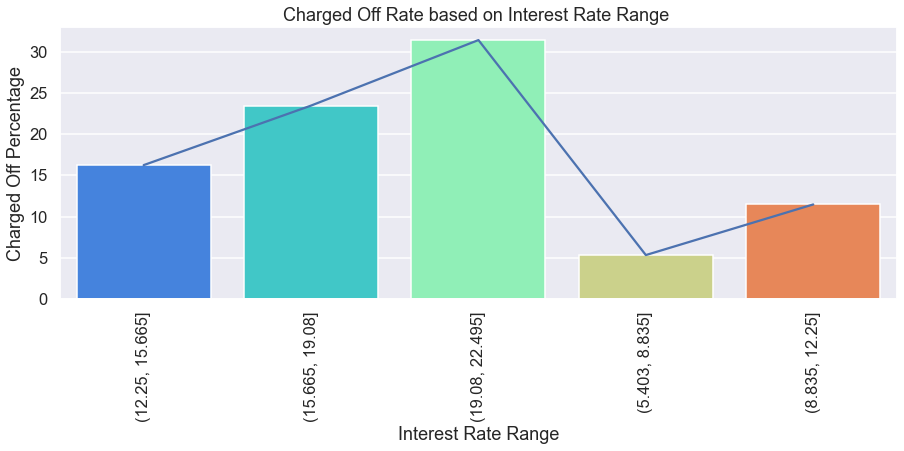

In [140]:
#Interest rate range against charged off borrowers

#As the interest rate increases probability of getting charged off also increases
df = ft_data.pivot_table(values = 'funded_amnt',
                      index = 'int_rate_range',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')
df['Charged Off Rate'] = 100*(round((df['Charged Off']/df['Total']), 6))
print(df.iloc[0:-1].sort_values(by = 'Charged Off Rate', ascending = False))
print('\n')
print(df.iloc[0:-1].describe())
print('\n')
X_data=df.iloc[0:-1].index
y_data=df.iloc[0:-1]['Charged Off Rate']
plt.figure(figsize=(15,5))
plt.title('Charged Off Rate based on Interest Rate Range ')
sns.lineplot(data=y_data,estimator=np.median,palette='maroon')
sns.barplot(x=X_data,y=y_data,estimator=np.median,palette='rainbow')
plt.xlabel("Interest Rate Range")
plt.ylabel("Charged Off Percentage")
plt.xticks(rotation=90)
plt.show()

loan_status               Charged Off  Current  Fully Paid  Total  \
annual_inc_range                                                    
(5224.282, 31052.901]             772       67        3591   4430   
(31052.901, 56753.019]           2087      360       11296  13743   
(56753.019, 82453.137]           1424      320        8849  10593   
(82453.137, 108153.254]           546      181        4326   5053   
(108153.254, 133853.372]          505      171        4085   4761   

loan_status               Charged Off Rate  
annual_inc_range                            
(5224.282, 31052.901]              17.4266  
(31052.901, 56753.019]             15.1859  
(56753.019, 82453.137]             13.4428  
(82453.137, 108153.254]            10.8055  
(108153.254, 133853.372]           10.6070  


loan_status  Charged Off    Current    Fully Paid         Total  \
count           5.000000    5.00000      5.000000      5.000000   
mean         1066.800000  219.80000   6429.400000   7716.000000  

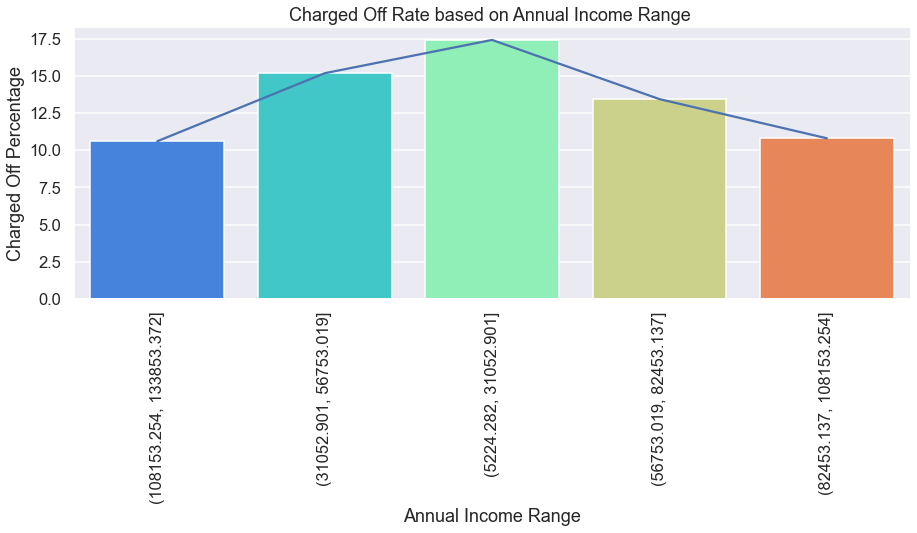

In [141]:
#Annual Income Range against charged off borrowers - Those whose annual income fall in the range of 33914 to 46467 are more likely to get charged of


df = ft_data.pivot_table(values = 'funded_amnt',
                      index = 'annual_inc_range',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')
df['Charged Off Rate'] = 100*(round((df['Charged Off']/df['Total']), 6))
print(df.iloc[0:-1].sort_values(by = 'Charged Off Rate', ascending = False))
print('\n')
print(df.iloc[0:-1].describe())
print('\n')
X_data=df.iloc[0:-1].index
y_data=df.iloc[0:-1]['Charged Off Rate']
plt.figure(figsize=(15,5))
plt.title('Charged Off Rate based on Annual Income Range ')
sns.lineplot(data=y_data,estimator=np.median,palette='maroon')
sns.barplot(x=X_data,y=y_data,estimator=np.median,palette='rainbow')
plt.xlabel("Annual Income Range")
plt.ylabel("Charged Off Percentage")
plt.xticks(rotation=90)
plt.show()

In [142]:
ft_data.drop(['desc_isMissing','emp_title_isMissing','emp_length_isMissing'],axis=1,inplace=True)

In [143]:
ft_data.drop(['id','member_id'],axis=1,inplace=True)

In [144]:
#Correlation
charged_off_df = ft_data[ft_data.loan_status == 'Charged Off'].corr().drop(labels = {'out_prncp', 'out_prncp_inv'})

charged_off_df.dropna(axis = 1, how = 'all', inplace = True)

charged_off_df

loan_amnt  funded_amnt  funded_amnt_inv  int_rate  \
loan_amnt                    1.000000     0.986294         0.900828  0.323463   
funded_amnt                  0.986294     1.000000         0.916672  0.331674   
funded_amnt_inv              0.900828     0.916672         1.000000  0.349819   
int_rate                     0.323463     0.331674         0.349819  1.000000   
installment                  0.938905     0.957722         0.855606  0.313352   
emp_length                   0.187575     0.192550         0.197442  0.043458   
annual_inc                   0.426609     0.420522         0.378035  0.165732   
issue_d                      0.095350     0.116103         0.319257  0.193566   
dti                          0.083850     0.081027         0.094280  0.045707   
delinq_2yrs                 -0.033983    -0.031681        -0.035995  0.122236   
inq_last_6mths              -0.000501    -0.001460        -0.027952  0.056275   
open_acc                     0.200971     0.195539         0.173177  0.011813   
pub_rec                     -0.027121    -0.030607        -0.033735  0.079827   
revol_bal                    0.382871     0.371636         0.329392  0.114217   
revol_util                   0.053342     0.057685         0.077326  0.375118   
total_acc                    0.285576     0.275573         0.259183 -0.021188   
total_pymnt                  0.646888     0.656833         0.631758  0.257876   
total_pymnt_inv              0.612280     0.623807         0.681416  0.269497   
total_rec_prncp              0.506760     0.516658         0.486258  0.069251   
total_rec_int                0.727490     0.737073         0.724800  0.489460   
total_rec_late_fee          -0.046905    -0.046562        -0.058529  0.018063   
recoveries                   0.384891     0.392358         0.392628  0.271460   
collection_recovery_fee      0.186919     0.190071         0.184469  0.133507   
last_pymnt_amnt              0.368248     0.373641         0.322200  0.114487   
pub_rec_bankruptcies        -0.004281    -0.007611        -0.005092  0.078862   
last_credit_pull_yr          0.110642     0.103990         0.122322 -0.011476   
last_pymnt_yr                0.124352     0.137523         0.299394  0.160283   
application_to_funded_diff   0.317606     0.156797         0.124096  0.030069   
total_inst                   0.927310     0.938125         0.893246  0.471571   
balance                      0.703146     0.709459         0.670528  0.413478   
installment_to_income        0.399317     0.421763         0.371515  0.092995   
LC_pull_to_pymnt_Tenure      0.015063     0.000375        -0.091426 -0.117162   
LC_pull_to_issue_Tenure      0.062401     0.046935        -0.025585 -0.096452   
last_pymnt_to_issue_Tenure   0.088377     0.088751         0.137128  0.054310   

                            installment  emp_length  annual_inc   issue_d  \
loan_amnt                      0.938905    0.187575    0.426609  0.095350   
funded_amnt                    0.957722    0.192550    0.420522  0.116103   
funded_amnt_inv                0.855606    0.197442    0.378035  0.319257   
int_rate                       0.313352    0.043458    0.165732  0.193566   
installment                    1.000000    0.166436    0.427429  0.038758   
emp_length                     0.166436    1.000000    0.192276  0.116244   
annual_inc                     0.427429    0.192276    1.000000  0.004744   
issue_d                        0.038758    0.116244    0.004744  1.000000   
dti                            0.065158    0.056762   -0.064165  0.095675   
delinq_2yrs                   -0.017692    0.014125    0.037978  0.015298   
inq_last_6mths                 0.006749    0.010175    0.063561 -0.088698   
open_acc                       0.187308    0.102732    0.297851  0.012132   
pub_rec                       -0.028169    0.063544    0.015162 -0.022163   
revol_bal                      0.368015    0.175588    0.464280 -0.011154   
revol_util                     0.0803

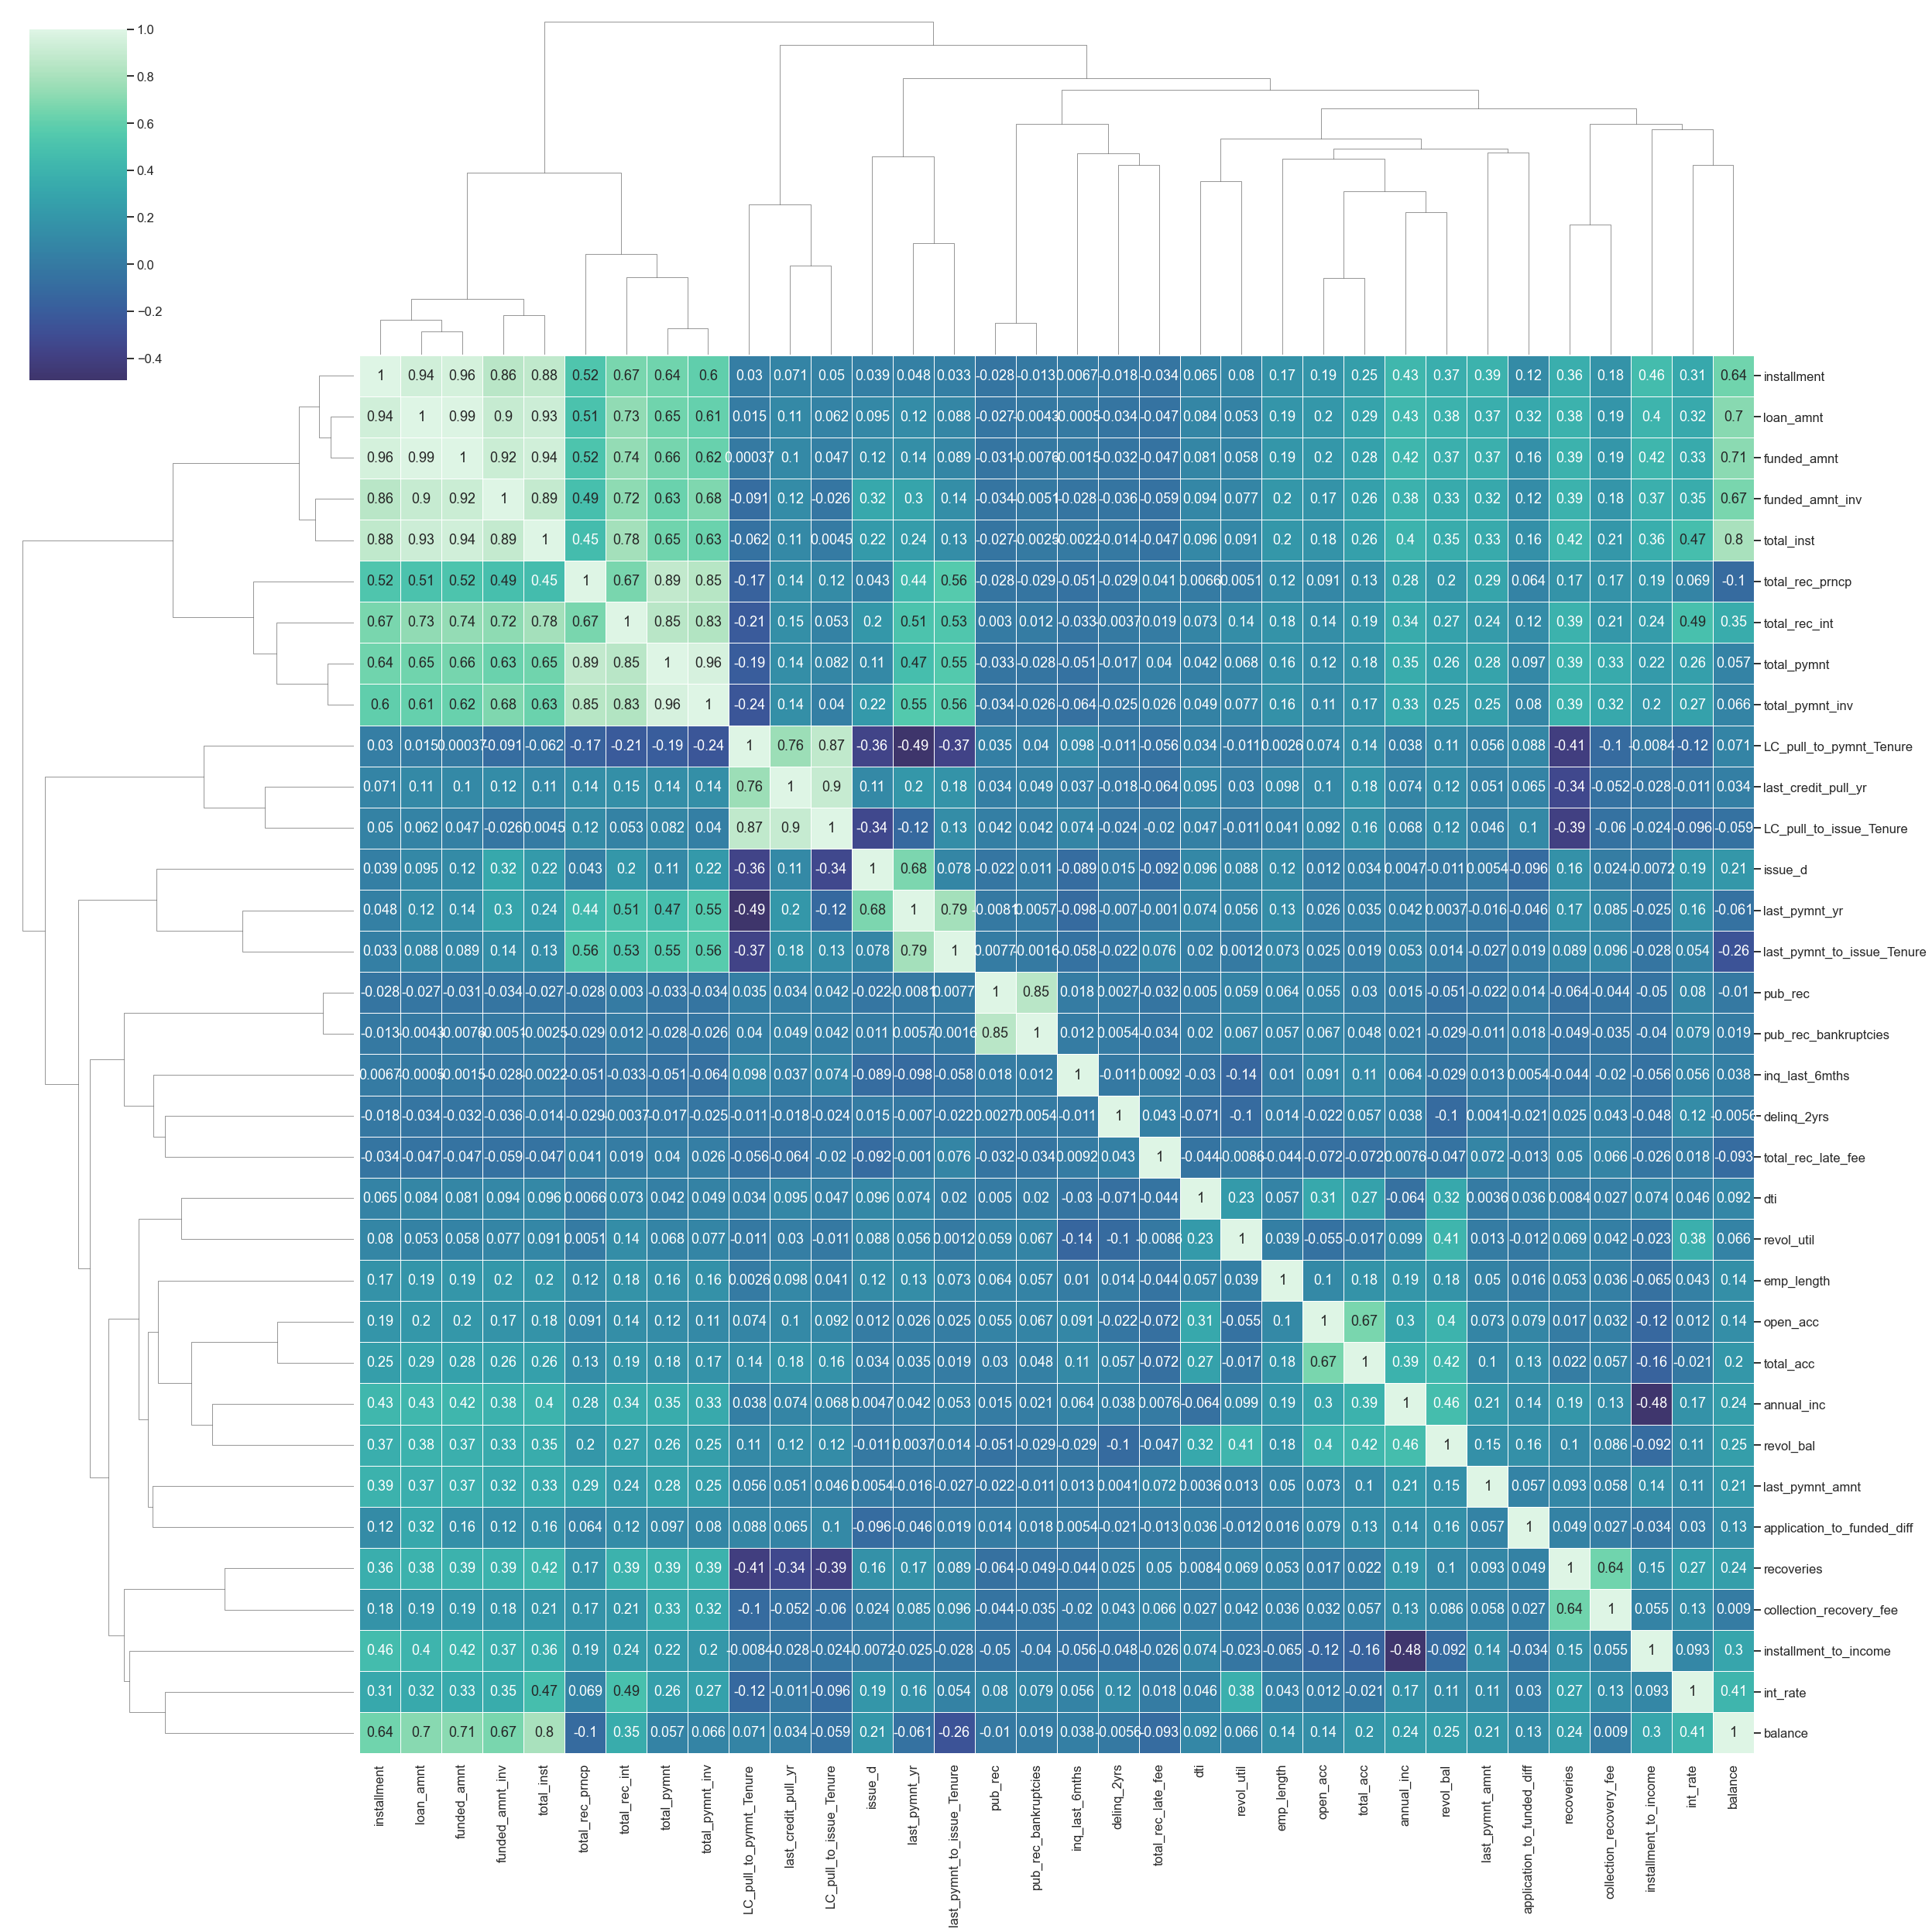

In [145]:
#Cluster Heatmap of correlation
sns.clustermap(charged_off_df, center = 0, cmap = 'mako', linewidths = 0.75, figsize = (35, 35), annot=True)
plt.show()

- We see that laon_amnt, funded_amnt and funded_amnt_inv forms one cluster, if there is increase or decrease in one , the others will increase or decrease. 

- We have a cluster of loan_amnt,funded_amnt,funded_amnt_inv,installment and total_inst, in which a change in one will affect the others substantially. This cluster is positively correlated with cluster of total_rec_int,total_rec_pymnt,total_rec_pymnt_inv and total_rec_prncp

- Hence bank should reduce the funding amount inorder to reduce the balance amount , i.e reducing the number of defaults

<Figure size 720x720 with 0 Axes>

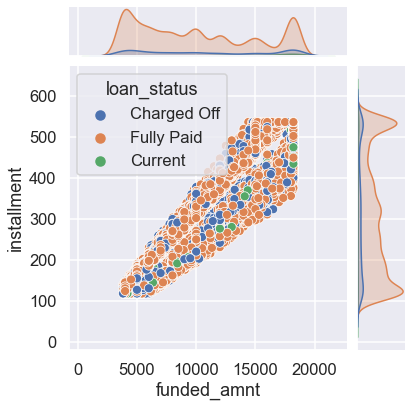

In [146]:
#Finding Relationship between funded amount and installment based on loan status
plt.figure(figsize=(10,10))
sns.jointplot(data=ft_data,x='funded_amnt',y='installment',hue='loan_status')
plt.show()

<Figure size 720x720 with 0 Axes>

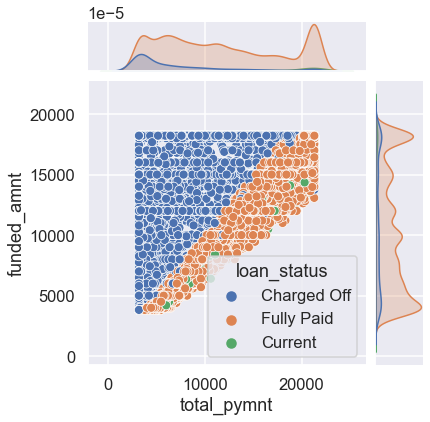

In [147]:
#Finding Relationship between Total Payment and installment based on loan status - we can see that funding amount for those who have been charged off are on higher side and can be clearly demarcated/seperated from those of fully paid
plt.figure(figsize=(10,10))
sns.jointplot(data=ft_data,x='total_pymnt',y='funded_amnt',hue='loan_status')
plt.show()

Text(0.5, 1.0, 'Loans issued by Region')

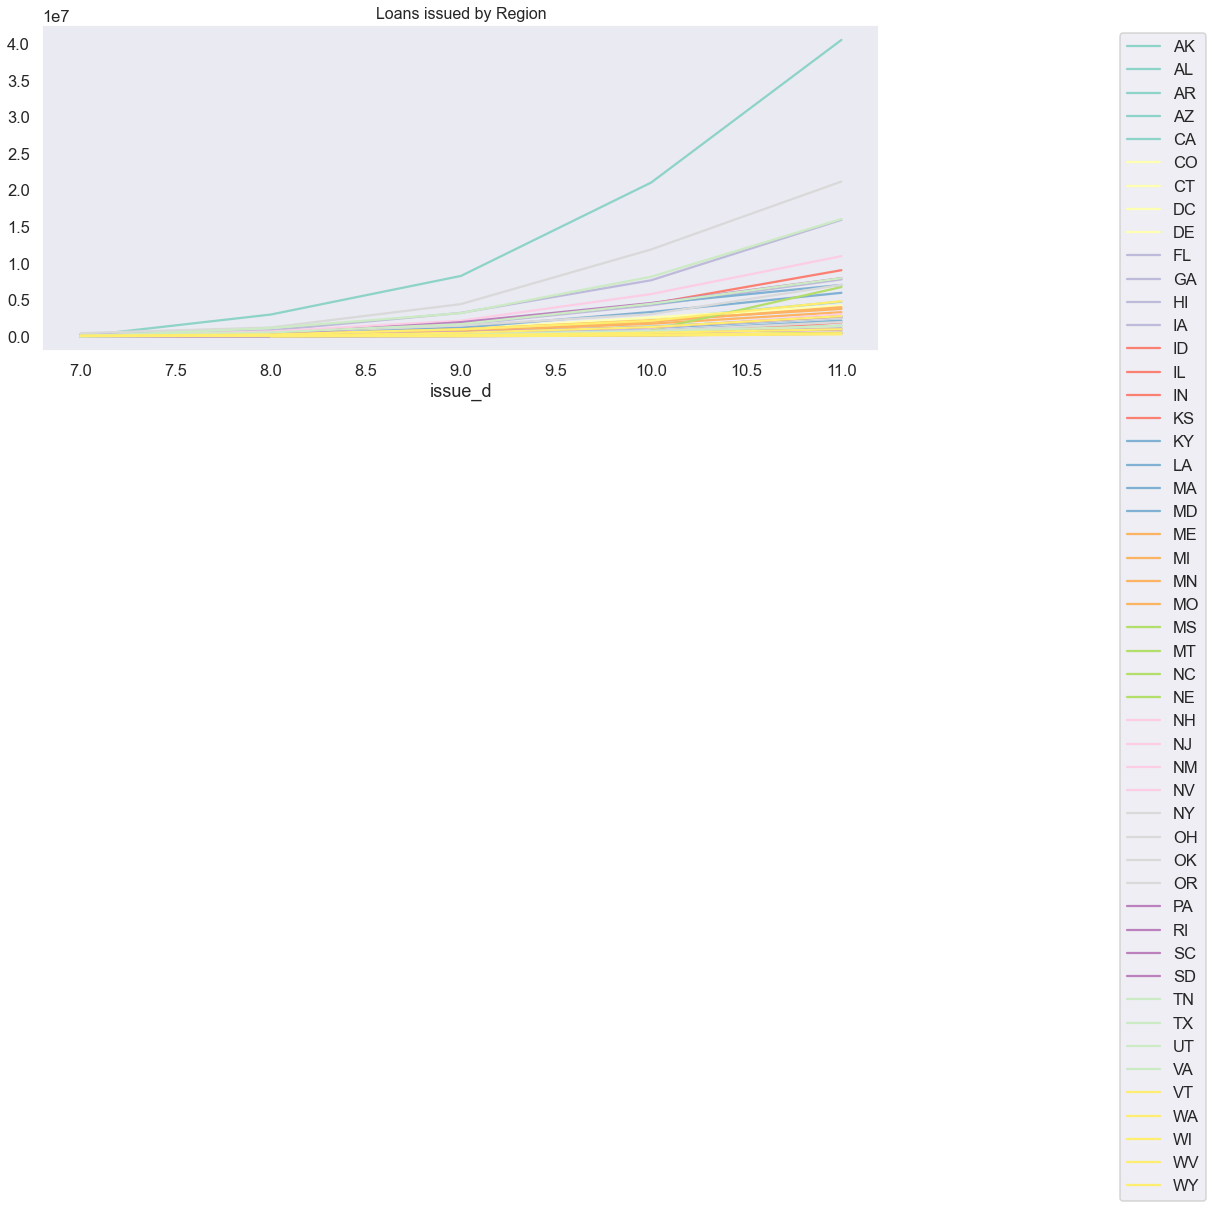

In [148]:
#Loan Issued to different states by issue year
#We see that over the period of time people in alaska have been tending to increase debt
cmap = plt.cm.Set3

by_issued_amount = ft_data.groupby(['issue_d', 'addr_state']).loan_amnt.sum()
by_issued_amount.unstack().plot(stacked=False, colormap=cmap, grid=False, legend=True, figsize=(15,6))
plt.legend(loc='upper right',bbox_to_anchor=(1.4, 1))
plt.title('Loans issued by Region', fontsize=16)